### Topic: Developing an AI-driven Clothing Size Prediction Model: Enhancing Accuracy and Inclusivity.

# Table of Contents

* [1. Datasets Importation and Merging](#1.-Datasets-Importation-and-Merging)
  * [1.1 ANSUR Datasets](#1.1-ANSUR-Datasets)
  * [1.2 CEASER Datasets](#1.2-CEASER-Datasets)
   * [1.2.a Italy Dataset](#a.-Italy-Dataset)
   * [1.2.b North America dataset](#b.-North-America-dataset)
   * [1.2.c Netherland dataset](#c.-Netherland-dataset)
  * [1.3 Merging ANSUR & CEASER](#1.3-Merging-ANSUR-&-CEASER)
* [2. Generative AI - Plus Size Measurement](#2.-Generative-AI---Plus-Size-Measurement)
    * [2.1 Female Measurements](#2.1-Female-Measurements)
        * [2.1.1 Auto Encoders](#2.1.1-Auto-Encoders)
        * [2.1.2 Gaussian Mixture Model (GMM)](#2.1.2-Gaussian-Mixture-Model-(GMM))
    * [2.2 Male Measurements](#2.2-Male-Measurements)
        * [2.2.1 Auto Encoders](#2.2.1-Auto-Encoders)
        * [2.2.2 GMM](#2.2.2-GMM)
    * [2.3 Comparing the Generated Synthetic Datasets ](#2.3-Comparing-the-Generated-Synthetic-Datasets)
* [3. Initial Data Exploration](#3.-Initial-Data-Exploration)
* [4. Data Preprocessing](#4.-Data-Preprocessing)
    * [4.1 Outliers](#4.1-Outliers)
    * [4.2 Missing Values](#4.2-Missing-Values)
      * [4.2.1 K - Nearest Neighbours](#4.2.1-K---Nearest-Neighbours)
      * [4.2.2 Under Bust - Linear Regression](#4.2.2-Under-Bust---Linear-Regression)
    * [4.3 Standardization](#4.3-Standardization)
    * [4.4 One Hot Encoding](#4.4-One-Hot-Encoding) 
* [5. Data Visualisations](#5.-Data-Visualisations)
    * [5.1 Gender Distribution](#5.1-Gender-Distribution)
    * [5.2 Location Distribution](#5.2-Location-Distribution)
    * [5.3 Age Distribution](#5.3-Age-Distribution)
* [6. Predictive Models - Body Measurements](#6.-Predictive-Models---Body-Measurements)
    * [6.1 Train-Validation set](#6.1-Train-Validation-set)
    * [6.2 Joint Models - Multi Output Regression](#6.2-Joint-Models---Multi-Output-Regression)
        * [6.2.1 Linear Regression](#6.2.1-Linear-Regression)
        * [6.2.2 Random Forest](#6.2.2-Random-Forest)
        * [6.2.3 XGBoost Algorithm](#6.2.3-XGBoost-Algorithm)
        * [6.2.4 Ensemble Model](#6.2.4-Ensemble-Model)
    * [6.3 Independent Approach](#6.3-Independent-Approach)
        * [6.3.1 Linear Regression](#6.3.1-Linear-Regression)
        * [6.3.2 Random Forest](#6.3.2-Random-Forest)
        * [6.3.3 XGBoost Algorithm](#6.3.3-XGBoost-Algorithm)
    * [6.4 Sequential Approach](#6.4-Sequential-Approach)
        * [6.4.1 Random Forest](#6.4.1-Random-Forest)
        * [6.4.2 XGBoost Algorithm](#6.4.2-XGBoost-Algorithm)
* [7. Hyper Parameter Tuning - Body Measurements](#7.-Hyper-Parameter-Tuning---Body-Measurements)
    * [7.1 Multi Output Random Forest - Random Search and Bayesian Optimisation](#7.1-Multi-Output-Random-Forest---Random-Search-and-Bayesian-Optimisation)
    * [7.2 Sequential Random Forest](#7.2-Sequential-Random-Forest)
* [8. Vertical Measurements](#8.-Vertical-Measurements)
    * [8.1 Multi Output and Ensemble Model](#8.1-Multi-Output-and-Ensemble-Model)
    * [8.2 Independent Models](#8.2-Independent-Models)
    * [8.3 Sequential Approach](#8.3-Sequential-Approach)
* [9. Hyper Parameter Tuning - Vertical Measurements](#9.-Hyper-Parameter-Tuning---Vertical-Measurements)
    * [9.1 Multi Output Random Forest - Random Search and Bayesian Optimisation](#9.1-Multi-Output-Random-Forest---Random-Search-and-Bayesian-Optimisation)
    * [9.2 Individual Random Forest](#9.2-Individual-Random-Forest)    
* [10. Final Results on Test Set](#10.-Final-Results-on-Test-Set)
    * [10.1 Body Measurements](#10.1-Body-Measurements)
    * [10.2 Vertical Measurements](#10.2-Vertical-Measurements) 


In [1175]:
!pip install scikit-optimize
!pip install --upgrade pip
!pip install xgboost

In [1176]:
import pandas as pd
import numpy as np
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from math import sqrt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint
import skopt
from skopt import BayesSearchCV
#from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
#import statsmodels.api as sm

In [1177]:
# For multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1. Datasets Importation and Merging

## 1.1 ANSUR Datasets

In [1178]:
ansur_fem = pd.read_csv('ANSUR II FEMALE Public.csv')
ansur_fem

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,29501,285,1392,335,223,1297,252,196,368,299,...,Combat Support,42A,Texas,3,Mexican,3,51,67,180,Right hand
1982,29502,262,1324,301,202,1204,236,181,378,294,...,Combat Support,25U,Texas,3,Mexican,3,40,63,150,Right hand
1983,29503,260,1334,318,213,1259,234,183,363,332,...,Combat Support,42A,Texas,2,NaN,2,40,66,168,Right hand
1984,29511,205,1293,302,199,1207,213,163,376,276,...,Combat Support,92Y,Texas,3,Mexican,3,31,63,133,Right hand


In [1179]:
ansur_man = pd.read_csv('ANSUR II MALE Public.csv', encoding='ISO-8859-1')
ansur_man

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,29442,235,1353,312,216,1263,228,193,384,318,...,Combat Arms,11B,Colorado,51,Blackfoot Cherokee Choctaw,1,22,67,160,Right hand
4078,29443,247,1473,336,234,1346,253,196,428,374,...,Combat Arms,91B,Oklahoma,1,NaN,1,22,71,194,Right hand
4079,29447,264,1394,313,227,1280,245,193,407,367,...,Combat Arms,13B,Oklahoma,1,NaN,1,23,67,186,Right hand
4080,29451,203,1417,327,223,1314,250,196,419,365,...,Combat Arms,13P,Oklahoma,1,NaN,1,22,69,165,Right hand


#### Ensuring there is no duplication of individuals in database

In [1180]:
# To generate unique 'subjectid' values from each dataframe
subjectid_male = set(ansur_man['subjectid'])
subjectid_fem = set(ansur_fem['SubjectId'])

# The 'subjectid' values in 'male' df that are not present in 'female' df
subject_id_male = subjectid_male - subjectid_fem

# If all 'subjectid' values in 'male' are unique
if len(subject_id_male) == len(subjectid_male):
    print("No duplicates")
else:
    print("Duplicates!")


No duplicates


In [1181]:
# Rename subjectid column in female dataset to enable merge
ansur_fem = ansur_fem.rename(columns={'SubjectId': 'subjectid'})

ansur_df = pd.concat([ansur_fem, ansur_man])


#### Deleting demographics information & Unneccessary columns

In [1182]:
ansur_df = ansur_df.drop(['Date','Installation', 'Component', 'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'Ethnicity', 'DODRace', 'SubjectNumericRace', 'WritingPreference'], axis=1)

In [1183]:
ansur_df

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Age,Heightin,Weightlbs
0,10037,231,1282,301,204,1180,222,177,373,315,...,217,345,942,657,152,756,Female,26,61,142
1,10038,194,1379,320,207,1292,225,178,372,272,...,168,329,1032,534,155,815,Female,21,64,120
2,10042,183,1369,329,233,1271,237,196,397,300,...,159,367,1035,663,162,799,Female,23,68,147
3,10043,261,1356,306,214,1250,240,188,384,364,...,235,371,999,782,173,818,Female,22,66,175
4,10051,309,1303,308,214,1210,217,182,378,320,...,300,380,911,886,152,762,Female,45,63,195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,29442,235,1353,312,216,1263,228,193,384,318,...,210,347,1016,675,163,778,Male,22,67,160
4078,29443,247,1473,336,234,1346,253,196,428,374,...,235,385,1082,896,178,873,Male,22,71,194
4079,29447,264,1394,313,227,1280,245,193,407,367,...,258,353,1011,832,178,822,Male,23,67,186
4080,29451,203,1417,327,223,1314,250,196,419,365,...,192,350,1062,731,172,837,Male,22,69,165


In [1184]:
ansur_df = ansur_df.drop(columns=['Heightin','handcircumference','weightkg','biacromialbreadth','abdominalextensiondepthsitting', 'acromionradialelength','axillaheight','balloffootcircumference','balloffootlength','bicepscircumferenceflexed','bicristalbreadth','bideltoidbreadth','bimalleolarbreadth','bitragionchinarc','bitragionsubmandibulararc','buttockdepth','buttockheight','buttockpopliteallength','calfcircumference','cervicaleheight', 'chestdepth','chestbreadth','chestheight','earbreadth', 'earlength', 'earprotrusion', 'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth','forearmhandlength','functionalleglength','handbreadth', 'handlength', 'headbreadth', 'headcircumference','headlength', 'heelanklecircumference','heelbreadth', 'hipbreadth', 'iliocristaleheight', 'interpupillarybreadth', 'interscyei', 'interscyeii','kneeheightmidpatella', 'lateralfemoralepicondyleheight', 'lateralmalleolusheight', 'lowerthighcircumference', 'mentonsellionlength', 'overheadfingertipreachsitting', 'palmlength', 'poplitealheight', 'shouldercircumference', 'span', 'shoulderlength', 'suprasternaleheight', 'tenthribheight', 'thighclearance', 'tibialheight', 'tragiontopofhead', 'trochanterionheight', 'waistbreadth', 'waistdepth','wristcircumference','wristheight'])
print(ansur_df.columns.tolist())

['subjectid', 'acromialheight', 'anklecircumference', 'bizygomaticbreadth', 'buttockcircumference', 'buttockkneelength', 'chestcircumference', 'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'elbowrestheight', 'eyeheightsitting', 'hipbreadthsitting', 'kneeheightsitting', 'neckcircumference', 'neckcircumferencebase', 'radialestylionlength', 'shoulderelbowlength', 'sittingheight', 'sleevelengthspinewrist', 'sleeveoutseam', 'stature', 'thighcircumference', 'thumbtipreach', 'verticaltrunkcircumferenceusa', 'waistbacklength', 'waistcircumference', 'waistfrontlengthsitting', 'waistheightomphalion', 'Gender', 'Age', 'Weightlbs']


In [1185]:
# Adjustments - merging columns and changing names
ansur_df['Total Crotch Length (Crotch Length) (mm)'] = ansur_df['crotchlengthomphalion'] + ansur_df['crotchlengthposterioromphalion']
ansur_df = ansur_df.rename(columns={'waistbacklength': 'Waist Back (mm)','radialestylionlength': 'Elbow-to-wrist','sleevelengthspinewrist':'Spine-wrist','acromialheight' : 'Acromial Height, Sitting (mm)', 'anklecircumference' : 'Ankle Circumference (mm)', 'subjectid': 'Subject Number', 'bizygomaticbreadth': 'Bizygomatic Breadth (mm)', 'buttockcircumference': 'Hip Circumference, Maximum (mm)', 'buttockkneelength': 'Buttock-Knee Length (mm)', 'chestcircumference': 'Chest Circumference (mm)', 'crotchheight': 'Crotch Height (mm)', 'elbowrestheight': 'Elbow Height, Sitting (mm)', 'eyeheightsitting': 'Eye Height, Sitting (mm)', 'hipbreadthsitting': 'Hip Breadth, Sitting (mm)', 'kneeheightsitting' : 'Knee Height (mm)', 'neckcircumferencebase' : 'Neck Base Circumference (mm)', 'shoulderelbowlength' : 'Shoulder-Elbow', 'sittingheight': 'Sitting Height (mm)', 'sleevelengthspinewrist' : 'Spine-wrist', 'sleeveoutseam' : 'Shoulder-Wrist','stature': 'Stature (mm)', 'thighcircumference': 'Thigh Circumference (mm)', 'thumbtipreach' : 'Thumb Tip Reach (mm)', 'verticaltrunkcircumferenceusa' : 'Vertical Trunk Circumference (mm)', 'waistcircumference' : 'Waist Circumference, Pref (mm)', 'waistfrontlengthsitting' : 'Waist Front Length (mm)', 'waistheightomphalion' : 'Waist Height, Preferred (mm)', 'Weightlbs' : 'Weight (kg)'})
ansur_df = ansur_df.drop(columns=['crotchlengthomphalion', 'crotchlengthposterioromphalion'])

In [1186]:
ansur_df

,Subject Number,"Acromial Height, Sitting (mm)",Ankle Circumference (mm),Bizygomatic Breadth (mm),"Hip Circumference, Maximum (mm)",Buttock-Knee Length (mm),Chest Circumference (mm),Crotch Height (mm),"Elbow Height, Sitting (mm)","Eye Height, Sitting (mm)",...,Thumb Tip Reach (mm),Vertical Trunk Circumference (mm),Waist Back (mm),"Waist Circumference, Pref (mm)",Waist Front Length (mm),"Waist Height, Preferred (mm)",Gender,Age,Weight (kg),Total Crotch Length (Crotch Length) (mm)
0,10037,1282,204,141,1011,587,922,759,220,713,...,736,1488,406,850,345,942,Female,26,142,867
1,10038,1379,207,126,893,583,839,835,208,726,...,771,1470,422,708,329,1032,Female,21,120,878
2,10042,1369,233,128,987,583,874,821,204,790,...,814,1542,419,727,367,1035,Female,23,147,1017
3,10043,1356,214,144,1012,599,1008,804,244,775,...,736,1627,451,923,371,999,Female,22,175,991
4,10051,1303,214,135,1281,607,1089,726,233,732,...,766,1698,452,1163,380,911,Female,45,195,1042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,29442,1353,216,137,917,587,954,807,195,762,...,758,1557,442,816,347,1016,Male,22,160,912
4078,29443,1473,234,135,1049,632,1072,848,299,807,...,785,1715,475,978,385,1082,Male,22,194,1073
4079,29447,1394,227,142,1038,614,1045,787,257,784,...,750,1682,483,991,353,1011,Male,23,186,1005
4080,29451,1417,223,138,929,598,984,846,237,782,...,779,1589,430,783,350,1062,Male,22,165,917


In [1187]:
# covert lb to kg
ansur_df["Weight (kg)"] = ansur_df["Weight (kg)"] * 0.45359
ansur_df['Weight (kg)'] = ansur_df['Weight (kg)'].astype(int)

In [1188]:
ansur_df

,Subject Number,"Acromial Height, Sitting (mm)",Ankle Circumference (mm),Bizygomatic Breadth (mm),"Hip Circumference, Maximum (mm)",Buttock-Knee Length (mm),Chest Circumference (mm),Crotch Height (mm),"Elbow Height, Sitting (mm)","Eye Height, Sitting (mm)",...,Thumb Tip Reach (mm),Vertical Trunk Circumference (mm),Waist Back (mm),"Waist Circumference, Pref (mm)",Waist Front Length (mm),"Waist Height, Preferred (mm)",Gender,Age,Weight (kg),Total Crotch Length (Crotch Length) (mm)
0,10037,1282,204,141,1011,587,922,759,220,713,...,736,1488,406,850,345,942,Female,26,64,867
1,10038,1379,207,126,893,583,839,835,208,726,...,771,1470,422,708,329,1032,Female,21,54,878
2,10042,1369,233,128,987,583,874,821,204,790,...,814,1542,419,727,367,1035,Female,23,66,1017
3,10043,1356,214,144,1012,599,1008,804,244,775,...,736,1627,451,923,371,999,Female,22,79,991
4,10051,1303,214,135,1281,607,1089,726,233,732,...,766,1698,452,1163,380,911,Female,45,88,1042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,29442,1353,216,137,917,587,954,807,195,762,...,758,1557,442,816,347,1016,Male,22,72,912
4078,29443,1473,234,135,1049,632,1072,848,299,807,...,785,1715,475,978,385,1082,Male,22,87,1073
4079,29447,1394,227,142,1038,614,1045,787,257,784,...,750,1682,483,991,353,1011,Male,23,84,1005
4080,29451,1417,223,138,929,598,984,846,237,782,...,779,1589,430,783,350,1062,Male,22,74,917


In [1189]:
print(ansur_df.columns.tolist())

['Subject Number', 'Acromial Height, Sitting (mm)', 'Ankle Circumference (mm)', 'Bizygomatic Breadth (mm)', 'Hip Circumference, Maximum (mm)', 'Buttock-Knee Length (mm)', 'Chest Circumference (mm)', 'Crotch Height (mm)', 'Elbow Height, Sitting (mm)', 'Eye Height, Sitting (mm)', 'Hip Breadth, Sitting (mm)', 'Knee Height (mm)', 'neckcircumference', 'Neck Base Circumference (mm)', 'Elbow-to-wrist', 'Shoulder-Elbow', 'Sitting Height (mm)', 'Spine-wrist', 'Shoulder-Wrist', 'Stature (mm)', 'Thigh Circumference (mm)', 'Thumb Tip Reach (mm)', 'Vertical Trunk Circumference (mm)', 'Waist Back (mm)', 'Waist Circumference, Pref (mm)', 'Waist Front Length (mm)', 'Waist Height, Preferred (mm)', 'Gender', 'Age', 'Weight (kg)', 'Total Crotch Length (Crotch Length) (mm)']


## 1.2 CEASER Datasets

### a. Italy Dataset

In [1190]:
italy_df = pd.read_excel('ItalyMeasurements(1).xlsx')
italy_df = italy_df.drop(['Recorder','Measurer'], axis=1)

In [1191]:
italy_df

,Subject Number,Gender,"Acromial Height, Sitting (mm)",Ankle Circumference (mm),Spine-to-Shoulder (mm),Spine-to-Elbow (mm),Arm Length (Spine to Wrist) (mm),Arm Length (Shoulder to Wrist) (mm),Arm Length (Shoulder to Elbow) (mm),Armscye Circumference (Scye Circ Over Acromion) (mm),...,TTR 2 (mm),TTR 3 (mm),Triceps Skinfold (mm),Total Crotch Length (Crotch Length) (mm),Vertical Trunk Circumference (mm),"Waist Circumference, Pref (mm)",Waist Front Length (mm),"Waist Height, Preferred (mm)",Weight (kg),Waist Back (mm)
0,4000,Male,584,245,192,538,812,620.0,346.0,434,...,787,777,18.0,610,1643,826,432.0,995,71.5,470.99
1,4001,Male,590,255,185,541,810,625.0,356.0,405,...,789,790,14.0,655,1660,814,457.0,1015,72.4,455.26
2,4002,Female,586,251,197,545,822,625.0,348.0,418,...,798,797,19.5,647,1580,752,402.0,1056,71.3,426.09
3,4003,Female,564,240,212,517,795,583.0,305.0,403,...,792,794,18.0,663,1566,759,395.0,1003,61.7,383.61
4,4004,Male,569,261,199,529,812,613.0,330.0,402,...,809,812,15.0,618,1562,787,386.0,1076,66.7,425.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,4796,Female,525,230,185,521,810,625.0,336.0,390,...,764,755,19.0,575,1455,792,395.0,1029,53.5,409.03
797,4797,Male,602,255,186,524,823,637.0,338.0,465,...,770,778,13.0,635,1607,830,463.0,1023,69.2,451.33
798,4798,Female,567,235,181,492,787,606.0,311.0,410,...,760,763,19.0,605,1500,718,365.0,975,54.7,416.15
799,4799,Male,594,260,211,530,808,597.0,319.0,441,...,755,744,10.0,598,1585,840,460.0,999,69.0,436.94


### b. North America dataset

In [1192]:
NA_df = pd.read_excel('NA_measurements.xlsx')
NA_df = NA_df.drop(['Recorder','Measurer'], axis=1)

In [1193]:
NA_df

,Subject Number,Gender,"Acromial Height, Sitting (mm)",Ankle Circumference (mm),Spine-to-Shoulder (mm),Spine-to-Elbow (mm),Arm Length (Spine to Wrist) (mm),Arm Length (Shoulder to Wrist) (mm),Arm Length (Shoulder to Elbow) (mm),Armscye Circumference (Scye Circ Over Acromion) (mm),...,TTR 2 (mm),TTR 3 (mm) - distance between triceps,Triceps Skinfold (mm),Total Crotch Length (Crotch Length) (mm),Vertical Trunk Circumference (mm),"Waist Circumference, Pref (mm)",Waist Front Length (mm),"Waist Height, Preferred (mm)",Weight (kg),Waist Back (mm)
0,1,Male,676,317,210,587.0,907,697,377.0,564,...,874,872,15.0,943.0,2040.0,1385.0,533,1130,156.462585,431.864
1,2,Male,645,288,229,576.0,892,663,347.0,489,...,880,881,21.0,744.0,1879.0,1002.0,511,1073,101.587302,478.003
2,7,Male,623,277,237,566.0,842,605,329.0,479,...,815,813,13.0,646.0,1758.0,929.0,500,994,91.156463,500.410
3,8,Male,588,263,212,551.0,856,644,339.0,445,...,831,833,19.0,640.0,1704.0,895.0,513,1055,79.365079,495.322
4,9,Male,610,273,208,560.0,859,651,352.0,499,...,832,839,8.0,649.0,1722.0,934.0,454,1020,88.888889,468.338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2386,3022,Male,615,283,200,546.0,850,650,346.0,415,...,795,788,6.0,600.0,1677.0,799.0,491,1029,70.068027,503.367
2387,3024,Female,541,247,194,512.0,775,581,318.0,359,...,694,700,15.0,608.0,1484.0,720.0,378,1004,58.049887,392.526
2388,3026,Female,599,246,190,530.0,808,618,340.0,387,...,764,762,22.0,622.0,1599.0,812.0,411,992,68.707483,431.179
2389,3027,Female,608,228,165,489.0,764,599,324.0,345,...,704,699,9.0,657.0,1527.0,674.0,352,1024,53.514739,398.457


### c. Netherland Dataset

In [1194]:
netherland_df = pd.read_excel('DutchMeasurements.xls')
netherland_df = netherland_df.drop('NL Subject', axis=1)
neth_back_df = pd.read_excel('DutchExtractedStanding.xls')

In [1195]:
# To extract the waist back length from the standing dataset and merge it to the main dataset
selected_columns = neth_back_df[['Waist Back (mm)', 'Subject Number']]
selected_columns

,Waist Back (mm),Subject Number
0,443.534,11001
1,371.282,11009
2,371.616,11017
3,464.174,11021
4,469.449,11024
...,...,...
1144,493.040,17074
1145,349.131,17076
1146,476.095,17077
1147,367.256,17078


In [1196]:
netherland_df = netherland_df.merge(selected_columns, on='Subject Number', how='inner')
netherland_df

,Subject Number,Gender,"Acromial Height, Sitting (mm)",Ankle Circumference (mm),Spine-to-Shoulder (mm),Spine-to-Elbow (mm),Arm Length (Spine to Wrist) (mm),Arm Length (Shoulder to Wrist) (mm),Arm Length (Shoulder to Elbow) (mm),Armscye Circumference (Scye Circ Over Acromion) (mm),...,TTR 2 (mm),TTR 3 (mm),Triceps Skinfold (mm),Total Crotch Length (Crotch Length) (mm),Vertical Trunk Circumference (mm),"Waist Circumference, Pref (mm)",Waist Front Length (mm),"Waist Height, Preferred (mm)",Weight (kg),Waist Back (mm)
0,11001,Female,640.0,227.0,187.0,545.0,790.0,603.0,358.0,400.0,...,764.0,765.0,14.2,643.0,1571.0,724.0,362.0,1053.0,60.9,443.534
1,11009,Female,564.0,246.0,210.0,525.0,783.0,573.0,315.0,443.0,...,737.0,733.0,17.8,816.0,1726.0,1014.0,372.0,1014.0,85.0,371.282
2,11017,Female,556.0,240.0,194.0,510.0,762.0,568.0,316.0,375.0,...,756.0,749.0,14.2,599.0,1451.0,755.0,325.0,1014.0,61.3,371.616
3,11021,Female,590.0,225.0,200.0,557.0,825.0,625.0,357.0,365.0,...,803.0,796.0,16.8,NaN,1563.0,901.0,430.0,1054.0,66.0,464.174
4,11024,Male,634.0,275.0,248.0,630.0,920.0,672.0,382.0,522.0,...,816.0,809.0,5.8,665.0,1720.0,867.0,477.0,1101.0,98.3,469.449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,17074,Male,661.0,243.0,199.0,542.0,813.0,614.0,343.0,412.0,...,825.0,817.0,5.4,582.0,1669.0,888.0,463.0,1006.0,66.3,493.040
1140,17076,Female,575.0,262.0,181.0,505.0,788.0,607.0,324.0,419.0,...,735.0,743.0,21.8,874.0,1745.0,871.0,347.0,1075.0,81.0,349.131
1141,17077,Male,635.0,277.0,230.0,605.0,900.0,670.0,375.0,456.0,...,848.0,871.0,5.0,627.0,1732.0,858.0,465.0,1141.0,81.5,476.095
1142,17078,Female,568.0,226.0,185.0,520.0,769.0,584.0,335.0,442.0,...,698.0,697.0,17.8,711.0,1568.0,820.0,346.0,1022.0,76.4,367.256


In [1197]:
# To join the three datasets
ceaser_df = pd.concat([netherland_df, NA_df, italy_df])
ceaser_df

,Subject Number,Gender,"Acromial Height, Sitting (mm)",Ankle Circumference (mm),Spine-to-Shoulder (mm),Spine-to-Elbow (mm),Arm Length (Spine to Wrist) (mm),Arm Length (Shoulder to Wrist) (mm),Arm Length (Shoulder to Elbow) (mm),Armscye Circumference (Scye Circ Over Acromion) (mm),...,Total Crotch Length (Crotch Length) (mm),Vertical Trunk Circumference (mm),"Waist Circumference, Pref (mm)",Waist Front Length (mm),"Waist Height, Preferred (mm)",Weight (kg),Waist Back (mm),Chest Girth at Scye (Chest Circumference at Scye)(mm),TTR 3 (mm) - distance between triceps,Chest Girth at Scye (Chest Circumference at Scye) (mm)
0,11001,Female,640.0,227.0,187.0,545.0,790.0,603.0,358.0,400.0,...,643.0,1571.0,724.0,362.0,1053.0,60.9,443.534,NaN,NaN,NaN
1,11009,Female,564.0,246.0,210.0,525.0,783.0,573.0,315.0,443.0,...,816.0,1726.0,1014.0,372.0,1014.0,85.0,371.282,NaN,NaN,NaN
2,11017,Female,556.0,240.0,194.0,510.0,762.0,568.0,316.0,375.0,...,599.0,1451.0,755.0,325.0,1014.0,61.3,371.616,NaN,NaN,NaN
3,11021,Female,590.0,225.0,200.0,557.0,825.0,625.0,357.0,365.0,...,NaN,1563.0,901.0,430.0,1054.0,66.0,464.174,NaN,NaN,NaN
4,11024,Male,634.0,275.0,248.0,630.0,920.0,672.0,382.0,522.0,...,665.0,1720.0,867.0,477.0,1101.0,98.3,469.449,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,4796,Female,525.0,230.0,185.0,521.0,810.0,625.0,336.0,390.0,...,575.0,1455.0,792.0,395.0,1029.0,53.5,409.030,NaN,NaN,790.0
797,4797,Male,602.0,255.0,186.0,524.0,823.0,637.0,338.0,465.0,...,635.0,1607.0,830.0,463.0,1023.0,69.2,451.330,NaN,NaN,960.0
798,4798,Female,567.0,235.0,181.0,492.0,787.0,606.0,311.0,410.0,...,605.0,1500.0,718.0,365.0,975.0,54.7,416.150,NaN,NaN,782.0
799,4799,Male,594.0,260.0,211.0,530.0,808.0,597.0,319.0,441.0,...,598.0,1585.0,840.0,460.0,999.0,69.0,436.940,NaN,NaN,975.0


Note: Ceaser has no elbow to wrist

In [1198]:
ceaser_df = ceaser_df.drop(columns=['TTR 3 (mm) - distance between triceps','Armscye Circumference (Scye Circ Over Acromion) (mm)', 'Chest Girth at Scye (Chest Circumference at Scye)(mm)','Face Length (mm)','Foot Length (mm)','Hand Circumference (mm)','Hand Length (mm)','Head Breadth (mm)','Head Circumference (mm)','Head Length (mm)','Shoulder Breadth (mm)','Subscapular Skinfold (mm)','Thigh Circumference Max Sitting (mm)','TTR 1 (mm)','TTR 2 (mm)','TTR 3 (mm)','Triceps Skinfold (mm)', 'Chest Girth (Chest Circumference at Scye) (mm)','Chest Girth at Scye (Chest Circumference at Scye) (mm)'])
print(ceaser_df.columns.tolist())


['Subject Number', 'Gender', 'Acromial Height, Sitting (mm)', 'Ankle Circumference (mm)', 'Spine-to-Shoulder (mm)', 'Spine-to-Elbow (mm)', 'Arm Length (Spine to Wrist) (mm)', 'Arm Length (Shoulder to Wrist) (mm)', 'Arm Length (Shoulder to Elbow) (mm)', 'Bizygomatic Breadth (mm)', 'Chest Circumference (mm)', 'Bust/Chest Circumference Under Bust (mm)', 'Buttock-Knee Length (mm)', 'Crotch Height (mm)', 'Elbow Height, Sitting (mm)', 'Eye Height, Sitting (mm)', 'Hip Breadth, Sitting (mm)', 'Hip Circumference, Maximum (mm)', 'Hip Circ Max Height (mm)', 'Knee Height (mm)', 'Neck Base Circumference (mm)', 'Sitting Height (mm)', 'Stature (mm)', 'Thigh Circumference (mm)', 'Thumb Tip Reach (mm)', 'Total Crotch Length (Crotch Length) (mm)', 'Vertical Trunk Circumference (mm)', 'Waist Circumference, Pref (mm)', 'Waist Front Length (mm)', 'Waist Height, Preferred (mm)', 'Weight (kg)', 'Waist Back (mm)']


In [1199]:
ceaser_df = ceaser_df.rename(columns={'Arm Length (Spine to Wrist) (mm)':'Spine-wrist', 'Arm Length (Shoulder to Wrist) (mm)':'Shoulder-Wrist', 'Arm Length (Shoulder to Elbow) (mm)':'Shoulder-Elbow'})

In [1200]:
# To remove the 'Subject Number' column and reset the index
ceaser_df = ceaser_df.drop('Subject Number', axis=1).reset_index(drop=True)

# Assign new numbers starting from 1
ceaser_df['Subject Number'] = range(1, len(ceaser_df) + 1)
ceaser_df

,Gender,"Acromial Height, Sitting (mm)",Ankle Circumference (mm),Spine-to-Shoulder (mm),Spine-to-Elbow (mm),Spine-wrist,Shoulder-Wrist,Shoulder-Elbow,Bizygomatic Breadth (mm),Chest Circumference (mm),...,Thigh Circumference (mm),Thumb Tip Reach (mm),Total Crotch Length (Crotch Length) (mm),Vertical Trunk Circumference (mm),"Waist Circumference, Pref (mm)",Waist Front Length (mm),"Waist Height, Preferred (mm)",Weight (kg),Waist Back (mm),Subject Number
0,Female,640.0,227.0,187.0,545.0,790.0,603.0,358.0,127.0,904.0,...,565.0,765.666667,643.0,1571.0,724.0,362.0,1053.0,60.9,443.534,1
1,Female,564.0,246.0,210.0,525.0,783.0,573.0,315.0,139.0,1092.0,...,654.0,742.333333,816.0,1726.0,1014.0,372.0,1014.0,85.0,371.282,2
2,Female,556.0,240.0,194.0,510.0,762.0,568.0,316.0,132.0,898.0,...,579.0,754.000000,599.0,1451.0,755.0,325.0,1014.0,61.3,371.616,3
3,Female,590.0,225.0,200.0,557.0,825.0,625.0,357.0,141.0,925.0,...,596.0,803.333333,NaN,1563.0,901.0,430.0,1054.0,66.0,464.174,4
4,Male,634.0,275.0,248.0,630.0,920.0,672.0,382.0,144.0,1099.0,...,660.0,811.333333,665.0,1720.0,867.0,477.0,1101.0,98.3,469.449,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4331,Female,525.0,230.0,185.0,521.0,810.0,625.0,336.0,129.0,798.0,...,545.0,757.000000,575.0,1455.0,792.0,395.0,1029.0,53.5,409.030,4332
4332,Male,602.0,255.0,186.0,524.0,823.0,637.0,338.0,136.0,943.0,...,595.0,773.666667,635.0,1607.0,830.0,463.0,1023.0,69.2,451.330,4333
4333,Female,567.0,235.0,181.0,492.0,787.0,606.0,311.0,134.0,800.0,...,565.0,759.333333,605.0,1500.0,718.0,365.0,975.0,54.7,416.150,4334
4334,Male,594.0,260.0,211.0,530.0,808.0,597.0,319.0,139.0,945.0,...,590.0,751.333333,598.0,1585.0,840.0,460.0,999.0,69.0,436.940,4335


## 1.3 Merging ANSUR & CEASER

In [1201]:
# To determine the last number in the original dataset
last_number = ceaser_df['Subject Number'].max()

# Assign new ID numbers
ansur_df['Subject Number'] = range(last_number + 1, last_number + 1 + len(ansur_df))
real_df = pd.concat([ceaser_df, ansur_df])


In [1202]:
print(final_df.columns.tolist())

['Gender', 'Acromial Height, Sitting (mm)', 'Ankle Circumference (mm)', 'Spine-to-Shoulder (mm)', 'Spine-to-Elbow (mm)', 'Spine-wrist', 'Shoulder-Wrist', 'Shoulder-Elbow', 'Bizygomatic Breadth (mm)', 'Chest Circumference (mm)', 'Bust/Chest Circumference Under Bust (mm)', 'Buttock-Knee Length (mm)', 'Crotch Height (mm)', 'Elbow Height, Sitting (mm)', 'Eye Height, Sitting (mm)', 'Hip Breadth, Sitting (mm)', 'Hip Circumference, Maximum (mm)', 'Hip Circ Max Height (mm)', 'Knee Height (mm)', 'Neck Base Circumference (mm)', 'Sitting Height (mm)', 'Stature (mm)', 'Thigh Circumference (mm)', 'Thumb Tip Reach (mm)', 'Total Crotch Length (Crotch Length) (mm)', 'Vertical Trunk Circumference (mm)', 'Waist Circumference, Pref (mm)', 'Waist Front Length (mm)', 'Waist Height, Preferred (mm)', 'Weight (kg)', 'Waist Back (mm)', 'Subject Number', 'neckcircumference', 'Elbow-to-wrist', 'Age']


# 2. Generative AI - Plus Size Measurement

## 2.1 Female Measurements

In [1203]:
plus_fem = pd.read_excel('Plus size female.xlsx')
plus_fem

,Subject Number,Gender,Stature (mm),Weight (kg),Chest Circumference (mm),"Waist Circumference, Pref (mm)","Hip Circumference, Maximum (mm)",Inseam
0,3,Female,1557.528,65.99,914.40,812.80,1117.60,NaN
1,8,Female,1697.736,82.00,1000.76,899.16,1181.10,NaN
2,23,Female,1706.880,74.90,965.20,774.70,1168.40,NaN
3,10,Female,1729.740,85.00,1099.82,939.80,1140.46,NaN
4,2,Female,1737.360,79.02,914.40,863.60,1193.80,NaN
5,7,Female,1737.360,95.98,1016.00,1066.80,1371.60,NaN
6,9,Female,1737.360,81.00,1059.18,889.00,1130.30,NaN
7,34,Female,1737.360,86.00,1117.60,863.60,1168.40,NaN
8,27,Female,1765.300,80.01,1016.00,838.20,1143.00,NaN
9,28,Female,1767.840,77.02,965.20,736.60,1181.10,NaN


In [1204]:
plus_fem = plus_fem.drop(["Inseam", "Subject Number", "Gender"], axis=1)

In [1205]:
# Convert data to integers
plus_fem = plus_fem[['Stature (mm)', 'Weight (kg)', 'Chest Circumference (mm)', 'Waist Circumference, Pref (mm)', 'Hip Circumference, Maximum (mm)']].astype(int)
plus_fem

,Stature (mm),Weight (kg),Chest Circumference (mm),"Waist Circumference, Pref (mm)","Hip Circumference, Maximum (mm)"
0,1557,65,914,812,1117
1,1697,82,1000,899,1181
2,1706,74,965,774,1168
3,1729,85,1099,939,1140
4,1737,79,914,863,1193
5,1737,95,1016,1066,1371
6,1737,81,1059,889,1130
7,1737,86,1117,863,1168
8,1765,80,1016,838,1143
9,1767,77,965,736,1181


In [1206]:
# Split the dataset into training and validation sets
train_data = plus_fem.sample(frac=0.8, random_state=42)
val_data = plus_fem.drop(train_data.index)

num_features = plus_fem.shape[1]
num_features

5

### 2.1.1 Auto Encoders

In [1207]:
# Normalize the data
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
val_data_scaled = scaler.transform(val_data)


#### A. Relu activation and Early stopping

In [1208]:
input_dim = plus_fem.shape[1]

# Encoder
encoder_inputs = keras.Input(shape=(input_dim,))
encoder_hidden = keras.layers.Dense(64, activation='relu')(encoder_inputs)
latent_space = keras.layers.Dense(32, activation='relu')(encoder_hidden)

# Decoder
decoder_hidden = keras.layers.Dense(64, activation='relu')(latent_space)
decoder_outputs = keras.layers.Dense(input_dim, activation='sigmoid')(decoder_hidden)

# Autoencoder model
autoencoder = keras.Model(encoder_inputs, decoder_outputs)

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# To train the Autoencoder
autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(train_data_scaled, train_data_scaled, epochs=400, batch_size=32, validation_data=(val_data_scaled, val_data_scaled), callbacks=[early_stopping])

# Synthetic data
num_samples = 1820
random_latent_vectors = np.random.normal(size=(num_samples, 5))
synthetic_data_scaled = autoencoder.predict(random_latent_vectors)

synthetic_data = scaler.inverse_transform(synthetic_data_scaled)
synthetic_df_fem = pd.DataFrame(synthetic_data, columns=plus_fem.columns)

Epoch 1/400
1/1 [==============================] - 10s 10s/step - loss: 1.2807 - val_loss: 2.5580
Epoch 2/400
1/1 [==============================] - 0s 201ms/step - loss: 1.2703 - val_loss: 2.5367
Epoch 3/400
1/1 [==============================] - 0s 97ms/step - loss: 1.2601 - val_loss: 2.5154
Epoch 4/400
1/1 [==============================] - 0s 97ms/step - loss: 1.2501 - val_loss: 2.4950
Epoch 5/400
1/1 [==============================] - 0s 151ms/step - loss: 1.2408 - val_loss: 2.4749
Epoch 6/400
1/1 [==============================] - 0s 130ms/step - loss: 1.2315 - val_loss: 2.4560
Epoch 7/400
1/1 [==============================] - 0s 193ms/step - loss: 1.2225 - val_loss: 2.4385
Epoch 8/400
1/1 [==============================] - 0s 135ms/step - loss: 1.2136 - val_loss: 2.4221
Epoch 9/400
1/1 [==============================] - 0s 178ms/step - loss: 1.2048 - val_loss: 2.4063
Epoch 10/400
1/1 [==============================] - 0s 118ms/step - loss: 1.1960 - val_loss: 2.3896
Epoch 11/400

Epoch 165/400
1/1 [==============================] - 0s 101ms/step - loss: 0.6190 - val_loss: 1.6243
Epoch 166/400
1/1 [==============================] - 0s 158ms/step - loss: 0.6189 - val_loss: 1.6242
Epoch 167/400
1/1 [==============================] - 0s 90ms/step - loss: 0.6187 - val_loss: 1.6241
Epoch 168/400
1/1 [==============================] - 0s 164ms/step - loss: 0.6186 - val_loss: 1.6240
Epoch 169/400
1/1 [==============================] - 0s 115ms/step - loss: 0.6185 - val_loss: 1.6240
Epoch 170/400
1/1 [==============================] - 0s 101ms/step - loss: 0.6183 - val_loss: 1.6239
Epoch 171/400
1/1 [==============================] - 0s 116ms/step - loss: 0.6182 - val_loss: 1.6238
Epoch 172/400
1/1 [==============================] - 0s 68ms/step - loss: 0.6181 - val_loss: 1.6238
Epoch 173/400
1/1 [==============================] - 0s 80ms/step - loss: 0.6179 - val_loss: 1.6237
Epoch 174/400
1/1 [==============================] - 0s 118ms/step - loss: 0.6178 - val_loss: 

In [1209]:
synthetic_df_fem.astype(int)

,Stature (mm),Weight (kg),Chest Circumference (mm),"Waist Circumference, Pref (mm)","Hip Circumference, Maximum (mm)"
0,1788,85,995,876,1191
1,1796,81,978,876,1187
2,1753,80,976,929,1189
3,1753,80,977,885,1187
4,1763,80,982,876,1187
...,...,...,...,...,...
1815,1775,80,975,876,1187
1816,1804,88,1049,886,1233
1817,1753,81,983,894,1189
1818,1765,81,1002,877,1187


Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

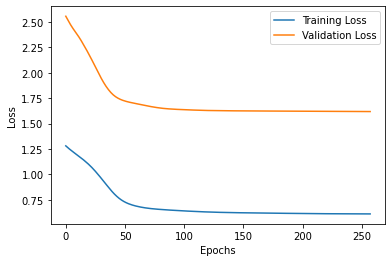

In [1210]:
# Ploting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#### B. Linear activation

In [1211]:
latent_dim = 3

# Encoder
encoder_inputs = keras.Input(shape=(input_dim,))
encoder = layers.Dense(16, activation='relu')(encoder_inputs)
encoder = layers.Dense(latent_dim, activation='relu')(encoder)

# Decoder
decoder = layers.Dense(16, activation='relu')(encoder)
decoder_outputs = layers.Dense(input_dim, activation='linear')(decoder)

# Autoencoder
autoencoder = keras.Model(encoder_inputs, decoder_outputs)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(train_data_scaled, train_data_scaled, epochs=200, batch_size=32, validation_data=(val_data_scaled, val_data_scaled))

# Synthetic data
num_samples = 1820
random_latent_vectors = np.random.normal(size=(num_samples, 5))
synthetic_data_scaled = autoencoder.predict(random_latent_vectors)

synthetic_data2 = scaler.inverse_transform(synthetic_data_scaled)
synthetic_df_fem2 = pd.DataFrame(synthetic_data2, columns=plus_fem.columns)
synthetic_df_fem2.astype(int)


Epoch 1/200
1/1 [==============================] - 7s 7s/step - loss: 0.9684 - val_loss: 2.4235
Epoch 2/200
1/1 [==============================] - 0s 370ms/step - loss: 0.9639 - val_loss: 2.4051
Epoch 3/200
1/1 [==============================] - 1s 511ms/step - loss: 0.9595 - val_loss: 2.3867
Epoch 4/200
1/1 [==============================] - 0s 284ms/step - loss: 0.9551 - val_loss: 2.3683
Epoch 5/200
1/1 [==============================] - 0s 308ms/step - loss: 0.9507 - val_loss: 2.3498
Epoch 6/200
1/1 [==============================] - 0s 255ms/step - loss: 0.9463 - val_loss: 2.3312
Epoch 7/200
1/1 [==============================] - 0s 211ms/step - loss: 0.9420 - val_loss: 2.3126
Epoch 8/200
1/1 [==============================] - 0s 370ms/step - loss: 0.9377 - val_loss: 2.2938
Epoch 9/200
1/1 [==============================] - 0s 160ms/step - loss: 0.9335 - val_loss: 2.2749
Epoch 10/200
1/1 [==============================] - 0s 261ms/step - loss: 0.9293 - val_loss: 2.2559
Epoch 11/200

Epoch 165/200
1/1 [==============================] - 0s 105ms/step - loss: 0.5061 - val_loss: 0.3897
Epoch 166/200
1/1 [==============================] - 0s 335ms/step - loss: 0.5054 - val_loss: 0.3896
Epoch 167/200
1/1 [==============================] - 0s 280ms/step - loss: 0.5047 - val_loss: 0.3897
Epoch 168/200
1/1 [==============================] - 0s 104ms/step - loss: 0.5040 - val_loss: 0.3898
Epoch 169/200
1/1 [==============================] - 0s 220ms/step - loss: 0.5033 - val_loss: 0.3900
Epoch 170/200
1/1 [==============================] - 0s 278ms/step - loss: 0.5026 - val_loss: 0.3902
Epoch 171/200
1/1 [==============================] - 0s 289ms/step - loss: 0.5020 - val_loss: 0.3904
Epoch 172/200
1/1 [==============================] - 0s 451ms/step - loss: 0.5014 - val_loss: 0.3907
Epoch 173/200
1/1 [==============================] - 0s 332ms/step - loss: 0.5008 - val_loss: 0.3910
Epoch 174/200
1/1 [==============================] - 0s 179ms/step - loss: 0.5002 - val_los

57/57 [==============================] - 1s 5ms/step


,Stature (mm),Weight (kg),Chest Circumference (mm),"Waist Circumference, Pref (mm)","Hip Circumference, Maximum (mm)"
0,1752,84,1000,905,1219
1,1742,73,930,828,1129
2,1759,86,1017,919,1233
3,1742,80,969,880,1195
4,1763,87,1026,925,1240
...,...,...,...,...,...
1815,1741,73,932,832,1134
1816,1742,80,973,883,1198
1817,1742,79,965,876,1192
1818,1757,85,1012,915,1229


### 2.1.2 Gaussian Mixture Model (GMM) 

In [1212]:
# Fit on training data
gmm = GaussianMixture(n_components=5) 
gmm.fit(plus_fem)

# Generate synthetic data
num_samples = 1820
synthetic_data = gmm.sample(num_samples)
synthetic_data3 = synthetic_data[0] 

synthetic_df_fem3 = pd.DataFrame(synthetic_data3, columns=plus_fem.columns)
synthetic_df_fem3.astype(int)


GaussianMixture(n_components=5)

,Stature (mm),Weight (kg),Chest Circumference (mm),"Waist Circumference, Pref (mm)","Hip Circumference, Maximum (mm)"
0,1778,114,1270,1129,1396
1,1777,113,1270,1129,1396
2,1778,114,1270,1129,1397
3,1777,114,1270,1129,1397
4,1778,114,1270,1129,1397
...,...,...,...,...,...
1815,1770,65,931,734,1030
1816,1770,65,931,734,1030
1817,1777,67,915,760,1063
1818,1771,66,929,737,1035


## 2.2 Male Measurements

In [1213]:
plus_male = pd.read_excel('Plus size male.xlsx')
plus_male

,Subject Number,Gender,Stature (mm),Weight (kg),Chest Circumference (mm),"Waist Circumference, Pref (mm)",Inseam
0,1,Male,1557.528,91.40,1117.6,965.2,914.4
1,5,Male,1859.280,109.90,1244.6,1066.8,812.8
2,11,Male,1920.240,99.02,1117.6,965.2,787.4
3,12,Male,1767.840,111.99,1295.4,1168.4,762.0
4,14,Male,1981.200,108.00,1168.4,965.2,NaN
5,15,Male,1981.000,122.00,1244.6,1130.3,838.2
6,16,Male,1981.000,102.00,1130.3,889.0,863.6
7,17,Male,1874.520,113.90,1295.4,1066.8,NaN
8,18,Male,1889.760,102.00,1168.4,990.6,NaN
9,19,Male,1955.800,103.00,1143.0,952.5,863.6


In [1214]:
plus_male = plus_male.drop(["Inseam", "Subject Number", "Gender"], axis=1)

In [1215]:
# Convert data to integers
plus_male = plus_male.astype(int)
plus_male

,Stature (mm),Weight (kg),Chest Circumference (mm),"Waist Circumference, Pref (mm)"
0,1557,91,1117,965
1,1859,109,1244,1066
2,1920,99,1117,965
3,1767,111,1295,1168
4,1981,108,1168,965
5,1981,122,1244,1130
6,1981,102,1130,889
7,1874,113,1295,1066
8,1889,102,1168,990
9,1955,103,1143,952


In [1216]:
# training and validation sets
train_data = plus_male.sample(frac=0.8, random_state=42)
val_data = plus_male.drop(train_data.index)

num_features = plus_male.shape[1]
num_features

4

### 2.2.1 Autoencoders

In [1217]:
# Normalize the data
scaler = StandardScaler()
train_data_scaled1 = scaler.fit_transform(train_data)
val_data_scaled1 = scaler.transform(val_data)


#### A. Relu and early stopping

In [1218]:
input_dim = plus_male.shape[1]

# Encoder
encoder_inputs = keras.Input(shape=(input_dim,))
encoder_hidden = keras.layers.Dense(64, activation='relu')(encoder_inputs)
latent_space = keras.layers.Dense(32, activation='relu')(encoder_hidden)

# Decoder
decoder_hidden = keras.layers.Dense(64, activation='relu')(latent_space)
decoder_outputs = keras.layers.Dense(input_dim, activation='sigmoid')(decoder_hidden)

# Autoencoder model
autoencoder = keras.Model(encoder_inputs, decoder_outputs)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(train_data_scaled1, train_data_scaled1, epochs=400, batch_size=32, validation_data=(val_data_scaled1, val_data_scaled1), callbacks=[early_stopping])

# Generate synthetic data
num_samples = 1266
random_latent_vectors = np.random.normal(size=(num_samples, 4))
synthetic_data_scaled = autoencoder.predict(random_latent_vectors)
synthetic_data = scaler.inverse_transform(synthetic_data_scaled)


synthetic_df_male = pd.DataFrame(synthetic_data, columns=plus_male.columns)


Epoch 1/400
1/1 [==============================] - 4s 4s/step - loss: 1.3121 - val_loss: 2.1872
Epoch 2/400
1/1 [==============================] - 0s 103ms/step - loss: 1.2992 - val_loss: 2.1635
Epoch 3/400
1/1 [==============================] - 0s 105ms/step - loss: 1.2867 - val_loss: 2.1404
Epoch 4/400
1/1 [==============================] - 0s 86ms/step - loss: 1.2746 - val_loss: 2.1181
Epoch 5/400
1/1 [==============================] - 0s 160ms/step - loss: 1.2633 - val_loss: 2.0963
Epoch 6/400
1/1 [==============================] - 0s 196ms/step - loss: 1.2522 - val_loss: 2.0749
Epoch 7/400
1/1 [==============================] - 0s 88ms/step - loss: 1.2416 - val_loss: 2.0542
Epoch 8/400
1/1 [==============================] - 0s 74ms/step - loss: 1.2315 - val_loss: 2.0344
Epoch 9/400
1/1 [==============================] - 0s 110ms/step - loss: 1.2216 - val_loss: 2.0155
Epoch 10/400
1/1 [==============================] - 0s 64ms/step - loss: 1.2117 - val_loss: 1.9967
Epoch 11/400
1/1

In [1219]:
synthetic_df_male

,Stature (mm),Weight (kg),Chest Circumference (mm),"Waist Circumference, Pref (mm)"
0,1894.504761,109.820312,1244.884277,1023.710083
1,1911.354736,109.729691,1216.596924,1030.529297
2,1987.080444,113.270630,1211.065308,1033.506348
3,1935.970337,109.601028,1201.348755,1027.945557
4,1923.568237,108.411743,1194.693359,1024.654175
...,...,...,...,...
1261,1952.829590,108.807869,1193.953003,1026.842773
1262,1896.741333,108.873993,1220.323242,1086.382690
1263,1915.911011,109.239494,1205.813232,1080.711426
1264,1895.261353,115.197090,1253.155884,1084.128784


#### B. Linear activation

In [1220]:
latent_dim = 3

# Encoder
encoder_inputs = keras.Input(shape=(input_dim,))
encoder = layers.Dense(16, activation='relu')(encoder_inputs)
encoder = layers.Dense(latent_dim, activation='relu')(encoder)

# Decoder
decoder = layers.Dense(16, activation='relu')(encoder)
decoder_outputs = layers.Dense(input_dim, activation='linear')(decoder)

# Autoencoder
autoencoder = keras.Model(encoder_inputs, decoder_outputs)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(train_data_scaled1, train_data_scaled1, epochs=400, batch_size=32, validation_data=(val_data_scaled1, val_data_scaled1))

# Generate synthetic data
num_samples = 1266
random_latent_vectors = np.random.normal(size=(num_samples, 4))
synthetic_data_scaled = autoencoder.predict(random_latent_vectors)
synthetic_data2 = scaler.inverse_transform(synthetic_data_scaled)

synthetic_df_male2 = pd.DataFrame(synthetic_data2, columns=plus_male.columns)
synthetic_df_male2.astype(int)


Epoch 1/400
1/1 [==============================] - 6s 6s/step - loss: 1.0569 - val_loss: 1.5860
Epoch 2/400
1/1 [==============================] - 0s 96ms/step - loss: 1.0525 - val_loss: 1.5818
Epoch 3/400
1/1 [==============================] - 0s 94ms/step - loss: 1.0482 - val_loss: 1.5774
Epoch 4/400
1/1 [==============================] - 0s 52ms/step - loss: 1.0440 - val_loss: 1.5728
Epoch 5/400
1/1 [==============================] - 0s 92ms/step - loss: 1.0399 - val_loss: 1.5680
Epoch 6/400
1/1 [==============================] - 0s 128ms/step - loss: 1.0360 - val_loss: 1.5630
Epoch 7/400
1/1 [==============================] - 0s 96ms/step - loss: 1.0321 - val_loss: 1.5578
Epoch 8/400
1/1 [==============================] - 0s 83ms/step - loss: 1.0283 - val_loss: 1.5524
Epoch 9/400
1/1 [==============================] - 0s 83ms/step - loss: 1.0247 - val_loss: 1.5468
Epoch 10/400
1/1 [==============================] - 0s 111ms/step - loss: 1.0211 - val_loss: 1.5410
Epoch 11/400
1/1 [=

Epoch 165/400
1/1 [==============================] - 0s 103ms/step - loss: 0.2799 - val_loss: 0.8730
Epoch 166/400
1/1 [==============================] - 0s 178ms/step - loss: 0.2762 - val_loss: 0.8726
Epoch 167/400
1/1 [==============================] - 0s 73ms/step - loss: 0.2726 - val_loss: 0.8724
Epoch 168/400
1/1 [==============================] - 0s 103ms/step - loss: 0.2690 - val_loss: 0.8724
Epoch 169/400
1/1 [==============================] - 0s 99ms/step - loss: 0.2655 - val_loss: 0.8726
Epoch 170/400
1/1 [==============================] - 0s 68ms/step - loss: 0.2621 - val_loss: 0.8726
Epoch 171/400
1/1 [==============================] - 0s 134ms/step - loss: 0.2588 - val_loss: 0.8723
Epoch 172/400
1/1 [==============================] - 0s 91ms/step - loss: 0.2555 - val_loss: 0.8718
Epoch 173/400
1/1 [==============================] - 0s 128ms/step - loss: 0.2522 - val_loss: 0.8711
Epoch 174/400
1/1 [==============================] - 0s 146ms/step - loss: 0.2490 - val_loss: 0

1/1 [==============================] - 0s 48ms/step - loss: 0.0588 - val_loss: 0.6119
Epoch 328/400
1/1 [==============================] - 0s 84ms/step - loss: 0.0583 - val_loss: 0.6100
Epoch 329/400
1/1 [==============================] - 0s 63ms/step - loss: 0.0578 - val_loss: 0.6083
Epoch 330/400
1/1 [==============================] - 0s 71ms/step - loss: 0.0573 - val_loss: 0.6067
Epoch 331/400
1/1 [==============================] - 1s 911ms/step - loss: 0.0569 - val_loss: 0.6051
Epoch 332/400
1/1 [==============================] - 0s 143ms/step - loss: 0.0564 - val_loss: 0.6016
Epoch 333/400
1/1 [==============================] - 0s 110ms/step - loss: 0.0559 - val_loss: 0.5959
Epoch 334/400
1/1 [==============================] - 0s 99ms/step - loss: 0.0555 - val_loss: 0.5914
Epoch 335/400
1/1 [==============================] - 0s 112ms/step - loss: 0.0552 - val_loss: 0.5880
Epoch 336/400
1/1 [==============================] - 0s 116ms/step - loss: 0.0548 - val_loss: 0.5856
Epoch 337

40/40 [==============================] - 0s 3ms/step


,Stature (mm),Weight (kg),Chest Circumference (mm),"Waist Circumference, Pref (mm)"
0,1838,102,1151,1007
1,1894,108,1179,1053
2,1904,106,1185,1007
3,2008,104,1148,967
4,1745,101,1157,1025
...,...,...,...,...
1261,1921,111,1238,1019
1262,2090,120,1281,1087
1263,1737,101,1147,1040
1264,1623,96,1146,1031


### 2.2.2 GMM

In [1221]:
gmm = GaussianMixture(n_components=5)  
gmm.fit(plus_male)

num_samples = 1266
synthetic_data = gmm.sample(num_samples)
synthetic_data = synthetic_data[0] 

synthetic_df_male3 = pd.DataFrame(synthetic_data, columns=plus_male.columns)


GaussianMixture(n_components=5)

## 2.3 Comparing the Generated Synthetic Datasets

In [1222]:
# Female - summary stats

# original
plus_fem.describe()

# Autoencoder relu
synthetic_df_fem.describe()

# Autoencoder linear activation
synthetic_df_fem2.describe()

# GMM
synthetic_df_fem3.describe()

,Stature (mm),Weight (kg),Chest Circumference (mm),"Waist Circumference, Pref (mm)","Hip Circumference, Maximum (mm)"
count,23.000000,23.000000,23.000000,23.000000,23.000000
mean,1755.521739,81.913043,998.695652,880.173913,1185.043478
std,52.538185,10.719197,96.552122,95.327022,93.414267
min,1557.000000,65.000000,863.000000,723.000000,1016.000000
25%,1737.000000,75.500000,914.000000,838.000000,1135.000000
50%,1778.000000,83.000000,1000.000000,863.000000,1168.000000
75%,1778.000000,86.000000,1040.000000,914.000000,1212.500000
max,1803.000000,114.000000,1270.000000,1130.000000,1397.000000


,Stature (mm),Weight (kg),Chest Circumference (mm),"Waist Circumference, Pref (mm)","Hip Circumference, Maximum (mm)"
count,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000
mean,1767.601074,82.631561,994.540161,896.622253,1198.439209
std,15.977716,2.677949,27.307856,28.232758,21.146881
min,1753.333374,80.777786,975.777771,876.444458,1187.611084
25%,1754.002838,80.803288,975.899963,876.539444,1187.628052
50%,1760.139343,81.068073,977.488861,879.081085,1187.998474
75%,1779.638000,83.564978,1010.226227,914.603989,1195.452515
max,1808.222412,88.829689,1050.438843,955.278442,1267.445312


,Stature (mm),Weight (kg),Chest Circumference (mm),"Waist Circumference, Pref (mm)","Hip Circumference, Maximum (mm)"
count,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000
mean,1751.019653,80.674644,977.732605,881.546814,1193.369507
std,10.542975,5.490057,37.516899,36.531620,41.238579
min,1741.022461,66.887451,898.322876,779.313171,1061.790894
25%,1742.377197,76.207886,946.934418,852.862457,1163.564117
50%,1746.725464,80.459000,973.023895,882.302887,1198.073730
75%,1757.598419,85.037563,1007.050217,911.061691,1224.765045
max,1795.422119,96.849983,1098.086182,980.637756,1299.231812


,Stature (mm),Weight (kg),Chest Circumference (mm),"Waist Circumference, Pref (mm)","Hip Circumference, Maximum (mm)"
count,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000
mean,1754.011026,81.421116,994.151279,875.762644,1182.604178
std,52.112567,10.145938,90.940117,91.508895,88.754435
min,1550.236687,60.809034,755.915590,680.489362,974.078719
25%,1724.508086,74.380659,927.795921,816.624269,1129.955721
50%,1765.788745,81.771572,974.677754,873.324680,1169.446431
75%,1784.109601,86.912792,1054.698669,913.171093,1219.049094
max,1944.717895,114.002121,1270.002228,1147.917140,1477.155375


Narrowed to autoencoders Linear activation and gmm based on the insights gotten from the summary statistics. Next, these will be plotted against each other to obtain further information.

<Figure size 720x432 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f94e55b5940>,
 'caps': [<matplotlib.lines.Line2D at 0x7f94e55b5e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f94e55b56a0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f94e55c4400>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f94e55c46a0>,
 'means': []}

Text(0.5, 0, 'Datasets')

Text(0, 0.5, 'Stature (mm)')

Text(0.5, 1.0, 'Boxplot of Stature (mm) across Datasets')

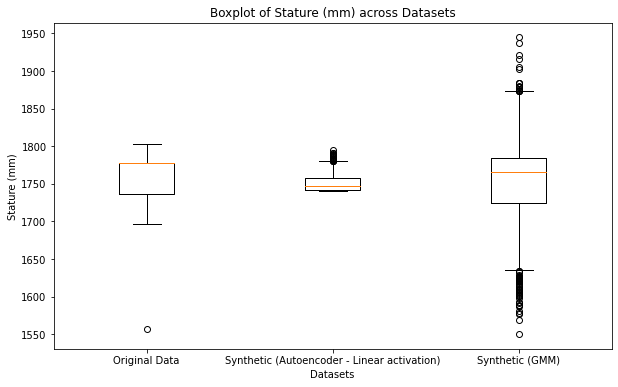

<Figure size 720x432 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f91f6f40670>,
 'caps': [<matplotlib.lines.Line2D at 0x7f92ff11c400>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f92ff102e20>,
 'medians': [<matplotlib.lines.Line2D at 0x7f92ff116f10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f92ff1165b0>,
 'means': []}

Text(0.5, 0, 'Datasets')

Text(0, 0.5, 'Weight (kg)')

Text(0.5, 1.0, 'Boxplot of Weight (kg) across Datasets')

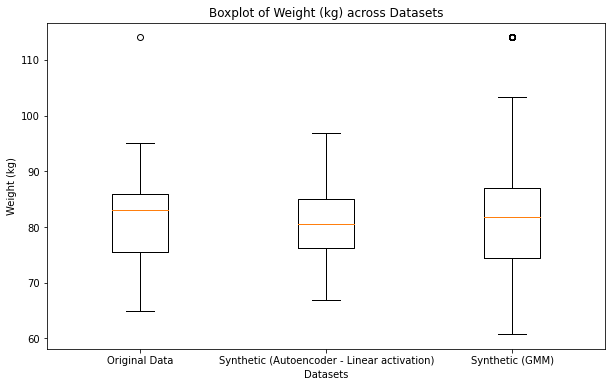

<Figure size 720x432 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f93422ffc10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f93423f7190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f93422ffa90>,
 'medians': [<matplotlib.lines.Line2D at 0x7f93423f76d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f93423f7970>,
 'means': []}

Text(0.5, 0, 'Datasets')

Text(0, 0.5, 'Chest Circumference (mm)')

Text(0.5, 1.0, 'Boxplot of Chest Circumference (mm) across Datasets')

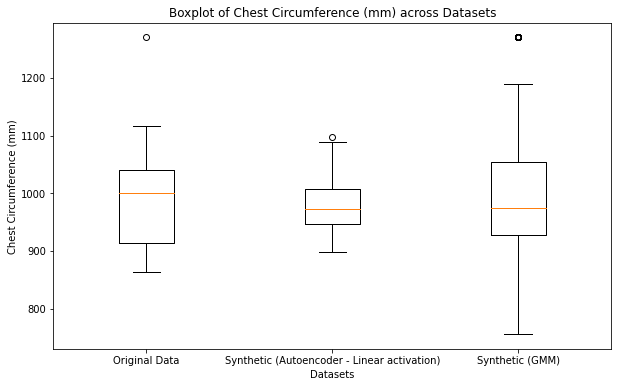

<Figure size 720x432 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9342650340>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9342650880>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f93426501c0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9342650dc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f934265e0a0>,
 'means': []}

Text(0.5, 0, 'Datasets')

Text(0, 0.5, 'Waist Circumference, Pref (mm)')

Text(0.5, 1.0, 'Boxplot of Waist Circumference, Pref (mm) across Datasets')

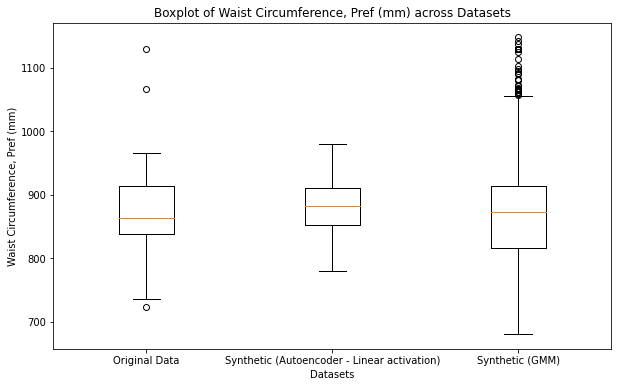

<Figure size 720x432 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f93427bdd90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f93427cc310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f93426c39d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f93427cc850>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f93427ccaf0>,
 'means': []}

Text(0.5, 0, 'Datasets')

Text(0, 0.5, 'Hip Circumference, Maximum (mm)')

Text(0.5, 1.0, 'Boxplot of Hip Circumference, Maximum (mm) across Datasets')

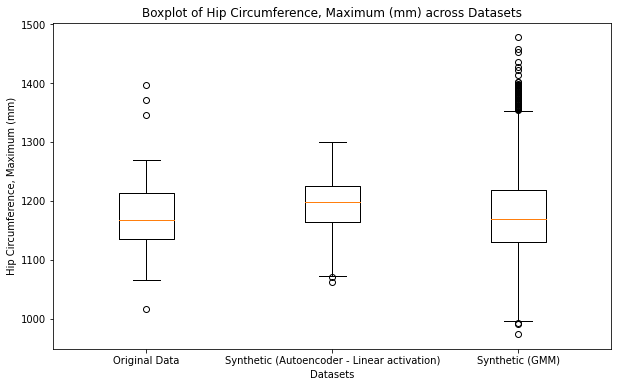

In [1223]:
datasets = [plus_fem, synthetic_df_fem2, synthetic_df_fem3]
dataset_names = ['Original Data', 'Synthetic (Autoencoder - Linear activation)', 'Synthetic (GMM)']

# Creating boxplots for each column
for column in plus_fem.columns:
    data = [df[column] for df in datasets]
    
    plt.figure(figsize=(10, 6))
    plt.boxplot(data, labels=dataset_names)
    plt.xlabel('Datasets')
    plt.ylabel(column)
    plt.title(f'Boxplot of {column} across Datasets')
    plt.show()

In [1224]:
# Male - summary stats

# original
plus_male.describe()

# Autoencoder relu
synthetic_df_male.describe()

# Autoencoder linear activation
synthetic_df_male2.describe()

# GMM
synthetic_df_male3.describe()

,Stature (mm),Weight (kg),Chest Circumference (mm),"Waist Circumference, Pref (mm)"
count,12.000000,12.000000,12.000000,12.000000
mean,1889.583333,107.500000,1194.500000,1024.083333
std,123.245106,8.867715,69.858949,84.864018
min,1557.000000,91.000000,1117.000000,889.000000
25%,1870.250000,102.000000,1139.750000,965.000000
50%,1925.000000,108.500000,1168.000000,1003.000000
75%,1981.000000,111.500000,1250.500000,1078.750000
max,1981.000000,122.000000,1295.000000,1168.000000


,Stature (mm),Weight (kg),Chest Circumference (mm),"Waist Circumference, Pref (mm)"
count,1266.000000,1266.000000,1266.000000,1266.000000
mean,1925.353882,109.472511,1206.628540,1040.527832
std,34.579830,2.462154,19.664221,20.658007
min,1892.704224,107.700081,1190.900024,1023.202881
25%,1896.531891,107.806978,1191.505493,1024.474548
50%,1911.312195,108.250557,1195.542542,1029.670532
75%,1946.739777,110.215975,1218.640564,1053.716125
max,2010.715088,116.736687,1253.462158,1086.631592


,Stature (mm),Weight (kg),Chest Circumference (mm),"Waist Circumference, Pref (mm)"
count,1266.000000,1266.000000,1266.000000,1266.000000
mean,1890.027588,107.214371,1181.386230,1031.102905
std,80.632095,5.823336,44.096954,47.373196
min,1537.463623,89.609444,1076.444824,911.212097
25%,1844.540497,103.223383,1147.495697,995.473404
50%,1903.781494,107.811840,1172.487854,1029.832397
75%,1944.706024,111.490555,1214.633728,1060.845215
max,2090.179199,128.966583,1361.345947,1198.189209


,Stature (mm),Weight (kg),Chest Circumference (mm),"Waist Circumference, Pref (mm)"
count,1266.000000,1266.000000,1266.000000,1266.000000
mean,1886.752974,107.607226,1195.485476,1027.594861
std,120.166738,8.623895,66.870501,82.790319
min,1556.997203,90.997576,1019.879683,838.858426
25%,1845.919984,101.938362,1136.790689,964.716170
50%,1929.717770,108.309856,1171.189300,1015.999619
75%,1966.593533,112.396785,1269.999074,1116.363773
max,2050.622621,136.318139,1355.250114,1232.460706


<Figure size 720x432 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f934294c250>,
 'caps': [<matplotlib.lines.Line2D at 0x7f934294c790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f934293df70>,
 'medians': [<matplotlib.lines.Line2D at 0x7f934294cbb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f934294ce50>,
 'means': []}

Text(0.5, 0, 'Datasets')

Text(0, 0.5, 'Stature (mm)')

Text(0.5, 1.0, 'Boxplot of Stature (mm) across Datasets')

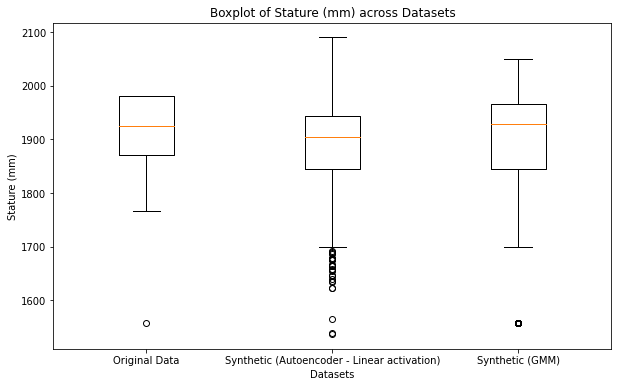

<Figure size 720x432 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f93429d2e20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9342b133a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f93429d2b80>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9342b138e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9342b13b80>,
 'means': []}

Text(0.5, 0, 'Datasets')

Text(0, 0.5, 'Weight (kg)')

Text(0.5, 1.0, 'Boxplot of Weight (kg) across Datasets')

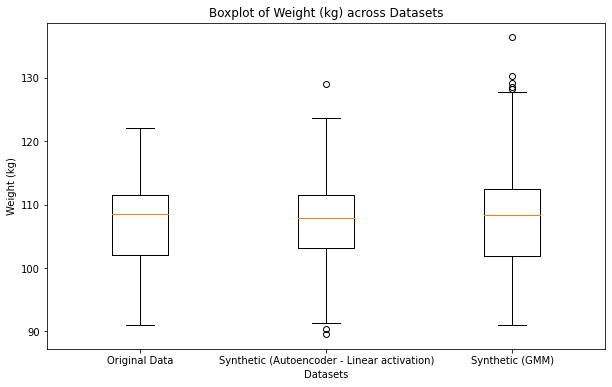

<Figure size 720x432 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9342ba05e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9342ba0b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9342ba0340>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9342bac0a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9342bac340>,
 'means': []}

Text(0.5, 0, 'Datasets')

Text(0, 0.5, 'Chest Circumference (mm)')

Text(0.5, 1.0, 'Boxplot of Chest Circumference (mm) across Datasets')

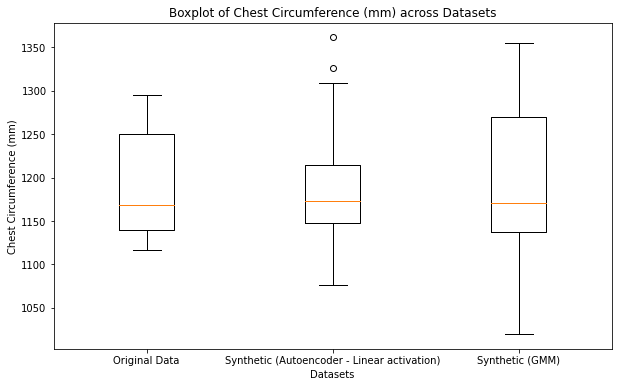

<Figure size 720x432 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9342d1dbe0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9342d2b160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9342d1da60>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9342d2b6a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9342d2b940>,
 'means': []}

Text(0.5, 0, 'Datasets')

Text(0, 0.5, 'Waist Circumference, Pref (mm)')

Text(0.5, 1.0, 'Boxplot of Waist Circumference, Pref (mm) across Datasets')

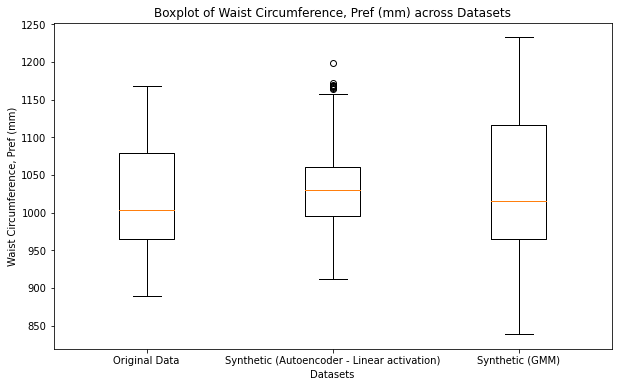

In [1225]:
datasets = [plus_male, synthetic_df_male2, synthetic_df_male3]
dataset_names = ['Original Data', 'Synthetic (Autoencoder - Linear activation)', 'Synthetic (GMM)']

# Create boxplots for each column
for column in plus_male.columns:
    data = [df[column] for df in datasets]
    
    plt.figure(figsize=(10, 6))
    plt.boxplot(data, labels=dataset_names)
    plt.xlabel('Datasets')
    plt.ylabel(column)
    plt.title(f'Boxplot of {column} across Datasets')
    
    plt.savefig('Stature Boxplot synethic.png')
    
    plt.show()

<Figure size 720x432 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9342eedaf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9342efe070>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9342eed850>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9342efe5b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9342efe850>,
 'means': []}

Text(0.5, 0, 'Datasets')

Text(0, 0.5, 'Stature (mm)')

Text(0.5, 1.0, 'Boxplot of Stature (mm) across Datasets')

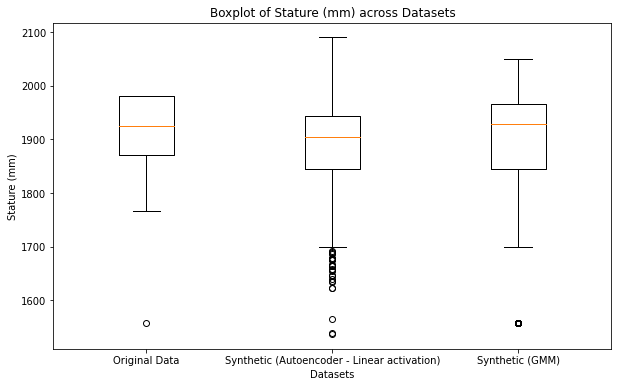

In [1226]:
# Create a list of dataframes for the three datasets
datasets = [plus_male, synthetic_df_male2, synthetic_df_male3]
dataset_names = ['Original Data', 'Synthetic (Autoencoder - Linear activation)', 'Synthetic (GMM)']

# Create boxplot for the 'Stature' variable
column = 'Stature (mm)'
data = [df[column] for df in datasets]

plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=dataset_names)
plt.xlabel('Datasets')
plt.ylabel(column)
plt.title(f'Boxplot of {column} across Datasets')

plt.savefig('Stature_Boxplot.png')
plt.show()

From the boxplot results of both male and female generations, the synthetic dataset generated with the Gaussian Mixture model seems to have a similar distribution to the original sample dataset. Therefore, this will be used in this project.

In [1227]:
# Female plus size with synthetic dataset
plus_fem_joint = pd.concat([plus_fem, synthetic_df_fem3])
plus_fem_joint["Gender"] = "Female"

# Male plus size with synthetic dataset
plus_male_joint = pd.concat([plus_male, synthetic_df_male3])
plus_male_joint["Gender"] = "Male"

# Male and female plus size together
plus_df = pd.concat([plus_male_joint, plus_fem_joint])

In [1228]:
# Plus size joint with Ansur and Ceaser datasets
final_df = pd.concat([real_df, plus_df])

In [1229]:
final_df

,Gender,"Acromial Height, Sitting (mm)",Ankle Circumference (mm),Spine-to-Shoulder (mm),Spine-to-Elbow (mm),Spine-wrist,Shoulder-Wrist,Shoulder-Elbow,Bizygomatic Breadth (mm),Chest Circumference (mm),...,Vertical Trunk Circumference (mm),"Waist Circumference, Pref (mm)",Waist Front Length (mm),"Waist Height, Preferred (mm)",Weight (kg),Waist Back (mm),Subject Number,neckcircumference,Elbow-to-wrist,Age
0,Female,640.0,227.0,187.0,545.0,790.0,603.0,358.0,127.0,904.000000,...,1571.0,724.000000,362.0,1053.0,60.900000,443.534,1.0,NaN,NaN,NaN
1,Female,564.0,246.0,210.0,525.0,783.0,573.0,315.0,139.0,1092.000000,...,1726.0,1014.000000,372.0,1014.0,85.000000,371.282,2.0,NaN,NaN,NaN
2,Female,556.0,240.0,194.0,510.0,762.0,568.0,316.0,132.0,898.000000,...,1451.0,755.000000,325.0,1014.0,61.300000,371.616,3.0,NaN,NaN,NaN
3,Female,590.0,225.0,200.0,557.0,825.0,625.0,357.0,141.0,925.000000,...,1563.0,901.000000,430.0,1054.0,66.000000,464.174,4.0,NaN,NaN,NaN
4,Male,634.0,275.0,248.0,630.0,920.0,672.0,382.0,144.0,1099.000000,...,1720.0,867.000000,477.0,1101.0,98.300000,469.449,5.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,931.589401,...,NaN,734.560903,NaN,NaN,65.888559,NaN,NaN,NaN,NaN,NaN
1816,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,931.929059,...,NaN,734.031789,NaN,NaN,65.847069,NaN,NaN,NaN,NaN,NaN
1817,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,915.165205,...,NaN,760.180078,NaN,NaN,67.859244,NaN,NaN,NaN,NaN,NaN
1818,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,929.426382,...,NaN,737.934852,NaN,NaN,66.150173,NaN,NaN,NaN,NaN,NaN



## 3. Initial Data Exploration

Before any analysis can be conducted on the dataset, efforts have to be taken to understand the characteristics of the variables in the dataset.

In [1230]:
# The relevant variables
relevant_variables = ['Gender', 'Stature (mm)', 'Weight (kg)', 'Chest Circumference (mm)', 'Hip Circumference, Maximum (mm)', 'Bust/Chest Circumference Under Bust (mm)', 'Thigh Circumference (mm)', 'Waist Circumference, Pref (mm)']
df = final_df[relevant_variables]

In [1231]:
# Descriptive statistics
summary_stat = df.describe()
print(summary_stat)

       Stature (mm)   Weight (kg)  Chest Circumference (mm)  \
count  13524.000000  13524.000000              13524.000000   
mean    1734.329291     80.676167               1023.034231   
std      107.043034     17.737980                118.033557   
min     1248.000000      0.000000                695.000000   
25%     1660.000000     68.000000                934.000000   
50%     1735.000000     79.000000               1011.000000   
75%     1796.812833     91.000000               1105.000000   
max     2183.000000    181.405896               1574.000000   

       Hip Circumference, Maximum (mm)  \
count                     12235.000000   
mean                       1049.816151   
std                         104.813340   
min                         737.000000   
25%                         977.000000   
50%                        1034.000000   
75%                        1108.000000   
max                        1834.000000   

       Bust/Chest Circumference Under Bust (mm)  Thig

array([[<Axes: title={'center': 'Stature (mm)'}>,
        <Axes: title={'center': 'Weight (kg)'}>,
        <Axes: title={'center': 'Chest Circumference (mm)'}>],
       [<Axes: title={'center': 'Hip Circumference, Maximum (mm)'}>,
        <Axes: title={'center': 'Bust/Chest Circumference Under Bust (mm)'}>,
        <Axes: title={'center': 'Thigh Circumference (mm)'}>],
       [<Axes: title={'center': 'Waist Circumference, Pref (mm)'}>,
        <Axes: >, <Axes: >]], dtype=object)

Text(0.5, 1.0, 'Distribution of Body Measurements')

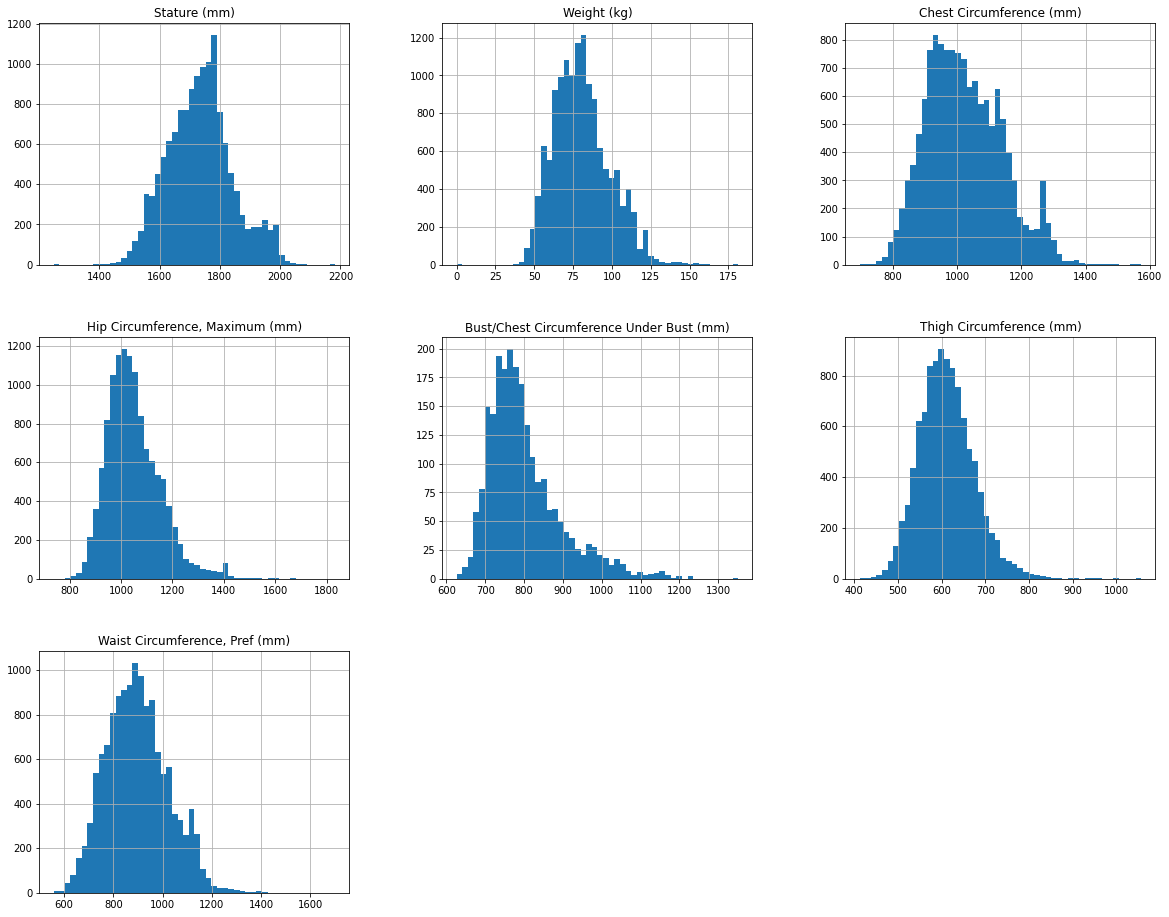

In [1232]:
# Histogram to display the distribution of the variables
df.hist(bins=50, figsize=(20, 16))
plt.title("Distribution of Body Measurements")
#plt.savefig("Variable distribution4.png")
plt.show()


/var/folders/tm/qv8g9h112v52mx8snqm4n83h0000gn/T/ipykernel_378/1263489926.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

Text(0.5, 1.0, 'Correlation Matrix Heatmap for Body Measurements')

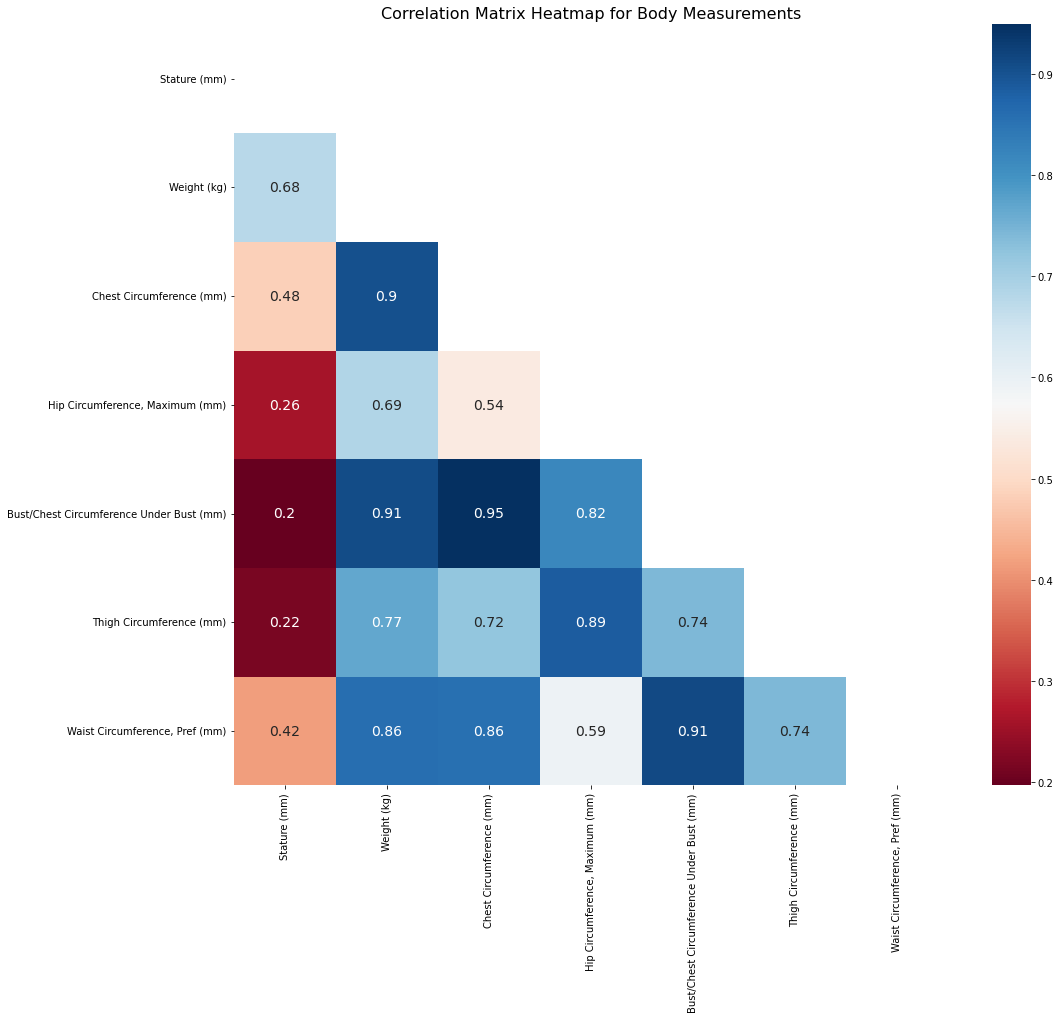

In [1233]:
# Correlation matrix
corr_matrix = df.corr()
fig, axs = plt.subplots(figsize=(16, 14))
half = np.zeros_like(corr_matrix)
half[np.triu_indices_from(half)] = True

# To generate diagram with specific colour and font size
sns.heatmap(corr_matrix, mask=half, annot=True, cmap='RdBu', annot_kws={'size': 14})

# Title 
axs.set_title('Correlation Matrix Heatmap for Body Measurements', fontsize=16)

plt.show()

#plt.savefig('correlation_heatmap2.png')

Based on the above correlation results, waist circumference is strongly correlated with chest, under bust, hip and thigh circumference. Furthermore, the weight variable has a very strong relationship with under bust circumference.


# 4. Data Preprocessing

## 4.1 Outliers

[Text(1, 0, 'Stature (mm)'),
 Text(2, 0, 'Weight (kg)'),
 Text(3, 0, 'Chest Circumference (mm)'),
 Text(4, 0, 'Hip Circumference, Maximum (mm)'),
 Text(5, 0, 'Bust/Chest Circumference Under Bust (mm)'),
 Text(6, 0, 'Thigh Circumference (mm)'),
 Text(7, 0, 'Waist Circumference, Pref (mm)')]

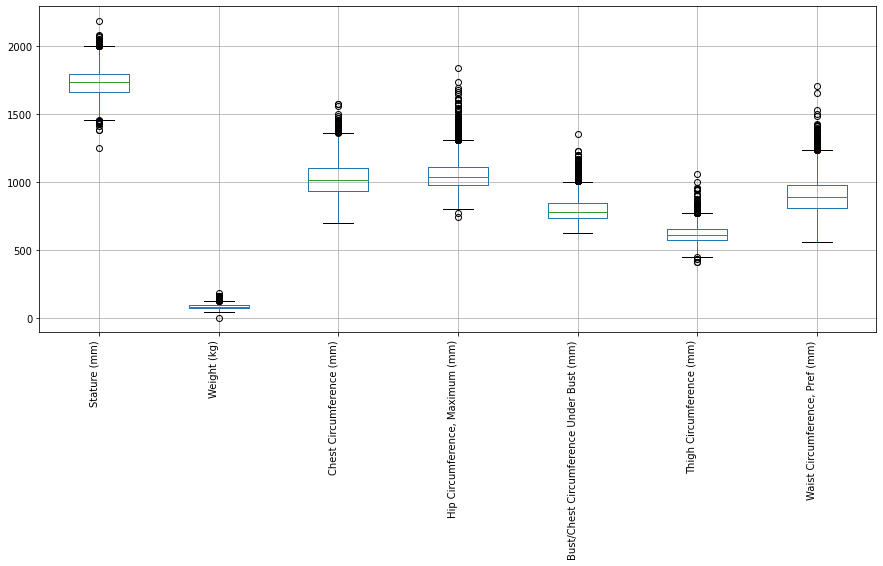

In [1234]:
# The numerical columns in the dataset
numerical_columns = df.select_dtypes(include='number').columns

fig = plt.figure(figsize=(15, 6))

# Boxplot for the numerical columns
boxplot = df[numerical_columns].boxplot()

boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=90, ha='right')


The distribution of the variables are as expected. The weight variable distribution is a little lower than others because it is recorded in kg as opposed to others that are recorded in millimetres. However, weight variable will not be converted as it is the standard measure of measuring weight.

## 4.2 Missing Values

Under bust measurement is essential in estimating shirt size in women. However, some of its values are missing in the final dataset. Furthermore, there are some values missing in other columns too. K - nearest neighbours and linear regression will be used to estimate these values.

In [1235]:
df.isnull().sum()

Gender                                          0
Stature (mm)                                    1
Weight (kg)                                     1
Chest Circumference (mm)                        1
Hip Circumference, Maximum (mm)              1290
Bust/Chest Circumference Under Bust (mm)    11248
Thigh Circumference (mm)                     3127
Waist Circumference, Pref (mm)                  8
dtype: int64

In [1236]:
# creating a temporary dataset that doesn't include under bust measurement
df_subset = df.drop(['Bust/Chest Circumference Under Bust (mm)', 'Gender'], axis=1)

missing_values_msk = df_subset.isna().any(axis=1)

# Select the rows with missing values
rows_with_missing_values = df_subset[missing_values_msk]
rows_with_missing_values


,Stature (mm),Weight (kg),Chest Circumference (mm),"Hip Circumference, Maximum (mm)",Thigh Circumference (mm),"Waist Circumference, Pref (mm)"
9,1799.000000,84.000000,1021.000000,NaN,610.0,930.000000
15,1787.000000,102.000000,1179.000000,1085.000000,618.0,NaN
22,1595.000000,98.600000,1150.000000,1280.000000,NaN,969.000000
81,1672.000000,101.600000,1220.000000,NaN,661.0,1135.000000
118,1624.000000,114.000000,1266.000000,NaN,679.0,1271.000000
...,...,...,...,...,...,...
1815,1770.260709,65.888559,931.589401,1030.824375,NaN,734.560903
1816,1770.112232,65.847069,931.929059,1030.142845,NaN,734.031789
1817,1777.485632,67.859244,915.165205,1063.666326,NaN,760.180078
1818,1771.213417,66.150173,929.426382,1035.148301,NaN,737.934852


### 4.2.1 K - Nearest Neighbours

In this section, the missing values in the dataset is filled using K-nearest neighbours which evaluates the values of other subjects that have similar values in other columns. To determine the number of neighbours to use, cross evaluation technique will be carried out on a range of 1 - 10 neigbours, the result with the lowest mse will be selected as the optimal number of neighbours and applied to the KNN imputer model.

In [1237]:
# To identify the columns with missing values (excluding the Underbust column)
columns_with_miss = df.columns[df.isna().any()].tolist()
columns_with_miss.remove('Bust/Chest Circumference Under Bust (mm)')

In [1238]:
# Defining the KNN regressor as the estimator
regressor = KNeighborsRegressor()

# Performing the cross-validation method on a range of 1 - 10 neighbors and evaluate using MSE on its prediction on the Thigh Circumference (mm) column.
results = []
for n_neighbors in range(1, 11):
    imputer = KNNImputer(n_neighbors=n_neighbors)
    imputed_data = imputer.fit_transform(df[columns_with_miss])
    imputed_data = pd.DataFrame(imputed_data, columns=columns_with_miss)
    
    #Exclude rows with NaN values from the target variable - thigh circumference
    valid_rows = ~df['Thigh Circumference (mm)'].isnull()
    imputed_data.reset_index(drop=True, inplace=True)
    df['Thigh Circumference (mm)'].reset_index(drop=True, inplace=True)
    valid_rows.reset_index(drop=True, inplace=True)
    scores = cross_val_score(regressor, imputed_data[valid_rows], df['Thigh Circumference (mm)'][valid_rows], cv=5, scoring='neg_mean_squared_error')
    mean_score = -scores.mean()
    results.append((n_neighbors, mean_score))

# To obtain the optimal number of neighbors with the lowest mean squared error.
best_n_neighbors = min(results, key=lambda x: x[1])[0]

# apply the best_n_neighbors value on the KNN imputation.
imputer = KNNImputer(n_neighbors=best_n_neighbors)
imputed_data = imputer.fit_transform(df[columns_with_miss])
imputed_data = pd.DataFrame(imputed_data, columns=columns_with_miss)

# Replace the missing values in the original dataset with the new values
df[columns_with_miss] = imputed_data

pd.options.mode.chained_assignment = 'warn'


/var/folders/tm/qv8g9h112v52mx8snqm4n83h0000gn/T/ipykernel_378/1615434545.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_with_miss] = imputed_data


In [1239]:
for n_neighbors, mean_score in results:
    print(f"Number of Neighbors: {n_neighbors}, Mean Squared Error: {mean_score}")

Number of Neighbors: 1, Mean Squared Error: 168.1058692141192
Number of Neighbors: 2, Mean Squared Error: 167.83377701557706
Number of Neighbors: 3, Mean Squared Error: 167.63728141303142
Number of Neighbors: 4, Mean Squared Error: 167.6056638250638
Number of Neighbors: 5, Mean Squared Error: 167.59709982979984
Number of Neighbors: 6, Mean Squared Error: 167.56058303363304
Number of Neighbors: 7, Mean Squared Error: 167.3245783901284
Number of Neighbors: 8, Mean Squared Error: 167.2765626947127
Number of Neighbors: 9, Mean Squared Error: 167.27940773300776
Number of Neighbors: 10, Mean Squared Error: 167.2750362470863


In [1240]:
df.isnull().sum()

Gender                                          0
Stature (mm)                                    0
Weight (kg)                                     0
Chest Circumference (mm)                        0
Hip Circumference, Maximum (mm)                 0
Bust/Chest Circumference Under Bust (mm)    11248
Thigh Circumference (mm)                        0
Waist Circumference, Pref (mm)                  0
dtype: int64

### 4.2.2 Under Bust - Linear Regression

In this section, the missing values will be predicted using a simple linear regression model and independent variables with high correlation with Under Bust (weight, chest circumference, hip circumference & waist circumference)

In [1241]:
# Defining the target and independent variables 
X = df[['Weight (kg)', 'Chest Circumference (mm)', 'Hip Circumference, Maximum (mm)', 'Waist Circumference, Pref (mm)']]
y = df['Bust/Chest Circumference Under Bust (mm)']

In [1242]:
# Identifying the missing 'UnderBust' values
missing_values = df['Bust/Chest Circumference Under Bust (mm)'].isnull()

# Spliting the data into training and testing sets  
X_train = X[~missing_values]
y_train = y[~missing_values]
X_test = X[missing_values]

# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the missing 'neckcircumference' values
y_pred = model.predict(X_test)

# Replacing missing values in the column with the predicted values
df.loc[missing_values, 'Bust/Chest Circumference Under Bust (mm)'] = y_pred

LinearRegression()

In [1243]:
# Check for any remaining missing values
missing_values_count = df.isnull().sum()
print(missing_values_count)

Gender                                      0
Stature (mm)                                0
Weight (kg)                                 0
Chest Circumference (mm)                    0
Hip Circumference, Maximum (mm)             0
Bust/Chest Circumference Under Bust (mm)    0
Thigh Circumference (mm)                    0
Waist Circumference, Pref (mm)              0
dtype: int64


## 4.3 Standardization

Since the dataset comprises of people from different regions, the values need to be standardised to account for any regional biases.

In [1244]:
# Creating a StandardScaler object
scaler = StandardScaler()
scaler.fit(df[numerical_columns])

# Transforming the relevant columns
df[numerical_columns] = scaler.transform(df[numerical_columns])

# The standardized dataset
print(df)


StandardScaler()

      Gender  Stature (mm)  Weight (kg)  Chest Circumference (mm)  \
0     Female      0.031391    -0.856786                 -0.771188   
1     Female     -0.576774     0.470460                  0.844961   
2     Female     -1.061406    -0.834757                 -0.822767   
3     Female      0.535028    -0.575917                 -0.590661   
4       Male      1.238219     1.202924                  0.905137   
...      ...           ...          ...                       ...   
1815  Female     -0.652795     0.122667                 -0.135044   
1816  Female      0.563536    -0.251976                 -0.943119   
1817  Female     -0.747821     1.796070                  0.724609   
1818  Female     -1.793105     2.220665                  3.277781   
1819  Female      1.114686     2.845070                  1.059874   

      Hip Circumference, Maximum (mm)  \
0                           -0.402368   
1                            0.969882   
2                           -0.554840   
3      

/var/folders/tm/qv8g9h112v52mx8snqm4n83h0000gn/T/ipykernel_378/4030189028.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_columns] = scaler.transform(df[numerical_columns])


## 4.4 One Hot Encoding

In this section, the categorical variable - Gender is transformed to binary values (0/1) for each value in the dataset. This transformation process is done using one hot encoding. This step is done because some machine learning algorithms can only operate with numerical values.

In [1245]:
# one-hot encoding
df = pd.get_dummies(df, columns=['Gender'])

print(df.head())

   Stature (mm)  Weight (kg)  Chest Circumference (mm)  \
0      0.031391    -0.856786                 -0.771188   
1     -0.576774     0.470460                  0.844961   
2     -1.061406    -0.834757                 -0.822767   
3      0.535028    -0.575917                 -0.590661   
4      1.238219     1.202924                  0.905137   

   Hip Circumference, Maximum (mm)  Bust/Chest Circumference Under Bust (mm)  \
0                        -0.402368                                 -0.523743   
1                         0.969882                                  0.810859   
2                        -0.554840                                 -0.607155   
3                         0.126202                                 -0.805260   
4                         0.512465                                  0.908882   

   Thigh Circumference (mm)  Waist Circumference, Pref (mm)  Gender_Female  \
0                 -0.539170                       -0.991681              1   
1             

The dataset is initially divided into two sections to account for training and testing datasets. Train data - 90% and test data - 10%

In [1246]:
# defining the models target and independent variables
features = ['Stature (mm)', 'Weight (kg)', 'Gender_Female', 'Gender_Male']
target_variables = ['Waist Circumference, Pref (mm)', 'Hip Circumference, Maximum (mm)', 'Thigh Circumference (mm)', 'Chest Circumference (mm)', 'Bust/Chest Circumference Under Bust (mm)', 'Thigh Circumference (mm)']


In [1247]:
# Split the data into training and testing sets
X_combo, X_test, y_combo, y_test = train_test_split(df[features], df[target_variables], test_size=0.1, random_state=42)


In [1248]:
X_combo

,Stature (mm),Weight (kg),Gender_Female,Gender_Male
214,0.715577,1.737127,0,1
1390,1.228717,0.634678,1,0
1572,0.753588,0.397405,0,1
494,-0.386723,-0.917366,1,0
3097,-1.194443,-0.289440,0,1
...,...,...,...,...
855,1.770364,-0.201424,1,0
1713,0.059899,-0.114607,1,0
1054,-0.481749,-0.245482,1,0
860,-0.491251,-0.856786,1,0


# 5. Data Visualisations

In this section, we visually explore the dataset to identify any underlying trends and patterns of interest. 

## 5.1 Gender Distribution

<Figure size 432x432 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7f9345472790>,
 [Text(-1.0872351447208195, -0.16709201083205277, 'Male Subjects'),
  Text(1.0872351290765316, 0.16709211262635307, 'Female Subjects')],
 [Text(-0.5930373516659014, -0.09114109681748332, '54.9%'),
  Text(0.5930373431326535, 0.09114115234164712, '45.1%')])

Text(0.5, 1.0, 'Gender Distribution')

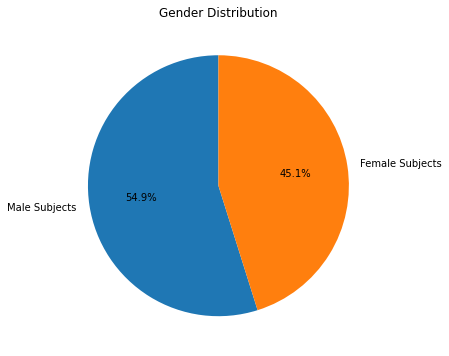

In [1249]:
# Gender Distribution - female and male
gender_columns = ['Gender_Male', 'Gender_Female']
gender_counts = df[gender_columns].sum()
gender_labels = ['Male Subjects', 'Female Subjects']
gender_values = gender_counts.values.tolist()

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(gender_values, labels=gender_labels, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')

#plt.savefig('gender_distribution.png')

plt.show()

From the figure above, we see that the final dataset contain more male subjets than female subjects. This may be valuable to consider in the modelling process.

In [1250]:
# To allocate the demogpaphic locations of all the individuals in Ansur dataset
ansur_df['Country'] = 'United States'
ansur_df['Occupation'] = 'Armed Forces'

### Ceaser demographic datasets

In [1251]:
italy_demo = pd.read_excel('ItalyDemographics.xlsx')
italy_demo

,Country,Age (Years),Occupation,Fitness
0,Italy,30.455852,Degreed Engineer,0-1
1,Italy,30.332649,Degreed Engineer,0-1
2,Italy,21.245722,Student,2-3
3,Italy,57.897331,Other Specialty Occupation,6-10
4,Italy,18.061602,Student,More than 10
...,...,...,...,...
796,Italy,23.216975,Administrative Support,2-3
797,Italy,25.913758,Unemployed,2-3
798,Italy,26.387406,Student,2-3
799,Italy,21.785079,Student,No Response


In [1252]:
NA_demo = pd.read_excel('All NA_AllPublicMetric.xls')
NA_demo

,Country,Age (Years),Occupation,Fitness
0,United States,47.0,Degreed Engineer,4-6
1,United States,45.0,Management,4-6
2,United States,27.0,Technician,2-3
3,United States,47.0,Management,More than 10
4,United States,43.0,Management,2-3
...,...,...,...,...
2386,United States,20.0,Student,0-1
2387,United States,19.0,Student,4-6
2388,United States,21.0,Student,6-10
2389,United States,20.0,Student,4-6


In [1253]:
netherland_demo = pd.read_excel("DutchDemographics.xlsx")
netherland_demo

,Country,Age (Years),Occupation,Fitness
0,Netherlands,38.5,Unemployed,4-6
1,Netherlands,30.8,Armed Services,4-6
2,Netherlands,43.9,Unemployed,2-3
3,Netherlands,23.7,Armed Services,2-3
4,Netherlands,33.3,Health and Wellbeing,More than 10
...,...,...,...,...
1262,Netherlands,27.6,Other Speciality Occupation,2-3
1263,Netherlands,32.1,Health and Wellbeing,0-1
1264,Netherlands,20.1,Other Speciality Occupation,More than 10
1265,Netherlands,32.5,Trade,0-1


In [1254]:
ceaser_demo = pd.concat([netherland_demo, NA_demo, italy_demo])
ceaser_demo

,Country,Age (Years),Occupation,Fitness
0,Netherlands,38.500000,Unemployed,4-6
1,Netherlands,30.800000,Armed Services,4-6
2,Netherlands,43.900000,Unemployed,2-3
3,Netherlands,23.700000,Armed Services,2-3
4,Netherlands,33.300000,Health and Wellbeing,More than 10
...,...,...,...,...
796,Italy,23.216975,Administrative Support,2-3
797,Italy,25.913758,Unemployed,2-3
798,Italy,26.387406,Student,2-3
799,Italy,21.785079,Student,No Response


In [1255]:
# To extract the demographic info from the ansur dataset and merge it to the ceaser demo dataset
select_columns = ansur_df[['Country', 'Age', 'Occupation']]
select_columns = select_columns.rename(columns={'Age': 'Age (Years)'})

demo_df = pd.concat([ceaser_demo, select_columns])
demo_df

,Country,Age (Years),Occupation,Fitness
0,Netherlands,38.5,Unemployed,4-6
1,Netherlands,30.8,Armed Services,4-6
2,Netherlands,43.9,Unemployed,2-3
3,Netherlands,23.7,Armed Services,2-3
4,Netherlands,33.3,Health and Wellbeing,More than 10
...,...,...,...,...
4077,United States,22.0,Armed Forces,NaN
4078,United States,22.0,Armed Forces,NaN
4079,United States,23.0,Armed Forces,NaN
4080,United States,22.0,Armed Forces,NaN


## 5.2 Location Distribution

In [1256]:
# To get the number of subjcets per country
country_no = demo_df['Country'].value_counts()
country_no

United States    8459
Netherlands      1267
Italy             801
Name: Country, dtype: int64

<Axes: >

Text(0.5, 0, 'No of subjects')

Text(0, 0.5, 'Country')

Text(0.5, 1.0, 'Location Distribution of Dataset Subjects')

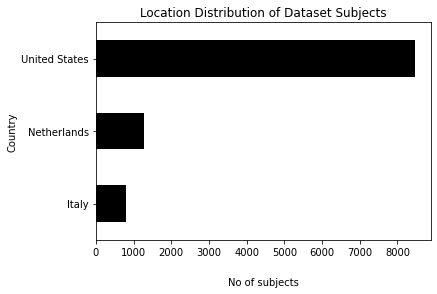

In [1257]:
# Horizontal bar chart - For location distribution
country_count = country_no.sort_values(ascending = True)
country_count.plot(kind='barh', color = 'black')

# Plot the data
plt.xlabel('No of subjects', labelpad=20)
plt.ylabel('Country')
plt.title('Location Distribution of Dataset Subjects')
plt.show()

#plt.savefig('location_distribution.png')

## 5.3 Age Distribution

<Figure size 720x504 with 0 Axes>

(array([2.493e+03, 2.492e+03, 1.612e+03, 1.471e+03, 1.085e+03, 7.650e+02,
        4.160e+02, 1.820e+02, 3.000e+00, 1.000e+00]),
 array([17. , 23.2, 29.4, 35.6, 41.8, 48. , 54.2, 60.4, 66.6, 72.8, 79. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Age Distribution of the Subjects in the Dataset')

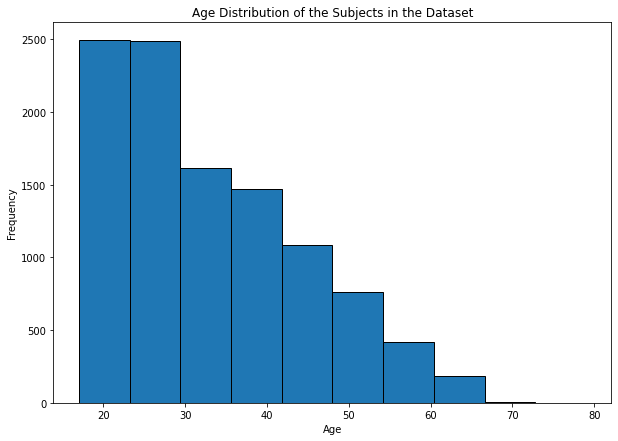

<Figure size 432x288 with 0 Axes>

In [1258]:
plt.figure(figsize=(10, 7))  
plt.hist(demo_df['Age (Years)'],  bins = 10,
         edgecolor='black')  
plt.xlabel('Age') 
plt.ylabel('Frequency')  
plt.title('Age Distribution of the Subjects in the Dataset')
plt.show()

plt.savefig('age_distribution.png')

# 6. Predictive Models - Body Measurements

In this section, the training set will be divided into train and validation set so that the model can be trained and evaluated before the best performing model is applied to the test set.

## 6.1 Train-Validation set

The train set is split into two - 80% for train set & 10% for Validation set

In [1259]:
# Spliting the training set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_combo, y_combo, test_size=0.1, random_state=42)

In [1260]:
X_train

,Stature (mm),Weight (kg),Gender_Female,Gender_Male
1510,-0.082640,-0.576666,1,0
1303,0.810603,0.322476,1,0
25,0.040894,-0.239975,1,0
917,-0.747821,-1.115627,0,1
1403,-0.519759,-0.052166,0,1
...,...,...,...,...
451,-0.310702,-0.388670,0,1
868,-0.975883,-1.787511,1,0
3953,-0.852349,-0.884322,0,1
2532,0.363982,-1.251023,0,1


## 6.2 Joint Models - Multi Output Regression

### 6.2.1 Linear Regression

In [1261]:
# Training a multi-output model using linear regeression
model_linear = MultiOutputRegressor(LinearRegression())
model_linear.fit(X_train, y_train)

# The performance of the model on the val set
y_pred = model_linear.predict(X_val)
mape = mean_absolute_percentage_error(y_val, y_pred)
rmse = sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

MultiOutputRegressor(estimator=LinearRegression())

In [1262]:
print("Mean absolute Percentage error (MAPE):", mape)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)

Mean absolute Percentage error (MAPE): 2.1836626389040843
Root Mean Squared Error (RMSE): 0.4577040819503215
R-squared: 0.7920620139194053


###  6.2.2 Random Forest

In [1263]:
base_estimator = RandomForestRegressor(random_state=42)
model_rf = MultiOutputRegressor(base_estimator)

# Training data
model_rf.fit(X_train, y_train)

# Predictions
y_pred = model_rf.predict(X_val)

# Evaluations
mape = mean_absolute_percentage_error(y_val, y_pred)
rmse = sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print("Mean absolute Percentage error (MAPE):", mape)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)


MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

Mean absolute Percentage error (MAPE): 0.7760799117916406
Root Mean Squared Error (RMSE): 0.23160326613776971
R-squared: 0.9467090865705731


### 6.2.3 XGBoost Algorithm

In [1264]:
# Multi-output model using XGBoost
model_xgb = MultiOutputRegressor(xgb.XGBRegressor(n_estimators=100))
model_xgb.fit(X_train, y_train)

# Performance of the model on the val set
y_pred = model_xgb.predict(X_val)
mape = mean_absolute_percentage_error(y_val, y_pred)
rmse = sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)


MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))

In [1265]:
print("MAPE - XGBoost Multi-Output:", mape)
print("RMSE - XGBoost Multi-Output:", rmse)
print("R-squared - XGBoost Multi-Output:", r2)


MAPE - XGBoost Multi-Output: 1.4332634247677383
RMSE - XGBoost Multi-Output: 0.3244727046973739
R-squared - XGBoost Multi-Output: 0.8955131346304


### 6.2.4 Ensemble Model

This section builds a model that combines the best multi output models together to make it even stronger and more accurate.

In [1266]:
# The individual models
model_rf = RandomForestRegressor(n_estimators=100)
model_xgb = XGBRegressor(n_estimators=100)
model_linear = LinearRegression()

# Fit on training set
model_rf.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)
model_linear.fit(X_train, y_train)

# Predictions
y_pred_rf = model_rf.predict(X_val)
y_pred_xgb = model_xgb.predict(X_val)
y_pred_linear = model_linear.predict(X_val)

# Average predictions
y_ensemble = (y_pred_rf + y_pred_xgb + y_pred_linear) / 3
y_pred = y_ensemble.reshape(-1, y_val.shape[1])

mape_ensemble = mean_absolute_percentage_error(y_val, y_pred)
rmse_ensemble = sqrt(mean_squared_error(y_val, y_pred))
r2_ensemble = r2_score(y_val, y_pred)

print("MAPE - Ensemble Model:", mape_ensemble)
print("RMSE - Ensemble Model:", rmse_ensemble)
print("R-squared - Ensemble Model:", r2_ensemble)


RandomForestRegressor()

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

LinearRegression()

MAPE - Ensemble Model: 1.4241556178471255
RMSE - Ensemble Model: 0.3073526058118641
R-squared - Ensemble Model: 0.9062516966878215


## 6.3 Independent Approach

In this section, each main measurement will be estimated individually and its accuracy evaluated.

In [1267]:
y_combo = y_combo.iloc[:, :-1]

In [1268]:
# Input features and output variables
X1 = X_combo
y_waist = y_combo['Waist Circumference, Pref (mm)']
y_hip = y_combo['Hip Circumference, Maximum (mm)']
y_thigh = y_combo['Thigh Circumference (mm)']
y_chest = y_combo['Chest Circumference (mm)']
y_underbust = y_combo['Bust/Chest Circumference Under Bust (mm)']


### 6.3.1 Linear Regression

In [1269]:
# Waist circumference

# Split the data into train and val sets
X_train, X_val, y_waist_train, y_waist_val = train_test_split(X1, y_waist, test_size=0.1, random_state=42)

model_waist = LinearRegression()
model_waist.fit(X_train, y_waist_train)

# Predict the waist measurements for the validation data
y_waist_pred = model_waist.predict(X_val)

LinearRegression()

In [1270]:
mape = mean_absolute_percentage_error(y_waist_val, y_waist_pred)
rmse = sqrt(mean_squared_error(y_waist_val, y_waist_pred))
r2 = r2_score(y_waist_val, y_waist_pred)
print("MAPE waist linear regression:", mape)
print("RMSE waist linear regression:", rmse)
print("R-squared waist linear regression:", r2)


MAPE waist linear regression: 1.691888097736701
RMSE waist linear regression: 0.3936132343427443
R-squared waist linear regression: 0.8460874976036346


In [1271]:
# hip

# Split the data into train and val sets
X_train, X_val, y_hip_train, y_hip_val = train_test_split(X1, y_hip, test_size=0.1, random_state=42)

model_hip = LinearRegression()
model_hip.fit(X_train, y_hip_train)

# Predict the waist measurements for the test data
y_hip_pred = model_hip.predict(X_val)

LinearRegression()

In [1272]:
mape = mean_absolute_percentage_error(y_hip_val, y_hip_pred)
rmse = sqrt(mean_squared_error(y_hip_val, y_hip_pred))
r2 = r2_score(y_hip_val, y_hip_pred)
print("MAPE hip LR:", mape)
print("RMSE hip LR:", rmse)
print("R-squared hip LR:", r2)

MAPE hip LR: 2.4809170814280677
RMSE hip LR: 0.49493796813655977
R-squared hip LR: 0.7478322963495514


In [1273]:
# chest

X_train, X_val, y_chest_train, y_chest_val = train_test_split(X1, y_chest, test_size=0.1, random_state=42)
model_chest = LinearRegression()
model_chest.fit(X_train, y_chest_train)

# Predict the waist measurements for the test data
y_chest_pred = model_chest.predict(X_val)

LinearRegression()

In [1274]:
mape = mean_absolute_percentage_error(y_chest_val, y_chest_pred)
rmse = sqrt(mean_squared_error(y_chest_val, y_chest_pred))
r2 = r2_score(y_chest_val, y_chest_pred)
print("MAPE chest LR:", mape)
print("RMSE chest LR:", rmse)
print("R-squared chest LR:", r2)


MAPE chest LR: 1.3956785893235037
RMSE chest LR: 0.3438774445749697
R-squared chest LR: 0.8828924717426551


In [1275]:
# under bust

# Split the data into train and val sets
X_train, X_val, y_underbust_train, y_underbust_val = train_test_split(X1, y_underbust, test_size=0.1, random_state=42)

model_underbust = LinearRegression()
model_underbust.fit(X_train, y_underbust_train)

# Predict the waist measurements for the test data
y_underbust_pred = model_underbust.predict(X_val)

LinearRegression()

In [1276]:
mape = mean_absolute_percentage_error(y_underbust_val, y_underbust_pred)
rmse = sqrt(mean_squared_error(y_underbust_val, y_underbust_pred))
r2 = r2_score(y_underbust_val, y_underbust_pred)
print("MAPE under bust LR:", mape)
print("RMSE under bust LR:", rmse)
print("R-squared under bust LR:", r2)

MAPE under bust LR: 1.0274324341708083
RMSE under bust LR: 0.27458836905160616
R-squared under bust LR: 0.9262661483384094


In [1277]:
# Thigh 

# Split the data into train and val sets
X_train, X_val, y_thigh_train, y_thigh_val = train_test_split(X1, y_thigh, test_size=0.1, random_state=42)

model_thigh = LinearRegression()
model_thigh.fit(X_train, y_thigh_train)

# Predict the waist measurements for the val data
y_thigh_pred = model_thigh.predict(X_val)

LinearRegression()

In [1278]:
mape = mean_absolute_percentage_error(y_thigh_val, y_thigh_pred)
rmse = sqrt(mean_squared_error(y_thigh_val, y_thigh_pred))
r2 = r2_score(y_thigh_val, y_thigh_pred)
print("MAPE thigh LR:", mape)
print("RMSE thigh LR:", rmse)
print("R-squared thigh LR:", r2)

MAPE thigh LR: 3.2530298153827117
RMSE thigh LR: 0.5759395454147878
R-squared thigh LR: 0.6746468347410909


### 6.3.2 Random Forest

In [1279]:
# Waist

# Split the data into train and test sets
X_train, X_val, y_waist_train, y_waist_val = train_test_split(X1, y_waist, test_size=0.1, random_state=42)

model_waist = RandomForestRegressor(n_estimators=100)
model_waist.fit(X_train, y_waist_train)

# Predict the waist measurements for the val data
y_waist_pred = model_waist.predict(X_val)

RandomForestRegressor()

In [1280]:
mape = mean_absolute_percentage_error(y_waist_val, y_waist_pred)
rmse = sqrt(mean_squared_error(y_waist_val, y_waist_pred))
r2 = r2_score(y_waist_val, y_waist_pred)

print("MAPE waist random forest:", mape)
print("Root Mean Squared Error (RMSE) waist random forest:", rmse)
print("R-squared waist random forest:", r2)


MAPE waist random forest: 0.6150568207044028
Root Mean Squared Error (RMSE) waist random forest: 0.1908778663454045
R-squared waist random forest: 0.9638052435684733


In [1281]:
# hip

# Split the data into train and val sets
X_train, X_val, y_hip_train, y_hip_val = train_test_split(X1, y_hip, test_size=0.1, random_state=42)

model_hip = RandomForestRegressor(n_estimators=100)
model_hip.fit(X_train, y_hip_train)

# Predict the waist measurements for the val data
y_hip_pred = model_hip.predict(X_val)

RandomForestRegressor()

In [1282]:
mape = mean_absolute_percentage_error(y_hip_val, y_hip_pred)
rmse = sqrt(mean_squared_error(y_hip_val, y_hip_pred))
r2 = r2_score(y_hip_val, y_hip_pred)

print("MAPE hip random forest:", mape)
print("Root Mean Squared Error (RMSE) hip random forest:", rmse)
print("R-squared hip random forest:", r2)


MAPE hip random forest: 0.7743508925291783
Root Mean Squared Error (RMSE) hip random forest: 0.2734146963724201
R-squared hip random forest: 0.9230459234793752


In [1283]:
# chest

# Split the data into train and test sets
X_train, X_val, y_chest_train, y_chest_val = train_test_split(X1, y_chest, test_size=0.1, random_state=42)

model_chest = RandomForestRegressor(n_estimators=100)
model_chest.fit(X_train, y_chest_train)

# Predict the waist measurements for the test data
y_chest_pred = model_chest.predict(X_val)

RandomForestRegressor()

In [1284]:
mape = mean_absolute_percentage_error(y_chest_val, y_chest_pred)
rmse = sqrt(mean_squared_error(y_chest_val, y_chest_pred))
r2 = r2_score(y_chest_val, y_chest_pred)
print("MAPE chest random forest:", mape)
print("Root Mean Squared Error (RMSE) chest random forest:", rmse)
print("R-squared chest random forest:", r2)

MAPE chest random forest: 0.37044590820695267
Root Mean Squared Error (RMSE) chest random forest: 0.14630732053051665
R-squared chest random forest: 0.9788012844925265


In [1285]:
# under bust

# Split the data into train and val sets
X_train, X_val, y_underbust_train, y_underbust_val = train_test_split(X1, y_underbust, test_size=0.1, random_state=42)

model_underbust = RandomForestRegressor(n_estimators=100)
model_underbust.fit(X_train, y_underbust_train)

# Predict the waist measurements for the test data
y_underbust_pred = model_underbust.predict(X_val)

RandomForestRegressor()

In [1286]:
mape = mean_absolute_percentage_error(y_underbust_val, y_underbust_pred)
rmse = sqrt(mean_squared_error(y_underbust_val, y_underbust_pred))
r2 = r2_score(y_underbust_val, y_underbust_pred)
print("MAPE under bust random forest:", mape)
print("Root Mean Squared Error (RMSE) under bust random forest:", rmse)
print("R-squared under bust random forest:", r2)

MAPE under bust random forest: 0.46737100901320405
Root Mean Squared Error (RMSE) under bust random forest: 0.173632182916024
R-squared under bust random forest: 0.9705175822026387


In [1287]:
# Thigh 

# Split the data into train and test sets
X_train, X_val, y_thigh_train, y_thigh_val = train_test_split(X1, y_thigh, test_size=0.2, random_state=42)

# Define the Random Forest regressor
model_thigh = RandomForestRegressor(n_estimators=100)

# Fit the waist model on the training data
model_thigh.fit(X_train, y_thigh_train)

# Predict the waist measurements for the test data
y_thigh_pred = model_thigh.predict(X_val)

RandomForestRegressor()

In [1288]:
mape = mean_absolute_percentage_error(y_thigh_val, y_thigh_pred)
rmse = sqrt(mean_squared_error(y_thigh_val, y_thigh_pred))
r2 = r2_score(y_thigh_val, y_thigh_pred)
print("MAPE thigh random forest:", mape)
print("Root Mean Squared Error (RMSE) thigh random forest:", rmse)
print("R-squared thigh random forest:", r2)

MAPE thigh random forest: 1.2187760122789104
Root Mean Squared Error (RMSE) thigh random forest: 0.3199632208094463
R-squared thigh random forest: 0.9024006109653148


### 6.3.3 XGBoost Algorithm

In [1289]:
# Waist

# Split the data into train and test sets
X_train, X_val, y_waist_train, y_waist_val = train_test_split(X1, y_waist, test_size=0.1, random_state=42)

model_waist = xgb.XGBRegressor(n_estimators=100)
model_waist.fit(X_train, y_waist_train)

# Predict the waist measurements for the test data
y_waist_pred = model_waist.predict(X_val)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [1290]:
mape = mean_absolute_percentage_error(y_waist_val, y_waist_pred)
rmse = sqrt(mean_squared_error(y_waist_val, y_waist_pred))
r2 = r2_score(y_waist_val, y_waist_pred)
print("MAPE waist XGBoost :", mape)
print("Root Mean Squared Error (RMSE) waist XGBoost :", rmse)
print("R-squared waist XGboost:", r2)

MAPE waist XGBoost : 1.1868355352537425
Root Mean Squared Error (RMSE) waist XGBoost : 0.2823373772806198
R-squared waist XGboost: 0.920809831488029


In [1291]:
# hip

# Split the data into train and test sets
X_train, X_val, y_hip_train, y_hip_val = train_test_split(X1, y_hip, test_size=0.1, random_state=42)

model_hip = xgb.XGBRegressor(n_estimators=100)
model_hip.fit(X_train, y_hip_train)

# Predict the waist measurements for the test data
y_hip_pred = model_hip.predict(X_val)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [1292]:
mape = mean_absolute_percentage_error(y_hip_val, y_hip_pred)
rmse = sqrt(mean_squared_error(y_hip_val, y_hip_pred))
r2 = r2_score(y_hip_val, y_hip_pred)
print("MAPE hip Xgboost:", mape)
print("Root Mean Squared Error (RMSE) hip Xgboost:", rmse)
print("R-squared hip Xgboost:", r2)


MAPE hip Xgboost: 1.4084770225327876
Root Mean Squared Error (RMSE) hip Xgboost: 0.34986990063342516
R-squared hip Xgboost: 0.8739911393601238


In [1293]:
# chest

# Split the data into train and test sets
X_train, X_val, y_chest_train, y_chest_val = train_test_split(X1, y_chest, test_size=0.2, random_state=42)

model_chest = xgb.XGBRegressor(n_estimators=100)
model_chest.fit(X_train, y_chest_train)

# Predict the waist measurements for the test data
y_chest_pred = model_chest.predict(X_val)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [1294]:
mape = mean_absolute_percentage_error(y_chest_val, y_chest_pred)
rmse = sqrt(mean_squared_error(y_chest_val, y_chest_pred))
r2 = r2_score(y_chest_val, y_chest_pred)
print("MAPE chest Xgboost:", mape)
print("Root Mean Squared Error (RMSE) chest Xgboost:", rmse)
print("R-squared chest Xgboost:", r2)

MAPE chest Xgboost: 1.013475755915562
Root Mean Squared Error (RMSE) chest Xgboost: 0.24060832003821916
R-squared chest Xgboost: 0.9436130476679593


In [1295]:
# under bust

# Split the data into train and test sets
X_train, X_val, y_underbust_train, y_underbust_val = train_test_split(X1, y_underbust, test_size=0.1, random_state=42)

model_underbust = xgb.XGBRegressor(n_estimators=100)
model_underbust.fit(X_train, y_underbust_train)

# Predict the waist measurements for the test data
y_underbust_pred = model_underbust.predict(X_val)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [1296]:
mape = mean_absolute_percentage_error(y_underbust_val, y_underbust_pred)
rmse = sqrt(mean_squared_error(y_underbust_val, y_underbust_pred))
r2 = r2_score(y_underbust_val, y_underbust_pred)
print("MAPE under bust xgboost:", mape)
print("Root Mean Squared Error (RMSE) under bust xgboost:", rmse)
print("R-squared under bust xgboost:", r2)

MAPE under bust xgboost: 0.8214641651154078
Root Mean Squared Error (RMSE) under bust xgboost: 0.21210916971515134
R-squared under bust xgboost: 0.9560031550785669


In [1297]:
# Thigh 

# Split the data into train and test sets
X_train, X_val, y_thigh_train, y_thigh_val = train_test_split(X1, y_thigh, test_size=0.1, random_state=42)

model_thigh = xgb.XGBRegressor(n_estimators=100)
model_thigh.fit(X_train, y_thigh_train)

# Predict the waist measurements for the test data
y_thigh_pred = model_thigh.predict(X_val)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [1298]:
mape = mean_absolute_percentage_error(y_thigh_val, y_thigh_pred)
rmse = sqrt(mean_squared_error(y_thigh_val, y_thigh_pred))
r2 = r2_score(y_thigh_val, y_thigh_pred)
print("MAPE thigh xgboost:", mape)
print("Root Mean Squared Error (RMSE) thigh xgboost:", rmse)
print("R-squared thigh xgboost:", r2)

MAPE thigh xgboost: 2.0070203259442305
Root Mean Squared Error (RMSE) thigh xgboost: 0.4066970189639363
R-squared thigh xgboost: 0.8377654995520598


## 6.4 Sequential Approach

In this section, the most accurate measurement is added to the input and used to predict the second most accurate. 

### 6.4.1 Random Forest

In [1299]:
# Starting with chest cause it has the highest accuracy

# Split the data into train and test sets
X_train, X_val, y_chest_train, y_chest_val = train_test_split(X1, y_chest, test_size=0.1, random_state=42)

model_chest = RandomForestRegressor(n_estimators=100)
model_chest.fit(X_train, y_chest_train)
y_chest_pred = model_chest.predict(X_val)

# Evaluation
mape_chest = mean_absolute_percentage_error(y_chest_val, y_chest_pred)
rmse_chest = sqrt(mean_squared_error(y_chest_val, y_chest_pred))
r2_chest = r2_score(y_chest_val, y_chest_pred)

print("Chest MAPE:", mape_chest)
print("Chest Root Mean Squared Error (RMSE):", rmse_chest)
print("Chest R-squared:", r2_chest)

# Predict the chest measurements for the entire dataset (train and val)
y_chest_pred_all = model_chest.predict(X1)


RandomForestRegressor()

Chest MAPE: 0.3747008552457803
Chest Root Mean Squared Error (RMSE): 0.14339999886670718
Chest R-squared: 0.9796354072787542


In [1300]:
# Use the predicted chest measurements as an additional input for the under bust model
X_underbust = X1.copy()

# Replace the chest measurements in the entire dataset with the predicted values
X_underbust['Chest Circumference (mm)'] = y_chest_pred_all

# Split the data into train and test sets for the under bust model
X_underbust_train, X_underbust_val, y_underbust_train, y_underbust_val = train_test_split(X_underbust, y_underbust, test_size=0.1, random_state=42)

model_underbust = RandomForestRegressor(n_estimators=100)
model_underbust.fit(X_underbust_train, y_underbust_train)
y_underbust_pred = model_underbust.predict(X_underbust_val)

# Evaluation
mape_underbust = mean_absolute_percentage_error(y_underbust_val, y_underbust_pred)
rmse_underbust = sqrt(mean_squared_error(y_underbust_val, y_underbust_pred))
r2_underbust = r2_score(y_underbust_val, y_underbust_pred)

print("Under Bust MAPE:", mape_underbust)
print("Under Bust Root Mean Squared Error (RMSE):", rmse_underbust)
print("Under Bust R-squared:", r2_underbust)

# Predict the under bust measurements for the entire dataset (train and test)
y_underbust_pred_all = model_underbust.predict(X_underbust)



RandomForestRegressor()

Under Bust MAPE: 0.34028831937078047
Under Bust Root Mean Squared Error (RMSE): 0.16256110202153226
Under Bust R-squared: 0.9741574172678791


In [1301]:
# Use the predicted under bust measurements as an additional input for the waist model
X_waist = X1.copy()

# Replace the chest measurements in the entire dataset with the predicted values
X_waist['Chest Circumference (mm)'] = y_chest_pred_all

# Split the data into train and test sets for the waist model
X_waist_train, X_waist_val, y_waist_train, y_waist_val = train_test_split(X_waist, y_waist, test_size=0.1, random_state=42)

model_waist = RandomForestRegressor(n_estimators=100)
model_waist.fit(X_waist_train, y_waist_train)
y_waist_pred = model_waist.predict(X_waist_val)

# Evaluating the models using metrics like mean squared error and R-squared
mape_waist = mean_absolute_percentage_error(y_waist_val, y_waist_pred)
rmse_waist = sqrt(mean_squared_error(y_waist_val, y_waist_pred))
r2_waist = r2_score(y_waist_val, y_waist_pred)

print("Waist MAPE:", mape_waist)
print("Waist Root Mean Squared Error (RMSE):", rmse_waist)
print("Waist R-squared:", r2_waist)

# Predict the waist measurements for the entire dataset (train and test)
y_waist_pred_all = model_waist.predict(X_waist)

RandomForestRegressor()

Waist MAPE: 0.6256533929518968
Waist Root Mean Squared Error (RMSE): 0.20663258832448853
Waist R-squared: 0.9575837620718606


In [1302]:
# Use the predicted waist measurements as an additional input for the hip model
X_hip = X_waist.copy()

# Replace the chest measurements in the entire dataset with the predicted values
X_hip['Waist Circumference, Pref (mm)'] = y_waist_pred_all

# Split the data into train and test sets for the hip model
X_hip_train, X_hip_val, y_hip_train, y_hip_val = train_test_split(X_hip, y_hip, test_size=0.1, random_state=42)

model_hip = RandomForestRegressor(n_estimators=100)
model_hip.fit(X_hip_train, y_hip_train)
y_hip_pred = model_hip.predict(X_hip_val)

# Evaluation
mape_hip = mean_absolute_percentage_error(y_hip_val, y_hip_pred)
rmse_hip = sqrt(mean_squared_error(y_hip_val, y_hip_pred))
r2_hip = r2_score(y_hip_val, y_hip_pred)

print("Hip MAPE:", mape_hip)
print("Hip Root Mean Squared Error (RMSE):", rmse_hip)
print("Hip R-squared:", r2_hip)

# Predict the hip measurements for the entire dataset (train and test)
y_hip_pred_all = model_hip.predict(X_hip)

RandomForestRegressor()

Hip MAPE: 0.7257509531022671
Hip Root Mean Squared Error (RMSE): 0.26710236777729773
Hip R-squared: 0.9265581856741671


In [1303]:
# Use the predicted hip measurements as an additional input for the thigh model
X_thigh = X_hip.copy()

# Replace the chest measurements in the entire dataset with the predicted values
X_thigh['Hip Circumference, Maximum (mm)'] = y_hip_pred_all

# Split the data into train and test sets for the thigh model
X_thigh_train, X_thigh_val, y_thigh_train, y_thigh_val = train_test_split(X_thigh, y_thigh, test_size=0.1, random_state=42)

model_thigh = RandomForestRegressor(n_estimators=100)
model_thigh.fit(X_thigh_train, y_thigh_train)
y_thigh_pred = model_thigh.predict(X_thigh_val)

# Evaluation
mape_thigh = mean_absolute_percentage_error(y_thigh_val, y_thigh_pred)
rmse_thigh = sqrt(mean_squared_error(y_thigh_val, y_thigh_pred))
r2_thigh = r2_score(y_thigh_val, y_thigh_pred)

print("thigh MAPE:", mape_thigh)
print("thigh Root Mean Squared Error (RMSE):", rmse_thigh)
print("thigh R-squared:", r2_thigh)

# Predict the waist measurements for the entire dataset (train and test)
y_thigh_pred_all = model_thigh.predict(X_thigh)

RandomForestRegressor()

thigh MAPE: 0.9318516159129208
thigh Root Mean Squared Error (MSE): 0.29272783984198314
thigh R-squared: 0.9159516303548036


### 6.4.2 XGBoost Algorithm

In [1304]:
# Starting with chest cause it has the highest accuracy

# Split the data into train and test sets
X_train, X_val, y_chest_train, y_chest_val = train_test_split(X1, y_chest, test_size=0.1, random_state=42)

model_chest = xgb.XGBRegressor(n_estimators=100)
model_chest.fit(X_train, y_chest_train)
y_chest_pred = model_chest.predict(X_val)

# Evaluation
mape_chest = mean_absolute_percentage_error(y_chest_val, y_chest_pred)
rmse_chest = sqrt(mean_squared_error(y_chest_val, y_chest_pred))
r2_chest = r2_score(y_chest_val, y_chest_pred)

print("Chest MAPE:", mape_chest)
print("Chest Root Mean Squared Error (RMSE):", rmse_chest)
print("Chest R-squared:", r2_chest)

# Predict the chest measurements for the entire dataset (train and test)
y_chest_pred_all = model_chest.predict(X1)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Chest MAPE: 1.1687631738160302
Chest Root Mean Squared Error (RMSE): 0.23189791770793833
Chest R-squared: 0.9467436827515613


In [1305]:
# Use the predicted chest measurements as an additional input for the under bust model
X_underbust = X1.copy()

# Replace the chest measurements in the entire dataset with the predicted values
X_underbust['Chest Circumference (mm)'] = y_chest_pred_all

# Split the data into train and test sets for the under bust model
X_underbust_train, X_underbust_val, y_underbust_train, y_underbust_val = train_test_split(X_underbust, y_underbust, test_size=0.1, random_state=42)

model_underbust = xgb.XGBRegressor(n_estimators=100)
model_underbust.fit(X_underbust_train, y_underbust_train)
y_underbust_pred = model_underbust.predict(X_underbust_val)

# Evaluation
mape_underbust = mean_absolute_percentage_error(y_underbust_val, y_underbust_pred)
rmse_underbust = sqrt(mean_squared_error(y_underbust_val, y_underbust_pred))
r2_underbust = r2_score(y_underbust_val, y_underbust_pred)

print("Under Bust MAPE:", mape_underbust)
print("Under Bust Root Mean Squared Error (RMSE):", rmse_underbust)
print("Under Bust R-squared:", r2_underbust)

# Predict the under bust measurements for the entire dataset (train and test)
y_underbust_pred_all = model_underbust.predict(X_underbust)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Under Bust MAPE: 0.6118753459267148
Under Bust Root Mean Squared Error (RMSE): 0.1840898729525999
Under Bust R-squared: 0.9668592416677183


In [1306]:
# Use the predicted under bust measurements as an additional input for the waist model
X_waist = X1.copy()

# Replace the chest measurements in the entire dataset with the predicted values
X_waist['Chest Circumference (mm)'] = y_chest_pred_all

# Split the data into train and test sets for the waist model
X_waist_train, X_waist_val, y_waist_train, y_waist_val = train_test_split(X_waist, y_waist, test_size=0.1, random_state=42)

model_waist = xgb.XGBRegressor(n_estimators=100)
model_waist.fit(X_waist_train, y_waist_train)
y_waist_pred = model_waist.predict(X_waist_val)

# Evaluation
mape_waist = mean_absolute_percentage_error(y_waist_val, y_waist_pred)
rmse_waist = sqrt(mean_squared_error(y_waist_val, y_waist_pred))
r2_waist = r2_score(y_waist_val, y_waist_pred)

print("Waist MAPE:", mape_waist)
print("Waist Root Mean Squared Error (RMSE):", rmse_waist)
print("Waist R-squared:", r2_waist)

# Predict the waist measurements for the entire dataset (train and test)
y_waist_pred_all = model_waist.predict(X_waist)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Waist MAPE: 1.223469860388565
Waist Root Mean Squared Error (RMSE): 0.2728740569191263
Waist R-squared: 0.9260294223118215


In [1307]:
# Use the predicted waist measurements as an additional input for the hip model
X_hip = X_waist.copy()

# Replace the chest measurements in the entire dataset with the predicted values
X_hip['Waist Circumference, Pref (mm)'] = y_waist_pred_all

# Split the data into train and test sets for the hip model
X_hip_train, X_hip_val, y_hip_train, y_hip_val = train_test_split(X_hip, y_hip, test_size=0.1, random_state=42)

model_hip = xgb.XGBRegressor(n_estimators=100)
model_hip.fit(X_hip_train, y_hip_train)
y_hip_pred = model_hip.predict(X_hip_val)

# Evaluation
mape_hip = mean_absolute_percentage_error(y_hip_val, y_hip_pred)
rmse_hip = sqrt(mean_squared_error(y_hip_val, y_hip_pred))
r2_hip = r2_score(y_hip_val, y_hip_pred)

print("Hip MAPE:", mape_hip)
print("Hip Root Mean Squared Error (RMSE):", rmse_hip)
print("Hip R-squared:", r2_hip)

# Predict the hip measurements for the entire dataset (train and test)
y_hip_pred_all = model_hip.predict(X_hip)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Hip MAPE: 1.1056192057352943
Hip Root Mean Squared Error (RMSE): 0.32271962591427383
Hip R-squared: 0.8927891655363648


In [1308]:
# Use the predicted hip measurements as an additional input for the thigh model
X_thigh = X_hip.copy()

# Replace the chest measurements in the entire dataset with the predicted values
X_thigh['Hip Circumference, Maximum (mm)'] = y_hip_pred_all

# Split the data into train and test sets for the thigh model
X_thigh_train, X_thigh_val, y_thigh_train, y_thigh_val = train_test_split(X_thigh, y_thigh, test_size=0.1, random_state=42)

model_thigh = xgb.XGBRegressor(n_estimators=100)
model_thigh.fit(X_thigh_train, y_thigh_train)
y_thigh_pred = model_thigh.predict(X_thigh_val)

# Evaluation
mape_thigh = mean_absolute_percentage_error(y_thigh_val, y_thigh_pred)
rmse_thigh = sqrt(mean_squared_error(y_thigh_val, y_thigh_pred))
r2_thigh = r2_score(y_thigh_val, y_thigh_pred)

print("thigh MAPE:", mape_thigh)
print("thigh Root Mean Squared Error (RMSE):", rmse_thigh)
print("thigh R-squared:", r2_thigh)

# Predict the waist measurements for the entire dataset (train and test)
y_thigh_pred_all = model_thigh.predict(X_thigh)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

thigh MAPE: 1.5651976054579115
thigh Root Mean Squared Error (RMSE): 0.3471253356261066
thigh R-squared: 0.8818118695110526


# 7. Hyper Parameter Tuning - Body Measurements

## 7.1 Multi Output Random Forest - Random Search and Bayesian Optimisation

In [1309]:
# Defined parameter distribution
param_dist = {
    'estimator__bootstrap': [True,False],
    'estimator__max_depth': [5, 10, 15, 20, 25, 30],
    'estimator__min_samples_leaf': [2,3,4],
    'estimator__min_samples_split': [1,3,5],
    'estimator__n_estimators':[50, 100, 150, 200, 250, 300]
}

# RandomSearchCV object with the multi-output random forest regressor and the defined parameter distribution
random_search = RandomizedSearchCV(MultiOutputRegressor(RandomForestRegressor()), param_distributions=param_dist, n_iter=30, cv=3, scoring='neg_mean_squared_error', random_state = 36)

# Fit to training dataset
random_search.fit(X_train, y_train)

# Best hyperparameters and the corresponding score
best_param = random_search.best_params_
best_score = random_search.best_score_

print("Best Hyperparameters:", best_param)
print("Best Score:", best_score)

# Model with optimal hyperparameters
randomsearch_body = random_search.best_estimator_

randomsearch_body

RandomizedSearchCV(cv=3,
                   estimator=MultiOutputRegressor(estimator=RandomForestRegressor()),
                   n_iter=30,
                   param_distributions={'estimator__bootstrap': [True, False],
                                        'estimator__max_depth': [5, 10, 15, 20,
                                                                 25, 30],
                                        'estimator__min_samples_leaf': [2, 3,
                                                                        4],
                                        'estimator__min_samples_split': [1, 3,
                                                                         5],
                                        'estimator__n_estimators': [50, 100,
                                                                    150, 200,
                                                                    250, 300]},
                   random_state=36, scoring='neg_mean_squared_error')

Best Hyperparameters: {'estimator__n_estimators': 250, 'estimator__min_samples_split': 5, 'estimator__min_samples_leaf': 2, 'estimator__max_depth': 20, 'estimator__bootstrap': True}
Best Score: -0.10236148021291656


MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=20,
                                                     min_samples_leaf=2,
                                                     min_samples_split=5,
                                                     n_estimators=250))

In [1310]:
# Use model for prediction
y_pred = randomsearch_body.predict(X_val)

mape_rs = mean_absolute_percentage_error(y_val, y_pred)
rmse_rs = sqrt(mean_squared_error(y_val, y_pred))
r2_rs = r2_score(y_val, y_pred)

print("MAPE with Randomsearch:", mape_rs)
print("Root Mean Squared Error (RMSE) with Randomsearch:", rmse_rs)
print("R-squared with Randomsearch:", r2_rs)


MAPE with Randomsearch: 1.0752530234363502
Root Mean Squared Error (RMSE) with Randomsearch: 0.2717560821688885
R-squared with Randomsearch: 0.9266493811380614


#### Bayesian Optimization

In [1311]:
# Define the parameter search space for tuning
param_space = {
    'estimator__n_estimators': (50, 250),
    'estimator__max_depth': (5, 20),
    'estimator__min_samples_split': (2, 15),
    'estimator__min_samples_leaf': (1, 6),
}

# Create a BayesSearchCV object with the multi-output regressor and the parameter search space
bayes_search = BayesSearchCV(MultiOutputRegressor(RandomForestRegressor()), search_spaces=param_space, cv=5, n_iter=10, scoring='neg_mean_squared_error', random_state=42)

# Fit to training datae
bayes_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", bayes_search.best_params_)


BayesSearchCV(cv=5,
              estimator=MultiOutputRegressor(estimator=RandomForestRegressor()),
              n_iter=10, random_state=42, scoring='neg_mean_squared_error',
              search_spaces={'estimator__max_depth': (5, 20),
                             'estimator__min_samples_leaf': (1, 6),
                             'estimator__min_samples_split': (2, 15),
                             'estimator__n_estimators': (50, 250)})

Best hyperparameters:  OrderedDict([('estimator__max_depth', 17), ('estimator__min_samples_leaf', 2), ('estimator__min_samples_split', 10), ('estimator__n_estimators', 211)])


In [1312]:
# Best model and predictions
bayes_multioutput = bayes_search.best_estimator_
y_pred = bayes_multioutput.predict(X_val)

mape_bs = mean_absolute_percentage_error(y_val, y_pred)
rmse_bs = sqrt(mean_squared_error(y_val, y_pred))
r2_bs = r2_score(y_val, y_pred)

print("MAPE with Bayes search:", mape_rs)
print("Root Mean Squared Error (RMSE) with Bayes search:", rmse_bs)
print("R-squared with Bayes search:", r2_bs)


MAPE with Bayes search: 1.0752530234363502
Root Mean Squared Error (RMSE) with Bayes search: 0.30012834350394146
R-squared with Bayes search: 0.9105924800659756


## 7.2 Sequential Random Forest

In [1313]:
# Defined parameter distribution
param_dist_sequential = {
    'max_depth': [5, 10, 15, 20, 25, 30],
    'min_samples_leaf': [2,3,4],
    'min_samples_split': [1,3,5],
    'n_estimators':[50, 100, 150, 200, 250, 300]
}

# RandomSearchCV object with the multi-output random forest regressor and the defined parameter distribution
random_search_seq = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions=param_dist_sequential, n_iter=30, cv=3, scoring='neg_mean_squared_error', random_state = 36)


In [1314]:
# chest

# Split the data into train and test sets
X_train, X_val, y_chest_train, y_chest_val = train_test_split(X1, y_chest, test_size=0.1, random_state=42)

# Fit to training dataset
random_search_seq.fit(X_train, y_chest_train)

randomsearch_seq_chest = random_search_seq.best_estimator_
y_chest_pred = randomsearch_seq_chest.predict(X_val)

# Evaluation
mape_chest = mean_absolute_percentage_error(y_chest_val, y_chest_pred)
rmse_chest = sqrt(mean_squared_error(y_chest_val, y_chest_pred))
r2_chest = r2_score(y_chest_val, y_chest_pred)

print("Chest MAPE:", mape_chest)
print("Chest Root Mean Squared Error (RMSE):", rmse_chest)
print("Chest R-squared:", r2_chest)

# Predict the chest measurements for the entire dataset (train and val)
y_chest_pred_all = model_chest.predict(X1)



RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=30,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [1, 3, 5],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   random_state=36, scoring='neg_mean_squared_error')

Chest MAPE: 0.5708752498382629
Chest Root Mean Squared Error (RMSE): 0.1771536735812919
Chest R-squared: 0.9689202327150547


In [1315]:
# Use the predicted chest measurements as an additional input for the under bust model
X_underbust = X1.copy()

# Replace the chest measurements in the entire dataset with the predicted values
X_underbust['Chest Circumference (mm)'] = y_chest_pred_all

# Split the data into train and test sets for the under bust model
X_underbust_train, X_underbust_val, y_underbust_train, y_underbust_val = train_test_split(X_underbust, y_underbust, test_size=0.1, random_state=42)

#Fit to training dataset
random_search_seq.fit(X_underbust_train, y_underbust_train)
randomsearch_seq_underbust = random_search_seq.best_estimator_

y_underbust_pred = randomsearch_seq_underbust.predict(X_underbust_val)

# Evaluation
mape_underbust = mean_absolute_percentage_error(y_underbust_val, y_underbust_pred)
rmse_underbust = sqrt(mean_squared_error(y_underbust_val, y_underbust_pred))
r2_underbust = r2_score(y_underbust_val, y_underbust_pred)

print("Under Bust MAPE:", mape_underbust)
print("Under Bust Root Mean Squared Error (RMSE):", rmse_underbust)
print("Under Bust R-squared:", r2_underbust)

# Predict the under bust measurements for the entire dataset (train and test)
y_underbust_pred_all = model_underbust.predict(X_underbust)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=30,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [1, 3, 5],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   random_state=36, scoring='neg_mean_squared_error')

Under Bust MAPE: 0.54708394305344
Under Bust Root Mean Squared Error (RMSE): 0.17639259525990547
Under Bust R-squared: 0.9695727049458531


In [1316]:
# Use the predicted under bust measurements as an additional input for the waist model
X_waist = X1.copy()

# Replace the chest measurements in the entire dataset with the predicted values
X_waist['Chest Circumference (mm)'] = y_chest_pred_all

# Split the data into train and test sets for the waist model
X_waist_train, X_waist_val, y_waist_train, y_waist_val = train_test_split(X_waist, y_waist, test_size=0.1, random_state=42)

#Fit to training dataset
random_search_seq.fit(X_waist_train, y_waist_train)
randomsearch_seq_waist = random_search_seq.best_estimator_

y_waist_pred = randomsearch_seq_waist.predict(X_waist_val)

# Evaluations
mape_waist = mean_absolute_percentage_error(y_waist_val, y_waist_pred)
rmse_waist = sqrt(mean_squared_error(y_waist_val, y_waist_pred))
r2_waist = r2_score(y_waist_val, y_waist_pred)

print("Waist MAPE:", mape_waist)
print("Waist Root Mean Squared Error (RMSE):", rmse_waist)
print("Waist R-squared:", r2_waist)

# Predict the waist measurements for the entire dataset (train and test)
y_waist_pred_all = model_waist.predict(X_waist)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=30,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [1, 3, 5],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   random_state=36, scoring='neg_mean_squared_error')

Waist MAPE: 0.9566128087401146
Waist Root Mean Squared Error (RMSE): 0.22382840624757
Waist R-squared: 0.95023031183653


In [1317]:
# Use the predicted waist measurements as an additional input for the hip model
X_hip = X_waist.copy()

# Replace the chest measurements in the entire dataset with the predicted values
X_hip['Waist Circumference, Pref (mm)'] = y_waist_pred_all

# Split the data into train and test sets for the hip model
X_hip_train, X_hip_val, y_hip_train, y_hip_val = train_test_split(X_hip, y_hip, test_size=0.1, random_state=42)

#Fit to training dataset
random_search_seq.fit(X_hip_train, y_hip_train)
randomsearch_seq_hip = random_search_seq.best_estimator_

y_hip_pred = randomsearch_seq_hip.predict(X_hip_val)

# Evaluation
mape_hip = mean_absolute_percentage_error(y_hip_val, y_hip_pred)
rmse_hip = sqrt(mean_squared_error(y_hip_val, y_hip_pred))
r2_hip = r2_score(y_hip_val, y_hip_pred)

print("Hip MAPE:", mape_hip)
print("Hip Root Mean Squared Error (RMSE):", rmse_hip)
print("Hip R-squared:", r2_hip)

# Predict the hip measurements for the entire dataset (train and test)
y_hip_pred_all = model_hip.predict(X_hip)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=30,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [1, 3, 5],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   random_state=36, scoring='neg_mean_squared_error')

Hip MAPE: 0.949670225918928
Hip Root Mean Squared Error (RMSE): 0.2873911105814683
Hip R-squared: 0.914977360627111


In [1318]:
# Use the predicted hip measurements as an additional input for the thigh model
X_thigh = X_hip.copy()

# Replace the chest measurements in the entire dataset with the predicted values
X_thigh['Hip Circumference, Maximum (mm)'] = y_hip_pred_all

# Split the data into train and test sets for the thigh model
X_thigh_train, X_thigh_val, y_thigh_train, y_thigh_val = train_test_split(X_thigh, y_thigh, test_size=0.1, random_state=42)

#Fit to training dataset
random_search_seq.fit(X_thigh_train, y_thigh_train)
randomsearch_seq_thigh = random_search_seq.best_estimator_

y_thigh_pred = randomsearch_seq_thigh.predict(X_thigh_val)

# Evaluation
mape_thigh = mean_absolute_percentage_error(y_thigh_val, y_thigh_pred)
rmse_thigh = sqrt(mean_squared_error(y_thigh_val, y_thigh_pred))
r2_thigh = r2_score(y_thigh_val, y_thigh_pred)

print("thigh MAPE:", mape_thigh)
print("thigh Root Mean Squared Error (RMSE):", rmse_thigh)
print("thigh R-squared:", r2_thigh)

# Predict the waist measurements for the entire dataset (train and test)
y_thigh_pred_all = model_thigh.predict(X_thigh)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=30,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [1, 3, 5],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   random_state=36, scoring='neg_mean_squared_error')

thigh MAPE: 1.2540943686599941
thigh Root Mean Squared Error (RMSE): 0.31514706299908224
thigh R-squared: 0.9025845668687729


# 8. Vertical Measurements

This section refers to a different set of measurements as the input features - inside leg, crotch height, hip hieght, outside leg and back length, arm length, shoulder to elbow, knee hieght

In [1319]:
vertical_df = real_df[['Stature (mm)','Shoulder-Elbow','Gender','Shoulder-Wrist','Knee Height (mm)','Weight (kg)', 'Waist Back (mm)','Crotch Height (mm)', 'Hip Circ Max Height (mm)']]


In [1320]:
# Checking for any remaining missing values
missing_values_count = vertical_df.isnull().sum()
print(missing_values_count)


Stature (mm)                   1
Shoulder-Elbow                 6
Gender                         0
Shoulder-Wrist                 7
Knee Height (mm)              26
Weight (kg)                    1
Waist Back (mm)               17
Crotch Height (mm)            10
Hip Circ Max Height (mm)    6074
dtype: int64


In [1321]:
columns_with_missing = vertical_df.columns[vertical_df.isnull().any()].tolist()

In [1322]:
# Defining the KNN regressor as the estimator
regressor = KNeighborsRegressor()

# Performing the cross-validation method on a range of 1 - 10 neighbors and evaluate using MSE on its prediction on the weight (kg) column.
results = []
for n_neighbors in range(1, 11):
    imputer = KNNImputer(n_neighbors=n_neighbors)
    imputed_data = imputer.fit_transform(vertical_df[columns_with_missing])
    imputed_data = pd.DataFrame(imputed_data, columns=columns_with_missing)
    
    #Exclude rows with NaN values from the target variable - weight
    valid_rows = ~vertical_df['Weight (kg)'].isnull()
    imputed_data.reset_index(drop=True, inplace=True)
    vertical_df['Weight (kg)'].reset_index(drop=True, inplace=True)
    valid_rows.reset_index(drop=True, inplace=True)
    scores = cross_val_score(regressor, imputed_data[valid_rows], vertical_df['Weight (kg)'][valid_rows], cv=5, scoring='neg_mean_squared_error')
    mean_score = -scores.mean()
    results.append((n_neighbors, mean_score))

# To obtain the optimal number of neighbors with the lowest mean squared error.
best_n_neighbors = min(results, key=lambda x: x[1])[0]

# apply the best_n_neighbors value on the KNN imputation.
imputer = KNNImputer(n_neighbors=best_n_neighbors)
imputed_data = imputer.fit_transform(vertical_df[columns_with_missing])
imputed_data = pd.DataFrame(imputed_data, columns=columns_with_missing)

# Replace the missing values in the original dataset with the imputed values
vertical_df[columns_with_missing] = imputed_data

# Reset the warning filter to default to avoid the SettingWithCopyWarning
pd.options.mode.chained_assignment = 'warn'


/var/folders/tm/qv8g9h112v52mx8snqm4n83h0000gn/T/ipykernel_378/3366791510.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vertical_df[columns_with_missing] = imputed_data


In [1323]:
for n_neighbors, mean_score in results:
    print(f"Number of Neighbors: {n_neighbors}, Mean Squared Error: {mean_score}")

Number of Neighbors: 1, Mean Squared Error: 59.84102058523096
Number of Neighbors: 2, Mean Squared Error: 58.46692761391563
Number of Neighbors: 3, Mean Squared Error: 57.394751610587036
Number of Neighbors: 4, Mean Squared Error: 57.38172249550797
Number of Neighbors: 5, Mean Squared Error: 57.240305966401024
Number of Neighbors: 6, Mean Squared Error: 57.51983998087773
Number of Neighbors: 7, Mean Squared Error: 57.540198098982444
Number of Neighbors: 8, Mean Squared Error: 57.25468305147673
Number of Neighbors: 9, Mean Squared Error: 57.18276468099391
Number of Neighbors: 10, Mean Squared Error: 57.255257194107614


In [1324]:
# Check for any remaining missing values
missing_values_count = vertical_df.isnull().sum()
print(missing_values_count)


Stature (mm)                0
Shoulder-Elbow              0
Gender                      0
Shoulder-Wrist              0
Knee Height (mm)            0
Weight (kg)                 0
Waist Back (mm)             0
Crotch Height (mm)          0
Hip Circ Max Height (mm)    0
dtype: int64


array([[<Axes: title={'center': 'Stature (mm)'}>,
        <Axes: title={'center': 'Shoulder-Elbow'}>,
        <Axes: title={'center': 'Shoulder-Wrist'}>],
       [<Axes: title={'center': 'Knee Height (mm)'}>,
        <Axes: title={'center': 'Weight (kg)'}>,
        <Axes: title={'center': 'Waist Back (mm)'}>],
       [<Axes: title={'center': 'Crotch Height (mm)'}>,
        <Axes: title={'center': 'Hip Circ Max Height (mm)'}>, <Axes: >]],
      dtype=object)

Text(0.5, 1.0, 'Distribution of Vertical Measurements')

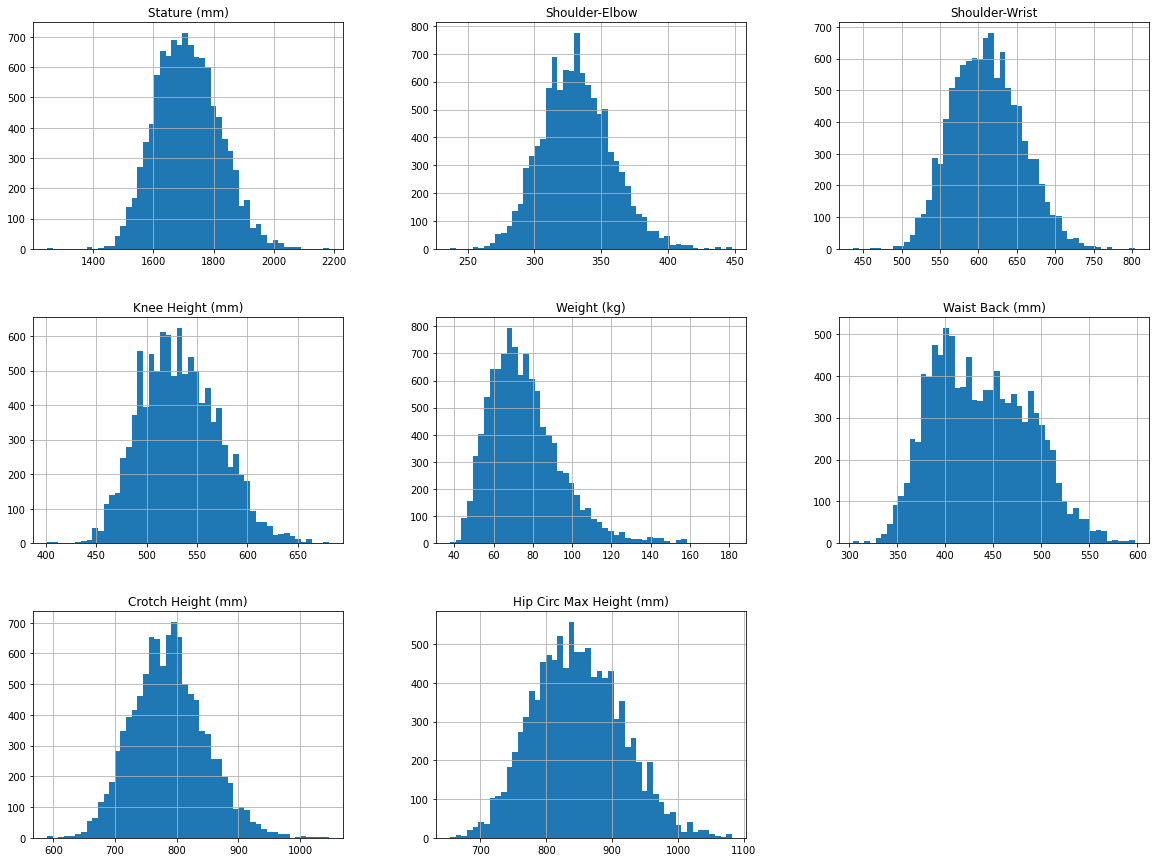

In [1325]:
# Histogram to show the distribution of the variables 
vertical_df.hist(bins=50, figsize=(20,15))
plt.title("Distribution of Vertical Measurements")
#plt.savefig("Variable distribution_vertical3.png")
plt.show()

/var/folders/tm/qv8g9h112v52mx8snqm4n83h0000gn/T/ipykernel_378/1903551172.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = vertical_df.corr()


<Axes: >

Text(0.5, 1.0, 'Correlation Matrix Heatmap for Vertical Measurements')

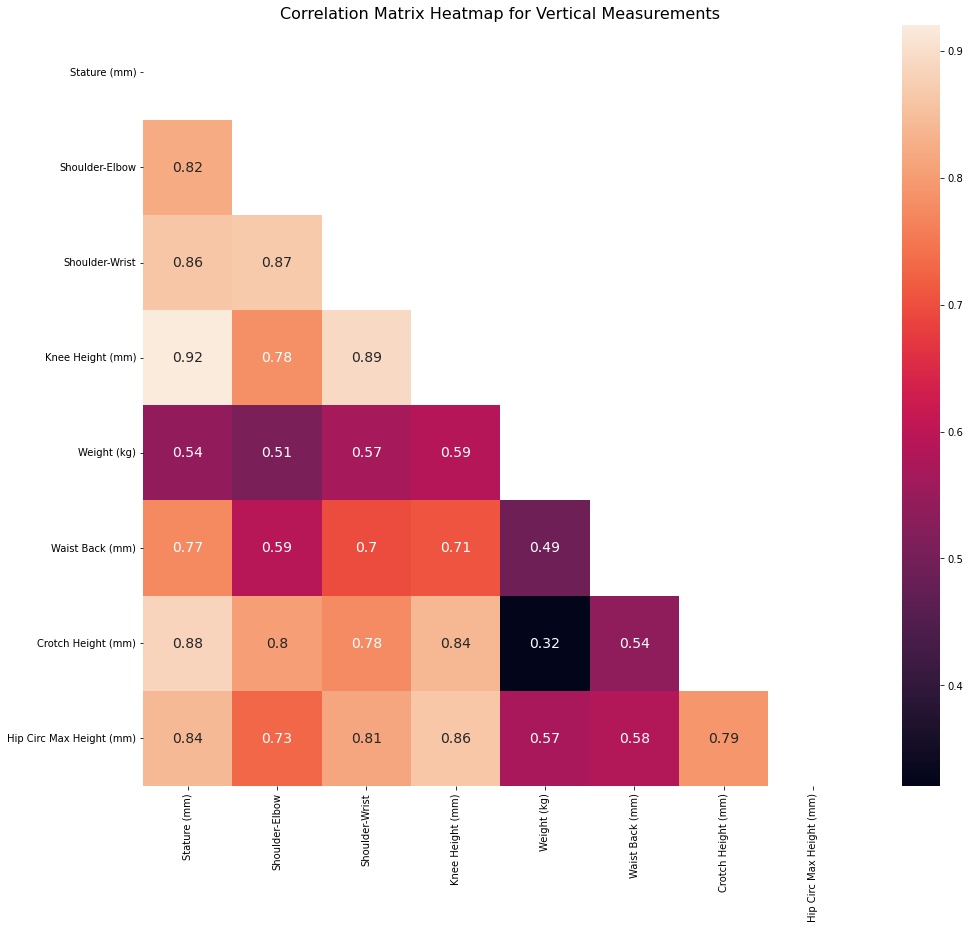

In [1326]:
# Correlation matrix
corr_matrix = vertical_df.corr()
fig, axs = plt.subplots(figsize=(16,14)) 

bottom = np.zeros_like(corr_matrix)
bottom[np.triu_indices_from(bottom)] = True

# Correlation heatmap
sns.heatmap(corr_matrix, mask = bottom, annot=True, annot_kws={'size': 14})

axs.set_title('Correlation Matrix Heatmap for Vertical Measurements', fontsize=16)
#plt.savefig('correlation_heatmap_vertical1.png')

plt.show()


In [1327]:
# Standardisation
numerical_columns2 = vertical_df.select_dtypes(include='number').columns

scaler = StandardScaler()

# Fit the scaler on the numerical columns
scaler.fit(vertical_df[numerical_columns2])
vertical_df[numerical_columns2] = scaler.transform(vertical_df[numerical_columns2])


StandardScaler()

/var/folders/tm/qv8g9h112v52mx8snqm4n83h0000gn/T/ipykernel_378/3665927939.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vertical_df[numerical_columns2] = scaler.transform(vertical_df[numerical_columns2])


In [1328]:
# one-hot encoding
vertical_df = pd.get_dummies(vertical_df, columns=['Gender'])

print(vertical_df.head())

   Stature (mm)  Shoulder-Elbow  Shoulder-Wrist  Knee Height (mm)  \
0      0.081899        0.996491       -0.183366         -0.845314   
1     -0.529953       -0.639800       -0.851804         -0.756752   
2     -1.017523       -0.601746       -0.963210         -0.305372   
3      0.588590        0.958438        0.306822          0.131723   
4      1.296044        1.909770        1.354042          1.263029   

   Weight (kg)  Waist Back (mm)  Crotch Height (mm)  Hip Circ Max Height (mm)  \
0    -0.819963         0.120751            0.182982                 -0.491620   
1     0.492647        -1.324601           -0.818225                 -0.980284   
2    -0.798177        -1.317919            0.333163                 -0.550852   
3    -0.542190         0.533640            1.284310                  0.189547   
4     1.217033         0.639163            1.701480                  0.041467   

   Gender_Female  Gender_Male  
0              1            0  
1              1            0  
2 

### Train-Test, Validation Set Split

In [1329]:
# defining the variables
input_vertical = ['Stature (mm)', 'Weight (kg)', 'Gender_Female', 'Gender_Male']
output_vertical = ['Shoulder-Elbow' , 'Shoulder-Wrist',  'Knee Height (mm)','Waist Back (mm)', 'Crotch Height (mm)', 'Hip Circ Max Height (mm)']

# Spliting the data into training and testing sets
X1_combo, X1_test, y1_combo, y1_test = train_test_split(vertical_df[input_vertical], vertical_df[output_vertical], test_size=0.1, random_state=42)
X1_combo                  
                   
                   

,Stature (mm),Weight (kg),Gender_Female,Gender_Male
2737,-0.453471,-0.826990,0,1
250,-0.042383,0.656042,0,1
3190,-0.807199,-0.579983,0,1
2611,-1.103564,-0.802289,1,0
4328,-0.558634,0.285679,1,0
...,...,...,...,...
1398,0.875395,0.655054,1,0
855,1.831415,-0.171828,1,0
1054,-0.434351,-0.215400,1,0
860,-0.443911,-0.819963,1,0


In [1330]:
# Train and validation split
X1_train, X1_val, y1_train, y1_val = train_test_split(X1_combo, y1_combo, test_size=0.1, random_state=42)

## 8.1 Multi Output and Ensemble Model

### Random Forest

In [1331]:
base_estimator = RandomForestRegressor(random_state=42)
model_rf = MultiOutputRegressor(base_estimator)

# Fit the model on the training data
model_rf.fit(X1_train, y1_train)

# Predict the outputs for the val data
y_pred = model_rf.predict(X1_val)


mape = mean_absolute_percentage_error(y1_val, y_pred)
rmse = sqrt(mean_squared_error(y1_val, y_pred))
r2 = r2_score(y1_val, y_pred)

print("MAPE:", mape)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)


MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

MAPE: 1.1208245546937283
Root Mean Squared Error (RMSE): 0.34403047334150977
R-squared: 0.885376068741628


### XGboost

In [1332]:
# Train a multi-output model using XGBoost
model_xgb = MultiOutputRegressor(xgb.XGBRegressor(n_estimators=100))
model_xgb.fit(X1_train, y1_train)

# Evaluate the performance of the model on the val set
y_pred = model_xgb.predict(X1_val)

mape = mean_absolute_percentage_error(y1_val, y_pred)
rmse = sqrt(mean_squared_error(y1_val, y_pred))
r2 = r2_score(y1_val, y_pred)


MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))

In [1333]:
print("MAPE:", mape)
print("RMSE (XGBoost Multi-Output):", rmse)
print("R-squared (XGBoost Multi-Output):", r2)


MAPE: 1.5652200532719827
RMSE (XGBoost Multi-Output): 0.40683164411053685
R-squared (XGBoost Multi-Output): 0.8406806189146631


### Ensemble Model

In [1334]:
# Define the individual models
model_rf = RandomForestRegressor(n_estimators=100)
model_xgb = XGBRegressor(n_estimators=100)
model_linear = LinearRegression()

# Fit the individual models on the training data
model_rf.fit(X1_train, y1_train)
model_xgb.fit(X1_train, y1_train)
model_linear.fit(X1_train, y1_train)

# Predict the measurements using the individual models
y_pred_rf = model_rf.predict(X1_val)
y_pred_xgb = model_xgb.predict(X1_val)
y_pred_linear = model_linear.predict(X1_val)

# averaging 
y_pred_ensemble = (y_pred_rf + y_pred_xgb + y_pred_linear) / 3
y_pred_ensemble_reshaped = y_pred_ensemble.reshape(-1, y1_val.shape[1])

# Evaluation
mape = mean_absolute_percentage_error(y1_val, y_pred_ensemble_reshaped)
rmse_ensemble = sqrt(mean_squared_error(y1_val, y_pred_ensemble_reshaped))
r2_ensemble = r2_score(y1_val, y_pred_ensemble_reshaped)

print("MAPE:", mape_ensemble)
print("Ensemble Model - Root Mean Squared Error (RMSE):", rmse_ensemble)
print("Ensemble Model - R-squared:", r2_ensemble)


RandomForestRegressor()

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

LinearRegression()

MAPE: 1.4241556178471255
Ensemble Model - Root Mean Squared Error (RMSE): 0.4030693118195241
Ensemble Model - R-squared: 0.8437064403106427


## 8.2 Individual Models

In [1335]:
X3 = X1_combo
y_elbow = y1_combo['Shoulder-Elbow']
y_wrist = y1_combo['Shoulder-Wrist']
y_knee = y1_combo['Knee Height (mm)']
y_back = y1_combo['Waist Back (mm)']
y_crotch = y1_combo['Crotch Height (mm)']
y_hipheight = y1_combo['Hip Circ Max Height (mm)']

### Random Forest

In [1336]:
# shoulder to elbow

X_train, X_val, y_elbow_train, y_elbow_test = train_test_split(X3, y_elbow, test_size=0.1, random_state=42)

model = RandomForestRegressor(n_estimators=100)

# Fit on the training data
elbow_individual = model.fit(X_train, y_elbow_train)

# Prediction
y_elbow_pred = elbow_individual.predict(X_val)

In [1337]:
mape = mean_absolute_percentage_error(y_elbow_test, y_elbow_pred)
rmse = sqrt(mean_squared_error(y_elbow_test, y_elbow_pred))
r2 = r2_score(y_elbow_test, y_elbow_pred)
print("MAPE:", mape)
print("Root Mean Squared Error (RMSE) elbow random forest:", rmse)
print("R-squared elbow random forest:", r2)


MAPE: 1.2303853046100364
Root Mean Squared Error (RMSE) elbow random forest: 0.36247581406174284
R-squared elbow random forest: 0.8768574896395454


In [1338]:
# shoulder to wrist
X_train, X_val, y_wrist_train, y_wrist_test = train_test_split(X3, y_wrist, test_size=0.1, random_state=42)

# Fit on the training data
wrist_individual = model.fit(X_train, y_wrist_train)

# Prediction
y_wrist_pred = wrist_individual.predict(X_val)


In [1339]:
mape = mean_absolute_percentage_error(y_wrist_test, y_wrist_pred)
rmse = sqrt(mean_squared_error(y_wrist_test, y_wrist_pred))
r2 = r2_score(y_wrist_test, y_wrist_pred)
print("MAPE:", mape)
print("Root Mean Squared Error (RMSE) wrist random forest:", rmse)
print("R-squared wrist random forest:", r2)

MAPE: 1.1607498399278322
Root Mean Squared Error (RMSE) wrist random forest: 0.35707122002744446
R-squared wrist random forest: 0.8802320874488829


In [1340]:
# knee
X_train, X_val, y_knee_train, y_knee_test = train_test_split(X3, y_knee, test_size=0.1, random_state=42)


knee_individual = model.fit(X_train, y_knee_train)

# Prediction
y_knee_pred = knee_individual.predict(X_val)


In [1341]:
mape = mean_absolute_percentage_error(y_knee_test, y_knee_pred)
rmse = sqrt(mean_squared_error(y_knee_test, y_knee_pred))
r2 = r2_score(y_knee_test, y_knee_pred)
print("MAPE:", mape)
print("Root Mean Squared Error (RMSE) knee random forest:", rmse)
print("R-squared knee random forest:", r2)

MAPE: 0.771026569975218
Root Mean Squared Error (RMSE) knee random forest: 0.22547921323934314
R-squared knee random forest: 0.9523640458478853


In [1342]:
# back
X_train, X_val, y_back_train, y_back_test = train_test_split(X3, y_back, test_size=0.1, random_state=42)

# Fit on the training data
back_individual = model.fit(X_train, y_back_train)

# Prediction
y_back_pred = back_individual.predict(X_val)


In [1343]:
mape = mean_absolute_percentage_error(y_back_test, y_back_pred)
rmse = sqrt(mean_squared_error(y_back_test, y_back_pred))
r2 = r2_score(y_back_test, y_back_pred)
print("MAPE:", mape)
print("Root Mean Squared Error (RMSE) back random forest:", rmse)
print("R-squared back random forest:", r2)

MAPE: 1.6713621371149519
Root Mean Squared Error (RMSE) back random forest: 0.47444311755458835
R-squared back random forest: 0.7700378802199338


In [1344]:
# crotch
X_train, X_val, y_crotch_train, y_crotch_test = train_test_split(X3, y_crotch, test_size=0.1, random_state=42)

# Fit on the training data
crotch_individual = model.fit(X_train, y_crotch_train)

# Prediction
y_crotch_pred = crotch_individual.predict(X_val)


In [1345]:
mape = mean_absolute_percentage_error(y_crotch_test, y_crotch_pred)
rmse = sqrt(mean_squared_error(y_crotch_test, y_crotch_pred))
r2 = r2_score(y_crotch_test, y_crotch_pred)
print("MAPE:", mape)
print("Root Mean Squared Error (RMSE) crotch random forest:", rmse)
print("R-squared crotch random forest:", r2)

MAPE: 1.0490063964656766
Root Mean Squared Error (RMSE) crotch random forest: 0.29085626374754725
R-squared crotch random forest: 0.9190360900423733


In [1346]:
# Hip height
X_train, X_val, y_hipheight_train, y_hipheight_test = train_test_split(X3, y_hipheight, test_size=0.1, random_state=42)

# Fit on the training data
hipheight_individual = model.fit(X_train, y_hipheight_train)

# Prediction
y_hipheight_pred = hipheight_individual.predict(X_val)


In [1347]:
mape = mean_absolute_percentage_error(y_hipheight_test, y_hipheight_pred)
rmse = sqrt(mean_squared_error(y_hipheight_test, y_hipheight_pred))
r2 = r2_score(y_hipheight_test, y_hipheight_pred)
print("MAPE:", mape)
print("Root Mean Squared Error (RMSE) hip height random forest:", rmse)
print("R-squared hip height random forest:", r2)

MAPE: 0.819788777269458
Root Mean Squared Error (RMSE) hip height random forest: 0.2934827626179906
R-squared hip height random forest: 0.9185112826660174


### XGBoost

In [1348]:
# elbow

X_train, X_val, y_elbow_train, y_elbow_test = train_test_split(X3, y_elbow, test_size=0.1, random_state=42)
model_elbow = xgb.XGBRegressor(n_estimators=100)

# Fit on the training data
model_elbow.fit(X_train, y_elbow_train)

# Prediction
y_elbow_pred = model_elbow.predict(X_val)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [1349]:
mape = mean_absolute_percentage_error(y_elbow_test, y_elbow_pred)
rmse = sqrt(mean_squared_error(y_elbow_test, y_elbow_pred))
r2 = r2_score(y_elbow_test, y_elbow_pred)
print("MAPE:", mape)
print("Root Mean Squared Error (RMSE) elbow xgboost:", rmse)
print("R-squared elbow xgboost:", r2)

MAPE: 1.7138198039301413
Root Mean Squared Error (RMSE) elbow xgboost: 0.4595192854877959
R-squared elbow xgboost: 0.8020947018618005


In [1350]:
# wrist
X_train, X_val, y_wrist_train, y_wrist_test = train_test_split(X3, y_wrist, test_size=0.1, random_state=42)

model_wrist = xgb.XGBRegressor(n_estimators=100)

# Fit on the training data
model_wrist.fit(X_train, y_wrist_train)

# Predict
y_wrist_pred = model_wrist.predict(X_val)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [1351]:
mape = mean_absolute_percentage_error(y_wrist_test, y_wrist_pred)
rmse = sqrt(mean_squared_error(y_wrist_test, y_wrist_pred))
r2 = r2_score(y_wrist_test, y_wrist_pred)
print("MAPE:", mape)
print("Root Mean Squared Error (RMSE) wrist xgboost :", rmse)
print("R-squared wrist xgboost:", r2)

MAPE: 1.593117020514306
Root Mean Squared Error (RMSE) wrist xgboost : 0.42041382810239514
R-squared wrist xgboost: 0.8339706873733342


In [1352]:
# knee
X_train, X_val, y_knee_train, y_knee_test = train_test_split(X3, y_knee, test_size=0.1, random_state=42)

model_knee = xgb.XGBRegressor(n_estimators=100)

# Fit on the training data
model_knee.fit(X_train, y_knee_train)

# Predict
y_knee_pred = model_knee.predict(X_val)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [1353]:
mape = mean_absolute_percentage_error(y_knee_test, y_knee_pred)
rmse = sqrt(mean_squared_error(y_knee_test, y_knee_pred))
r2 = r2_score(y_knee_test, y_knee_pred)
print("MAPE:", mape)
print("Root Mean Squared Error (RMSE) knee xgboost:", rmse)
print("R-squared knee xgboost:", r2)

MAPE: 0.9359126739502672
Root Mean Squared Error (RMSE) knee xgboost: 0.3009670425194063
R-squared knee xgboost: 0.9151289200637314


In [1354]:
# back
X_train, X_val, y_back_train, y_back_test = train_test_split(X3, y_back, test_size=0.1, random_state=42)

model_back = xgb.XGBRegressor(n_estimators=100)

# Fit on the training data
model_back.fit(X_train, y_back_train)

# Predict
y_back_pred = model_back.predict(X_val)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [1355]:
mape = mean_absolute_percentage_error(y_back_test, y_back_pred)
rmse = sqrt(mean_squared_error(y_back_test, y_back_pred))
r2 = r2_score(y_back_test, y_back_pred)
print("MAPE:", mape)
print("Root Mean Squared Error (RMSE) back xgboost:", rmse)
print("R-squared back xgboost:", r2)

MAPE: 1.8402505952590504
Root Mean Squared Error (RMSE) back xgboost: 0.5017453102743024
R-squared back xgboost: 0.7428096644019209


In [1356]:
# crotch

X_train, X_val, y_crotch_train, y_crotch_test = train_test_split(X3, y_crotch, test_size=0.1, random_state=42)

model_crotch = xgb.XGBRegressor(n_estimators=100)

# Fit on the training data
model_crotch.fit(X_train, y_crotch_train)

# Predict
y_crotch_pred = model_crotch.predict(X_val)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [1357]:
mape = mean_absolute_percentage_error(y_crotch_test, y_crotch_pred)
rmse = sqrt(mean_squared_error(y_crotch_test, y_crotch_pred))
r2 = r2_score(y_crotch_test, y_crotch_pred)
print("MAPE:", mape)
print("Root Mean Squared Error (RMSE) crotch xgboost:", rmse)
print("R-squared crotch xgboost:", r2)

MAPE: 2.066587105434803
Root Mean Squared Error (RMSE) crotch xgboost: 0.33814578104617016
R-squared crotch xgboost: 0.8905684431997815


In [1358]:
# hipheight

X_train, X_val, y_hipheight_train, y_hipheight_test = train_test_split(X3, y_hipheight, test_size=0.1, random_state=42)

model_hipheight = xgb.XGBRegressor(n_estimators=100)

# Fit on the training data
model_hipheight.fit(X_train, y_hipheight_train)

# Predict
y_hipheight_pred = model_hipheight.predict(X_val)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [1359]:
mape = mean_absolute_percentage_error(y_hipheight_test, y_hipheight_pred)
rmse = sqrt(mean_squared_error(y_hipheight_test, y_hipheight_pred))
r2 = r2_score(y_hipheight_test, y_hipheight_pred)
print("MAPE:", mape)
print("Root Mean Squared Error (RMSE) hip height random forest:", rmse)
print("R-squared hip height random forest:", r2)

MAPE: 1.241633120543329
Root Mean Squared Error (RMSE) hip height random forest: 0.3853492870094762
R-squared hip height random forest: 0.8595112965874103


## 8.3 Sequential Models

### Random Forest

In [1360]:
# Starting with knee cause it has the highest accuracy

X_train, X_val, y_knee_train, y_knee_test = train_test_split(X3, y_knee, test_size=0.1, random_state=42)

model_knee = RandomForestRegressor(n_estimators=100)

# Fit on the training data
model_knee.fit(X_train, y_knee_train)

# Predict
y_knee_pred = model_knee.predict(X_val)

# Evaluation
mape_knee = mean_absolute_percentage_error(y_knee_test, y_knee_pred)
rmse_knee = sqrt(mean_squared_error(y_knee_test, y_knee_pred))
r2_knee = r2_score(y_knee_test, y_knee_pred)

print("MAPE:", mape_knee)
print("knee Model - Root Mean Squared Error (RMSE):", rmse_knee)
print("knee Model - R-squared:", r2_knee)

# Predict the measurements for the entire dataset (train and test)
y_knee_pred_all = model_knee.predict(X3)

RandomForestRegressor()

MAPE: 0.7350548782777397
knee Model - Root Mean Squared Error (RMSE): 0.22334063009185356
knee Model - R-squared: 0.9532633778277474


In [1361]:
# crotch
# Use the predicted measurements as an additional input
X_crotch = X3.copy()

# Replace the measurements in the entire dataset with the predicted values
X_crotch['Knee Height (mm)'] = y_knee_pred_all

X_crotch_train, X_crotch_test, y_crotch_train, y_crotch_test = train_test_split(X_crotch, y_crotch, test_size=0.1, random_state=42)
model_crotch = RandomForestRegressor(n_estimators=100)

# Fit on the training data
model_crotch.fit(X_crotch_train, y_crotch_train)

# Predict 
y_crotch_pred = model_crotch.predict(X_crotch_test)

# Evaluation
mape_crotch = mean_absolute_percentage_error(y_crotch_test, y_crotch_pred)
rmse_crotch = sqrt(mean_squared_error(y_crotch_test, y_crotch_pred))
r2_crotch = r2_score(y_crotch_test, y_crotch_pred)

print("MAPE:", mape_crotch)
print("crotch Model - Root Mean Squared Error (RMSE):", rmse_crotch)
print("crotch Model - R-squared:", r2_crotch)

# Predict the measurements for the entire dataset (train and test)
y_crotch_pred_all = model_crotch.predict(X_crotch)



RandomForestRegressor()

MAPE: 1.2079240710221228
crotch Model - Root Mean Squared Error (RMSE): 0.28949738131081787
crotch Model - R-squared: 0.9197908506634878


In [1362]:
# Hip height
# Use the predicted measurements as an additional input 
X_hipheight = X_crotch.copy()

# Replace the measurements in the entire dataset with the predicted values
X_hipheight['Crotch Height (mm)'] = y_crotch_pred_all

X_hipheight_train, X_hipheight_test, y_hipheight_train, y_hipheight_test = train_test_split(X_hipheight, y_hipheight, test_size=0.1, random_state=42)
model_hipheight = RandomForestRegressor(n_estimators=100)

# Fit on the training data
model_hipheight.fit(X_hipheight_train, y_hipheight_train)

# Predict
y_hipheight_pred = model_hipheight.predict(X_hipheight_test)


mape_hipheight = mean_absolute_percentage_error(y_hipheight_test, y_hipheight_pred)
rmse_hipheight = sqrt(mean_squared_error(y_hipheight_test, y_hipheight_pred))
r2_hipheight = r2_score(y_hipheight_test, y_hipheight_pred)

print("MAPE:", mape_hipheight)
print("Hip Height Model - Root Mean Squared Error (RMSE):", rmse_hipheight)
print("Hip height Model - R-squared:", r2_hipheight)

# Predict the under bust measurements for the entire dataset (train and test)
y_hipheight_pred_all = model_hipheight.predict(X_hipheight)


RandomForestRegressor()

MAPE: 0.7946584567937728
Hip Height Model - Root Mean Squared Error (RMSE): 0.3761022810485588
Hip height Model - R-squared: 0.8661728529654742


In [1363]:
# back
# Use the predicted measurements as an additional input
X_back = X_hipheight.copy()

# Replace the measurements in the entire dataset with the predicted values
X_back['Hip Circ Max Height (mm)'] = y_hipheight_pred_all

X_back_train, X_back_test, y_back_train, y_back_test = train_test_split(X_back, y_back, test_size=0.1, random_state=42)
model_back = RandomForestRegressor(n_estimators=100)

# Fit on the training data
model_back.fit(X_back_train, y_back_train)
y_back_pred = model_back.predict(X_back_test)

mape_back = mean_absolute_percentage_error(y_back_test, y_back_pred)
rmse_back = sqrt(mean_squared_error(y_back_test, y_back_pred))
r2_back = r2_score(y_back_test, y_back_pred)

print("MAPE:", mape_back)
print("Back Model - Root Mean Squared Error (RMSE):", rmse_back)
print("Back Model - R-squared:", r2_back)

# Predict the measurements for the entire dataset (train and test)
y_back_pred_all = model_back.predict(X_back)

RandomForestRegressor()

MAPE: 1.3257790311340303
Back Model - Root Mean Squared Error (RMSE): 0.4515087510294668
Back Model - R-squared: 0.7917330554713394


In [1364]:
# elbow

X_elbow = X_back.copy()
X_elbow['Shoulder-Elbow'] = y_back_pred_all
X_elbow_train, X_elbow_test, y_elbow_train, y_elbow_test = train_test_split(X_elbow, y_elbow, test_size=0.1, random_state=42)


model_elbow = RandomForestRegressor(n_estimators=100)
model_elbow.fit(X_elbow_train, y_elbow_train)
y_elbow_pred = model_elbow.predict(X_elbow_test)


mape_elbow = mean_absolute_percentage_error(y_elbow_test, y_elbow_pred)
rmse_elbow = sqrt(mean_squared_error(y_elbow_test, y_elbow_pred))
r2_elbow = r2_score(y_elbow_test, y_elbow_pred)

print("MAPE:", mape_elbow)
print("elbow Model - Root Mean Squared Error (MSE):", rmse_elbow)
print("elbow Model - R-squared:", r2_elbow)

# Predict the measurements for the entire dataset (train and test)
y_elbow_pred_all = model_elbow.predict(X_elbow)

RandomForestRegressor()

MAPE: 1.4787917920551878
elbow Model - Root Mean Squared Error (MSE): 0.4363533255376646
elbow Model - R-squared: 0.8215459061715671


In [1365]:
# wrist
X_wrist = X_elbow.copy()
X_wrist['Shoulder-Wrist'] = y_elbow_pred_all
X_wrist_train, X_wrist_test, y_wrist_train, y_wrist_test = train_test_split(X_wrist, y_wrist, test_size=0.1, random_state=42)

model_wrist = RandomForestRegressor(n_estimators=100)
model_wrist.fit(X_wrist_train, y_wrist_train)
y_wrist_pred = model_wrist.predict(X_wrist_test)


mape_wrist = mean_absolute_percentage_error(y_wrist_test, y_wrist_pred)
rmse_wrist = sqrt(mean_squared_error(y_wrist_test, y_wrist_pred))
r2_wrist = r2_score(y_wrist_test, y_wrist_pred)

print("MAPE:", mape_wrist)
print("wrist Model - Root Mean Squared Error (RMSE):", rmse_wrist)
print("wrist Model - R-squared:", r2_wrist)

# Predict the measurements for the entire dataset (train and test)
y_wrist_pred_all = model_wrist.predict(X_wrist)

RandomForestRegressor()

MAPE: 1.1493215341492704
wrist Model - Root Mean Squared Error (RMSE): 0.38651822430618327
wrist Model - R-squared: 0.8596634690514442


### XGBoost

In [1366]:
# Starting with knee cause it has the highest accuracy

X_train, X_val, y_knee_train, y_knee_test = train_test_split(X3, y_knee, test_size=0.1, random_state=42)
model_knee =  xgb.XGBRegressor(n_estimators=100)
model_knee.fit(X_train, y_knee_train)
y_knee_pred = model_knee.predict(X_val)


mape_knee = mean_absolute_percentage_error(y_knee_test, y_knee_pred)
rmse_knee = sqrt(mean_squared_error(y_knee_test, y_knee_pred))
r2_knee = r2_score(y_knee_test, y_knee_pred)

print("MAPE:", mape_knee)
print("knee Model - Root Mean Squared Error (RMSE):", rmse_chest)
print("knee Model - R-squared:", r2_chest)

# Predict the measurements for the entire dataset (train and test)
y_knee_pred_all = model_knee.predict(X3)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

MAPE: 0.9359126739502672
knee Model - Root Mean Squared Error (RMSE): 0.1771536735812919
knee Model - R-squared: 0.9689202327150547


In [1367]:
# crotch
X_crotch = X3.copy()
X_crotch['Knee Height (mm)'] = y_knee_pred_all
X_crotch_train, X_crotch_test, y_crotch_train, y_crotch_test = train_test_split(X_crotch, y_crotch, test_size=0.1, random_state=42)

model_crotch = xgb.XGBRegressor(n_estimators=100)
model_crotch.fit(X_crotch_train, y_crotch_train)
y_crotch_pred = model_crotch.predict(X_crotch_test)


mape_crotch = mean_absolute_percentage_error(y_crotch_test, y_crotch_pred)
rmse_crotch = sqrt(mean_squared_error(y_crotch_test, y_crotch_pred))
r2_crotch = r2_score(y_crotch_test, y_crotch_pred)

print("MAPE:", mape_crotch)
print("crotch Model - Root Mean Squared Error (RMSE):", rmse_crotch)
print("crotch Model - R-squared:", r2_crotch)

# Predict the for the entire dataset (train and test)
y_crotch_pred_all = model_crotch.predict(X_crotch)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

MAPE: 1.6183123122942795
crotch Model - Root Mean Squared Error (RMSE): 0.34275797512723416
crotch Model - R-squared: 0.8875628656695665


In [1368]:
# Hip height

X_hipheight = X_crotch.copy()
X_hipheight['Crotch Height (mm)'] = y_crotch_pred_all
X_hipheight_train, X_hipheight_test, y_hipheight_train, y_hipheight_test = train_test_split(X_hipheight, y_hipheight, test_size=0.1, random_state=42)


model_hipheight = xgb.XGBRegressor(n_estimators=100)
model_hipheight.fit(X_hipheight_train, y_hipheight_train)
y_hipheight_pred = model_hipheight.predict(X_hipheight_test)


mape_hipheight = mean_absolute_percentage_error(y_hipheight_test, y_hipheight_pred)
rmse_hipheight = sqrt(mean_squared_error(y_hipheight_test, y_hipheight_pred))
r2_hipheight = r2_score(y_hipheight_test, y_hipheight_pred)

print("MAPE:", mape_hipheight)
print("hip height Model - Root Mean Squared Error (RMSE):", rmse_hipheight)
print("hip heieght Model - R-squared:", r2_hipheight)

# Predict the measurements for the entire dataset (train and test)
y_hipheight_pred_all = model_hipheight.predict(X_hipheight)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

MAPE: 1.1319102546459343
hip height Model - Root Mean Squared Error (RMSE): 0.39188244068489075
hip heieght Model - R-squared: 0.8547072669328064


In [1369]:
# back
X_back = X_hipheight.copy()
X_back['Hip Circ Max Height (mm)'] = y_hipheight_pred_all
X_back_train, X_back_test, y_back_train, y_back_test = train_test_split(X_back, y_back, test_size=0.1, random_state=42)


model_back = xgb.XGBRegressor(n_estimators=100)
model_back.fit(X_back_train, y_back_train)
y_back_pred = model_back.predict(X_back_test)


mape_back = mean_absolute_percentage_error(y_back_test, y_back_pred)
rmse_back = sqrt(mean_squared_error(y_back_test, y_back_pred))
r2_back = r2_score(y_back_test, y_back_pred)

print("MAPE:", mape_back)
print("back Model - Root Mean Squared Error (RMSE):", rmse_back)
print("back Model - R-squared:", r2_back)

# Predict the measurements for the entire dataset (train and test)
y_back_pred_all = model_back.predict(X_back)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

MAPE: 1.598320230077617
back Model - Root Mean Squared Error (RMSE): 0.4972115599767462
back Model - R-squared: 0.7474365880873506


In [1370]:
# elbow
X_elbow = X_back.copy()
X_elbow['Shoulder-Elbow'] = y_back_pred_all
X_elbow_train, X_elbow_test, y_elbow_train, y_elbow_test = train_test_split(X_elbow, y_elbow, test_size=0.1, random_state=42)

model_elbow = xgb.XGBRegressor(n_estimators=100)
model_elbow.fit(X_elbow_train, y_elbow_train)
y_elbow_pred = model_elbow.predict(X_elbow_test)

mape_elbow = mean_absolute_percentage_error(y_elbow_test, y_elbow_pred)
rmse_elbow = sqrt(mean_squared_error(y_elbow_test, y_elbow_pred))
r2_elbow = r2_score(y_elbow_test, y_elbow_pred)

print("MAPE:", mape_elbow)
print("elbow Model - Root Mean Squared Error (RMSE):", rmse_elbow)
print("elbow Model - R-squared:", r2_elbow)

# Predict the measurements for the entire dataset (train and test)
y_elbow_pred_all = model_elbow.predict(X_elbow)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

MAPE: 1.7682831350703767
elbow Model - Root Mean Squared Error (RMSE): 0.485123031218938
elbow Model - R-squared: 0.7794263034425859


In [1371]:
# wrist
X_wrist = X_elbow.copy()
X_wrist['Shoulder-Wrist'] = y_elbow_pred_all
X_wrist_train, X_wrist_test, y_wrist_train, y_wrist_test = train_test_split(X_wrist, y_wrist, test_size=0.1, random_state=42)

model_wrist = xgb.XGBRegressor(n_estimators=100)
model_wrist.fit(X_wrist_train, y_wrist_train)
y_wrist_pred = model_wrist.predict(X_wrist_test)

mape_wrist = mean_absolute_percentage_error(y_wrist_test, y_wrist_pred)
rmse_wrist = sqrt(mean_squared_error(y_wrist_test, y_wrist_pred))
r2_wrist = r2_score(y_wrist_test, y_wrist_pred)

print("MAPE:", mape_wrist)
print("Under Bust Model - Root Mean Squared Error (RMSE):", rmse_wrist)
print("Under Bust Model - R-squared:", r2_wrist)

# Predict the measurements for the entire dataset (train and test)
y_wrist_pred_all = model_wrist.predict(X_wrist)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

MAPE: 1.4114663201207014
Under Bust Model - Root Mean Squared Error (RMSE): 0.42794875226122475
Under Bust Model - R-squared: 0.8279659893008536


# 9. Hyper Parameter Tuning - Vertical Measurements

## 9.1 Multi Output Random Forest - Random Search and Bayesian Optimisation

In [1372]:
# Defined parameter distribution
param_dist = {
    'estimator__bootstrap': [True,False],
    'estimator__max_depth': [5, 10, 15, 20, 25, 30],
    'estimator__min_samples_leaf': [2,3,4],
    'estimator__min_samples_split': [1,3,5],
    'estimator__n_estimators':[50, 100, 150, 200, 250, 300]
}

# RandomSearchCV object with the multi-output random forest regressor and the defined parameter distribution
random_search = RandomizedSearchCV(MultiOutputRegressor(RandomForestRegressor()), param_distributions=param_dist, n_iter=30, cv=3, scoring='neg_mean_squared_error', random_state = 36)

# Fit to training dataset
random_search.fit(X1_train, y1_train)

# Best hyperparameters and the corresponding score
best_param = random_search.best_params_
best_score = random_search.best_score_

print("Best Hyperparameters:", best_param)
print("Best Score:", best_score)

# Model with optimal hyperparameters
randomsearch_vertical = random_search.best_estimator_

randomsearch_vertical

RandomizedSearchCV(cv=3,
                   estimator=MultiOutputRegressor(estimator=RandomForestRegressor()),
                   n_iter=30,
                   param_distributions={'estimator__bootstrap': [True, False],
                                        'estimator__max_depth': [5, 10, 15, 20,
                                                                 25, 30],
                                        'estimator__min_samples_leaf': [2, 3,
                                                                        4],
                                        'estimator__min_samples_split': [1, 3,
                                                                         5],
                                        'estimator__n_estimators': [50, 100,
                                                                    150, 200,
                                                                    250, 300]},
                   random_state=36, scoring='neg_mean_squared_error')

Best Hyperparameters: {'estimator__n_estimators': 250, 'estimator__min_samples_split': 5, 'estimator__min_samples_leaf': 2, 'estimator__max_depth': 20, 'estimator__bootstrap': True}
Best Score: -0.18654253953000524


MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=20,
                                                     min_samples_leaf=2,
                                                     min_samples_split=5,
                                                     n_estimators=250))

In [1373]:
y_pred = randomsearch_vertical.predict(X1_val)

mape_rs2= mean_absolute_percentage_error(y1_val, y_pred)
rmse_rs2 = sqrt(mean_squared_error(y1_val, y_pred))
r2_rs2 = r2_score(y1_val, y_pred)

print("Mean Absolute Percentage Error (MAPE) with Randomsearch:", mape_rs2)
print("Root Mean Squared Error (RMSE) with Randomsearch:", rmse_rs2)
print("R-squared with Randomsearch:", r2_rs2)


Mean Absolute Percentage Error (MAPE) with Randomsearch: 1.350313689852076
Root Mean Squared Error (RMSE) with Randomsearch: 0.390843247369612
R-squared with Randomsearch: 0.8525199996638878


#### Bayesian Optimisation

In [1374]:
# Define the parameter search space for tuning
param_space = {
    'estimator__n_estimators': (50, 250),
    'estimator__max_depth': (5, 20),
    'estimator__min_samples_split': (2, 15),
    'estimator__min_samples_leaf': (1, 6),
}

# Create a BayesSearchCV object with the multi-output regressor and the parameter search space
bayes_search = BayesSearchCV(MultiOutputRegressor(RandomForestRegressor()), search_spaces=param_space, cv=5, n_iter=10, scoring='neg_mean_squared_error', random_state=42)

# Fit to training datae
bayes_search.fit(X1_train, y1_train)

# Print the best hyperparameters
print("Best hyperparameters: ", bayes_search.best_params_)


BayesSearchCV(cv=5,
              estimator=MultiOutputRegressor(estimator=RandomForestRegressor()),
              n_iter=10, random_state=42, scoring='neg_mean_squared_error',
              search_spaces={'estimator__max_depth': (5, 20),
                             'estimator__min_samples_leaf': (1, 6),
                             'estimator__min_samples_split': (2, 15),
                             'estimator__n_estimators': (50, 250)})

Best hyperparameters:  OrderedDict([('estimator__max_depth', 17), ('estimator__min_samples_leaf', 2), ('estimator__min_samples_split', 10), ('estimator__n_estimators', 211)])


In [1375]:
best_model = bayes_search.best_estimator_
y_pred = best_model.predict(X1_val)

mape_bs2= mean_absolute_percentage_error(y1_val, y_pred)
rmse_bs2 = sqrt(mean_squared_error(y1_val, y_pred))
r2_bs2 = r2_score(y1_val, y_pred)

print("Mean Absolute Percentage Error (MAPE) with Bayes Optimisation:", mape_bs2)
print("Root Mean Squared Error (RMSE) with Bayes Optimisation:", rmse_bs2)
print("R-squared with Bayes Optimisation:", r2_bs2)


Mean Absolute Percentage Error (MAPE) with Bayes Optimisation: 1.4806486324268917
Root Mean Squared Error (RMSE) with Bayes Optimisation: 0.41636909401396527
R-squared with Bayes Optimisation: 0.8328712181009529


## 9.2 Individual Random Forest

In [1376]:
# Defined parameter distribution
param_dist_sequential = {
    'max_depth': [5, 10, 15, 20, 25, 30],
    'min_samples_leaf': [2,3,4],
    'min_samples_split': [1,3,5],
    'n_estimators':[50, 100, 150, 200, 250, 300]
}

# RandomSearchCV object with the random forest regressor and the defined parameter distribution
random_search_ind = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions=param_dist_sequential, n_iter=30, cv=3, scoring='neg_mean_squared_error', random_state = 36)


In [1377]:
# shoulder to elbow
X_train, X_val, y_elbow_train, y_elbow_test = train_test_split(X3, y_elbow, test_size=0.1, random_state=42)

# Fit on the training data
random_search_ind.fit(X_train, y_elbow_train)
best_model_elbow = random_search_ind.best_estimator_

# Prediction
y_elbow_pred = best_model_elbow.predict(X_val)

mape = mean_absolute_percentage_error(y_elbow_test, y_elbow_pred)
rmse = sqrt(mean_squared_error(y_elbow_test, y_elbow_pred))
r2 = r2_score(y_elbow_test, y_elbow_pred)
print("MAPE:", mape)
print("Root Mean Squared Error (RMSE) elbow random forest:", rmse)
print("R-squared elbow random forest:", r2)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=30,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [1, 3, 5],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   random_state=36, scoring='neg_mean_squared_error')

MAPE: 1.4472825625269126
Root Mean Squared Error (RMSE) elbow random forest: 0.4213594861949011
R-squared elbow random forest: 0.8335991706278159


In [1378]:
# shoulder to wrist
X_train, X_val, y_wrist_train, y_wrist_test = train_test_split(X3, y_wrist, test_size=0.1, random_state=42)

# Fit on the training data
random_search_ind.fit(X_train, y_wrist_train)
best_model_wrist = random_search_ind.best_estimator_

# Prediction
y_wrist_pred = best_model_wrist.predict(X_val)

mape = mean_absolute_percentage_error(y_wrist_test, y_wrist_pred)
rmse = sqrt(mean_squared_error(y_wrist_test, y_wrist_pred))
r2 = r2_score(y_wrist_test, y_wrist_pred)
print("MAPE:", mape)
print("Root Mean Squared Error (RMSE) wrist random forest:", rmse)
print("R-squared wrist random forest:", r2)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=30,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [1, 3, 5],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   random_state=36, scoring='neg_mean_squared_error')

MAPE: 1.392495125841861
Root Mean Squared Error (RMSE) wrist random forest: 0.39850500061361405
R-squared wrist random forest: 0.8508242134643811


In [1379]:
# knee
X_train, X_val, y_knee_train, y_knee_test = train_test_split(X3, y_knee, test_size=0.1, random_state=42)

model_knee = RandomForestRegressor(n_estimators=100)

# Fit on the training data
random_search_ind.fit(X_train, y_knee_train)
best_model_knee = random_search_ind.best_estimator_

# Prediction
y_knee_pred = best_model_knee.predict(X_val)

mape = mean_absolute_percentage_error(y_knee_test, y_knee_pred)
rmse = sqrt(mean_squared_error(y_knee_test, y_knee_pred))
r2 = r2_score(y_knee_test, y_knee_pred)
print("MAPE:", mape)
print("Root Mean Squared Error (RMSE) knee random forest:", rmse)
print("R-squared knee random forest:", r2)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=30,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [1, 3, 5],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   random_state=36, scoring='neg_mean_squared_error')

MAPE: 0.9089776416697759
Root Mean Squared Error (RMSE) knee random forest: 0.2686708522916547
R-squared knee random forest: 0.9323663301671629


In [1380]:
# back
X_train, X_val, y_back_train, y_back_test = train_test_split(X3, y_back, test_size=0.1, random_state=42)

# Fit on the training data
random_search_ind.fit(X_train, y_back_train)
best_model_back = random_search_ind.best_estimator_

# Prediction
y_back_pred = best_model_back.predict(X_val)
mape = mean_absolute_percentage_error(y_back_test, y_back_pred)
rmse = sqrt(mean_squared_error(y_back_test, y_back_pred))
r2 = r2_score(y_back_test, y_back_pred)
print("MAPE:", mape)
print("Root Mean Squared Error (RMSE) back random forest:", rmse)
print("R-squared back random forest:", r2)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=30,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [1, 3, 5],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   random_state=36, scoring='neg_mean_squared_error')

MAPE: 1.814324737716746
Root Mean Squared Error (RMSE) back random forest: 0.5081773932739511
R-squared back random forest: 0.7361733374126748


In [1381]:
# crotch
X_train, X_val, y_crotch_train, y_crotch_test = train_test_split(X3, y_crotch, test_size=0.1, random_state=42)

# Fit on the training data
random_search_ind.fit(X_train, y_crotch_train)
best_model_crotch = random_search_ind.best_estimator_

# Prediction
y_crotch_pred = best_model_crotch.predict(X_val)

mape = mean_absolute_percentage_error(y_crotch_test, y_crotch_pred)
rmse = sqrt(mean_squared_error(y_crotch_test, y_crotch_pred))
r2 = r2_score(y_crotch_test, y_crotch_pred)
print("MAPE:", mape)
print("Root Mean Squared Error (RMSE) crotch random forest:", rmse)
print("R-squared crotch random forest:", r2)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=30,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [1, 3, 5],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   random_state=36, scoring='neg_mean_squared_error')

MAPE: 1.492661008917389
Root Mean Squared Error (RMSE) crotch random forest: 0.32672837108755287
R-squared crotch random forest: 0.8978335445300852


In [1382]:
# Hip height
X_train, X_val, y_hipheight_train, y_hipheight_test = train_test_split(X3, y_hipheight, test_size=0.1, random_state=42)
model_hipheight = RandomForestRegressor(n_estimators=100)

# Fit on the training data
random_search_ind.fit(X_train, y_hipheight_train)
best_model_hipheight = random_search_ind.best_estimator_

# Prediction
y_hipheight_pred = best_model_hipheight.predict(X_val)

mape = mean_absolute_percentage_error(y_hipheight_test, y_hipheight_pred)
rmse = sqrt(mean_squared_error(y_hipheight_test, y_hipheight_pred))
r2 = r2_score(y_hipheight_test, y_hipheight_pred)
print("MAPE:", mape)
print("Root Mean Squared Error (RMSE) hip height random forest:", rmse)
print("R-squared hip height random forest:", r2)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=30,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [1, 3, 5],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   random_state=36, scoring='neg_mean_squared_error')

MAPE: 1.031838922924042
Root Mean Squared Error (RMSE) hip height random forest: 0.3470277311801525
R-squared hip height random forest: 0.8860640844286961


# 10. Final Results on Test Set

In this section, the performances of the best models for the body and vertical measurements when applied to new unseen data would be assessed. The test dataset (10%) initially left out would be utilizd in this section.

In [1383]:
X_test

,Stature (mm),Weight (kg),Gender_Female,Gender_Male
1603,1.551805,1.546309,0,1
12,0.487515,1.693069,0,1
2865,-0.538764,0.122667,0,1
1845,0.497018,0.672143,1,0
360,-0.348712,-0.041714,1,0
...,...,...,...,...
3290,-1.004391,2.470427,1,0
113,0.259453,-0.262004,0,1
3187,-0.728816,-1.375903,0,1
1483,0.687069,1.708654,0,1


## 10.1 Body Measurements

Making prediction on test dataset using random search optimized sequential and multi output models.

In [1384]:
# predicting with optimized multi output random search - body measurement

multioutput_body_testpred = randomsearch_body.predict(X_test)
print('Test MAPE on optimised multi output (Body measurments):', mean_absolute_percentage_error(y_test, multioutput_body_testpred))
print('RMSE:', sqrt(mean_squared_error(y_test, multioutput_body_testpred)))
print('R-Squared:', r2_score(y_test, multioutput_body_testpred))



Test MAPE on optimised multi output (Body measurments): 1.116917694168784
RMSE: 0.2825612254638757
R-Squared: 0.9179582931860968


In [1385]:
y_test = y_test.iloc[:, :-1]
y_test

,"Waist Circumference, Pref (mm)","Hip Circumference, Maximum (mm)",Thigh Circumference (mm),Chest Circumference (mm),Bust/Chest Circumference Under Bust (mm)
1603,1.473100,0.919058,1.085720,0.991102,1.305201
12,2.514451,0.502301,1.259252,1.928125,2.128406
2865,-0.534685,0.908893,0.328489,0.664434,0.192030
1845,0.177030,0.542960,0.533573,0.466713,0.479372
360,-0.085181,0.481971,0.249611,0.140045,0.101852
...,...,...,...,...,...
3290,1.750294,3.978667,3.199654,3.372343,2.656363
113,0.266930,-0.798796,-1.359503,-0.401537,-0.167501
3187,-1.531086,-1.927090,-2.053631,-0.874347,-1.058509
1483,1.330757,0.847904,0.628226,1.377946,1.561047


In [1386]:
# predicting with optimized sequential random search

# chest
seq_chest_testpred = randomsearch_seq_chest.predict(X_test)
print('Test MAPE on optimised multi output (Body measurments):', mean_absolute_percentage_error(y_test["Chest Circumference (mm)"], seq_chest_testpred))
print('RMSE:', sqrt(mean_squared_error(y_test["Chest Circumference (mm)"], seq_chest_testpred)))
print('R-Squared:', r2_score(y_test["Chest Circumference (mm)"], seq_chest_testpred))



Test MAPE on optimised multi output (Body measurments): 0.775520851956456
RMSE: 0.21100736708760004
R-Squared: 0.9547908745133437


In [1387]:
X_underbust_test = X_test.copy()
# Replace the chest measurements in the entire dataset with the predicted values
X_underbust_test['Chest Circumference (mm)'] = seq_chest_testpred

# add former measurement as input and use to make prediction
seq_underbust_testpred = randomsearch_seq_underbust.predict(X_underbust_test)

print('Test MAPE on optimised multi output (Body measurments):', mean_absolute_percentage_error(y_test["Bust/Chest Circumference Under Bust (mm)"], seq_underbust_testpred))
print('RMSE:', sqrt(mean_squared_error(y_test["Bust/Chest Circumference Under Bust (mm)"], seq_underbust_testpred)))
print('R-Squared:', r2_score(y_test["Bust/Chest Circumference Under Bust (mm)"], seq_underbust_testpred))



Test MAPE on optimised multi output (Body measurments): 0.6418064805376934
RMSE: 0.20251595026740932
R-Squared: 0.9570673711978294


In [1388]:
X_waist_test = X_test.copy()
# Replace the chest measurements in the entire dataset with the predicted values
X_waist_test['Chest Circumference (mm)'] = seq_chest_testpred

# add former measurement as input and use to make prediction
seq_waist_testpred = randomsearch_seq_waist.predict(X_waist_test)

print('Test MAPE on optimised multi output (Body measurments):', mean_absolute_percentage_error(y_test["Waist Circumference, Pref (mm)"], seq_waist_testpred))
print('RMSE:', sqrt(mean_squared_error(y_test["Waist Circumference, Pref (mm)"], seq_waist_testpred)))
print('R-Squared:', r2_score(y_test["Waist Circumference, Pref (mm)"], seq_waist_testpred))

Test MAPE on optimised multi output (Body measurments): 1.4442012018037889
RMSE: 0.3166362457977232
R-Squared: 0.8949704914299508


In [1389]:
X_hip_test = X_waist_test
X_hip_test['Waist Circumference, Pref (mm)'] = seq_waist_testpred

# add former measurement as input and use to make prediction
seq_hip_testpred = randomsearch_seq_hip.predict(X_hip_test)

print('Test MAPE on optimised multi output (Body measurments):', mean_absolute_percentage_error(y_test["Hip Circumference, Maximum (mm)"], seq_hip_testpred))
print('RMSE:', sqrt(mean_squared_error(y_test["Hip Circumference, Maximum (mm)"], seq_hip_testpred)))
print('R-Squared:', r2_score(y_test["Hip Circumference, Maximum (mm)"], seq_hip_testpred))

Test MAPE on optimised multi output (Body measurments): 1.5303096382453032
RMSE: 0.4161446106193333
R-Squared: 0.8223790003171096


In [1391]:
X_thigh_test = X_hip_test

X_thigh_test['Hip Circumference, Maximum (mm)'] = seq_hip_testpred

# add former measurement as input and use to make prediction
seq_thigh_testpred = randomsearch_seq_thigh.predict(X_thigh_test)

print('Test MAPE on optimised multi output (Body measurments):', mean_absolute_percentage_error(y_test["Thigh Circumference (mm)"], seq_thigh_testpred))
print('RMSE:', sqrt(mean_squared_error(y_test["Thigh Circumference (mm)"], seq_thigh_testpred)))
print('R-Squared:', r2_score(y_test["Thigh Circumference (mm)"], seq_thigh_testpred))

Test MAPE on optimised multi output (Body measurments): 2.837342047761554
RMSE: 0.4898941337784547
R-Squared: 0.754427085628576


## 10.2 Vertical Measurements

Predictions on test set using individual models and optimised random forest model - random search

In [1392]:
# predicting with optimized multi output random search - vertical measurement

multioutput_vertical_testpred = randomsearch_vertical.predict(X1_test)
print('Test MAPE on optimised multi output (Vertical measurments):', mean_absolute_percentage_error(y1_test, multioutput_vertical_testpred))
print('RMSE:', sqrt(mean_squared_error(y1_test, multioutput_vertical_testpred)))
print('R-Squared:', r2_score(y1_test, multioutput_vertical_testpred))



Test MAPE on optimised multi output (Vertical measurments): 1.8503625084948008
RMSE: 0.3736978734842312
R-Squared: 0.8600474894284309


In [1393]:
y1_test

,Shoulder-Elbow,Shoulder-Wrist,Knee Height (mm),Waist Back (mm),Crotch Height (mm),Hip Circ Max Height (mm)
462,1.072598,0.329104,0.440261,0.715339,0.516718,0.500515
3046,-1.058386,-0.784960,-0.742468,-0.587422,-0.617984,-0.950668
903,0.463745,-0.094241,0.517396,-0.840676,1.417805,0.604171
524,0.425692,-0.562147,-0.485353,-1.245124,-0.651357,-0.136229
2932,-0.830066,-1.030054,-0.845314,-2.301252,-1.135274,-0.639700
...,...,...,...,...,...,...
381,-0.069001,-0.138803,0.774511,-1.527485,1.401118,0.248779
2531,0.425692,0.641041,0.825934,-0.937197,0.817080,0.781867
2308,-0.411480,-0.673554,-0.999583,0.035853,-0.718105,-1.039516
3917,-1.400865,-1.030054,-0.793891,-1.022776,-0.951720,-0.136229


In [1394]:
# predicting with original individual models

# elbow
individual_elbow_testpred = elbow_individual.predict(X1_test)
print('Test MAPE on elbow individual model (Vertical measurments):', mean_absolute_percentage_error(y1_test["Shoulder-Elbow"],individual_elbow_testpred))
print('RMSE:', sqrt(mean_squared_error(y1_test["Shoulder-Elbow"], individual_elbow_testpred)))
print('R-Squared:', r2_score(y1_test["Shoulder-Elbow"], individual_elbow_testpred))



Test MAPE on elbow individual model (Vertical measurments): 2.973279036806496
RMSE: 0.6600464748878984
R-Squared: 0.5658809442959774


In [1395]:
# wrist

individual_wrist_testpred = wrist_individual.predict(X1_test)
print('Test MAPE on wrist individual model (Vertical measurments):', mean_absolute_percentage_error(y1_test['Shoulder-Wrist'],individual_wrist_testpred))
print('RMSE:', sqrt(mean_squared_error(y1_test['Shoulder-Wrist'], individual_wrist_testpred)))
print('R-Squared:', r2_score(y1_test['Shoulder-Wrist'], individual_wrist_testpred))

Test MAPE on wrist individual model (Vertical measurments): 1.6795186036112886
RMSE: 0.5269801214622712
R-Squared: 0.7186508626275621


In [1396]:
# knee

individual_knee_testpred = knee_individual.predict(X1_test)
print('Test MAPE on knee individual model (Vertical measurments):', mean_absolute_percentage_error(y1_test["Knee Height (mm)"],individual_knee_testpred))
print('RMSE:', sqrt(mean_squared_error(y1_test["Knee Height (mm)"], individual_knee_testpred)))
print('R-Squared:', r2_score(y1_test["Knee Height (mm)"], individual_knee_testpred))

Test MAPE on knee individual model (Vertical measurments): 2.211978280845555
RMSE: 0.46211249553221173
R-Squared: 0.7845275182192091


In [1397]:
# back

individual_back_testpred = back_individual.predict(X1_test)
print('Test MAPE on back individual model (Vertical measurments):', mean_absolute_percentage_error(y1_test["Waist Back (mm)"],individual_back_testpred))
print('RMSE:', sqrt(mean_squared_error(y1_test["Waist Back (mm)"], individual_back_testpred)))
print('R-Squared:', r2_score(y1_test["Waist Back (mm)"], individual_back_testpred))

Test MAPE on back individual model (Vertical measurments): 2.3336787669583714
RMSE: 0.7780948356586189
R-Squared: 0.4008633925225271


In [1398]:
# crotch

individual_crotch_testpred = crotch_individual.predict(X1_test)
print('Test MAPE on crotch individual model (Vertical measurments):', mean_absolute_percentage_error(y1_test['Crotch Height (mm)'],individual_crotch_testpred))
print('RMSE:', sqrt(mean_squared_error(y1_test['Crotch Height (mm)'], individual_crotch_testpred)))
print('R-Squared:', r2_score(y1_test['Crotch Height (mm)'], individual_crotch_testpred))

Test MAPE on crotch individual model (Vertical measurments): 5.717448770499552
RMSE: 0.5980940220218182
R-Squared: 0.6364430717701839


In [1399]:
# hipheight

individual_hipheight_testpred = hipheight_individual.predict(X1_test)
print('Test MAPE on individual model (Vertical measurments):', mean_absolute_percentage_error(y1_test["Hip Circ Max Height (mm)"],individual_hipheight_testpred))
print('RMSE:', sqrt(mean_squared_error(y1_test["Hip Circ Max Height (mm)"], individual_hipheight_testpred)))
print('R-Squared:', r2_score(y1_test["Hip Circ Max Height (mm)"], individual_hipheight_testpred))

Test MAPE on individual model (Vertical measurments): 0.9750141460441091
RMSE: 0.301245017053039
R-Squared: 0.9086862531408216
